# AI4EO - Building Sustainability: Using Artificial Intelligence for Estimating Construction Year from multi-modal street-view - EO dataset [Challenge] 

## Artificial Intelligence for Earth Observation (AI4EO) 

### Challenge AI4EO Jupyter Notebook 

In [3]:
print('This is the Challenge AI4EO Jupyter Notebook ')     
print('AI4EO - Building Sustainability: Using Artificial Intelligence for Estimating Construction Year from multi-modal street-view - EO dataset [Challenge]')


This is the Challenge AI4EO Jupyter Notebook 
AI4EO - Building Sustainability: Using Artificial Intelligence for Estimating Construction Year from multi-modal street-view - EO dataset [Challenge]


#### The challenge is: (7) in http://www.bigdatafromspace2023.org/satellite-events - Also, in: http://github.com/ESA-PhiLab/AI4EO-Challenge-Building-Sustainability and http://ai4eo.eu   

##### Organisers and Instructors: Nicolas Longepe (ESA), Bertrand Le Saux (ESA), Nikolaos Dionelis (ESA); Enrico Ubaldi (MindEarth); Nika Oman Kadunc (Sinergise), Devis Peressutti (Sinergise); Annekatrien Debien (SpaceTech Partners); Mattia Marconcini (MindEarth), Alessandra Feliciotti (MindEarth)  

#####  Notebook and code written by: Nikolaos Dionelis (ESA) 

#### How to cite: 
"AI4EO - Building Sustainability: Using Artificial Intelligence for Estimating Construction Year from multi-modal street-view - EO dataset [Challenge]," Nicolas Longepe, Bertrand Le Saux, Nikolaos Dionelis, Enrico Ubaldi, Nika Oman Kadunc, Devis Peressutti, Annekatrien Debien, Mattia Marconcini, Alessandra Feliciotti, Big Data from Space (BiDS) 2023 Satellite Event, November 2023. Online: http://www.bigdatafromspace2023.org/satellite-events, http://ai4eo.eu 

## Challenge Building Sustainability Baseline Model 

In [5]:
# import the libraries  

# For the AI4EO Hackathon Dataset             
import imageio.v2 as io 
import matplotlib.pyplot as plt 
FOLDER = './StreetDataset/'    
import torchvision             
import random    
import torchvision.transforms as T                         
def get_random_pos(img, window_shape): 
    w, h = window_shape
    W, H = img.shape[-2:]
    x1 = random.randint(0, W - w - 1)
    x2 = x1 + w
    y1 = random.randint(0, H - h - 1)
    y2 = y1 + h 
    return x1, x2, y1, y2
WINDOW_SIZE = (600, 600)


In [6]:
# import more libraries

# Python libraries like PIL                                   
import os          
import imageio.v2 as io
import shutil
from PIL import Image
from torchvision import transforms, datasets
import numpy as np      
import matplotlib.pyplot as plt    
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
import torch
from torchsummary import summary
import random
from tqdm import tqdm
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision


We define the paths and the names of the directories. 

In [7]:
# Folder names
FOLDER = './StreetDataset/'             
MAINFOLDER = './'    
#NUMWORKERS = 6                     
NUMWORKERS = 0 
#BATCH_SIZE = 256        
BATCH_SIZE = 20
#epochs = 200       
epochs = 100
# data_dir2 = MAINFOLDER + 'TheRest/'                
# #os.rmdir(data_dir2)   
# shutil.rmtree(data_dir2) 
#SEED = 17        
SEED = random.randint(1, 10000)
#print(SEED)   
print('The random seed is: ' + str(SEED) + '.')  
torch.cuda.empty_cache()
random.seed(SEED)
np.random.seed(SEED) 
torch.manual_seed(SEED)   
torch.cuda.manual_seed_all(SEED)

# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize((512, 512)),
#         transforms.ToTensor(),
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize((512, 512)),
#         transforms.ToTensor(),
#     ]),
#     'test': transforms.Compose([
#         transforms.Resize((512, 512)),
#         transforms.ToTensor(),
#     ]),
# }   
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.ToTensor(),
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.ToTensor(),
#     ]),
#     'test': transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.ToTensor(),
#     ]),
# }                  
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.ToTensor(),
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize((256, 256)), 
#         transforms.ToTensor(), 
#     ]),
#     'test': transforms.Compose([ 
#         transforms.Resize((256, 256)), 
#         transforms.ToTensor(),  
#     ]),
# }       
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((512, 512)),
        transforms.ToTensor(),
    ]),
    'val': transforms.Compose([
        transforms.Resize((512, 512)), 
        transforms.ToTensor(), 
    ]),
    'test': transforms.Compose([ 
        transforms.Resize((512, 512)), 
        transforms.ToTensor(),  
    ]),
}
data_dir = MAINFOLDER + 'TheNewDataset'   
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                        data_transforms[x])
                for x in ['train', 'val', 'test']}    
# We have used random uniform sampling for the training and test sets split.                                                 
#print('Length of training set: ' + str(len(image_datasets['train'])))           
print('Length of training set: ' + str(len(image_datasets['train'])))     
print('Length of validation set: ' + str(len(image_datasets['val'])))
print('Length of test set: ' + str(len(image_datasets['test']))) 


The random seed is: 389.
Length of training set: 21718
Length of validation set: 4653
Length of test set: 9186


Next, we define the loss function and the optimizer.

In [8]:
# DataLoader
# e.g. test_loader3

train_dataset = image_datasets['train']             
valid_dataset = image_datasets['test']  

dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=BATCH_SIZE,
                                            shuffle=True, num_workers=NUMWORKERS) 
            for x in ['train', 'val', 'test']}

train_dataloader = dataloaders['train']      
valid_dataloader = dataloaders['test'] 
#del dataloaders['test']                             
#del image_datasets['test']  

labels = np.array(dataloaders['train'].dataset.targets) 
lb = LabelEncoder() 
labels = lb.fit_transform(labels)
#print(f"Total Number of Classes: {7}")                        
print(f"Total Number of Classes: {len(lb.classes_)}") 
device = torch.device("cuda:0")
print('Device: ' + str(device))   

import torchvision.transforms.functional as fn 
import paths_config
def a9g9a9e9a9t9alaoader_CIFAR10(train, batch_size, augmentation, dataloader_kwargs):
    transform = transforms.Compose(
        []
        + [transforms.ToTensor(), ]
    ) 
    dset = datasets.CIFAR10(paths_config.location_dict['CIFAR10'], train, download=True, transform=transform)
    # i = 0   
    # ppaath = './StreetDataset/0/'    
    # path2 = './AllFilesTiles/'
    # for file in [f for f in
    #              os.listdir(ppaath)
    #              if
    #              f.endswith('.jpg')]:
    #     img = Image.open(
    #         ppaath + str(
    #             file))
    #     resize = fn.resize(img, size=(512, 512))
    # i = 0 
    # ppaath = './StreetDataset/2/'    
    # for file in [f for f in
    #              os.listdir(ppaath)
    #              if
    #              f.endswith('.jpg')]:
    #     img = Image.open(
    #         ppaath + str(
    #             file))
    #     resize = fn.resize(img, size=(512, 512))
    #     for file2 in [f2 for f2 in os.listdir(path2) if f2.endswith(file[5:-4]+'.tif')]:
    #         img2 = Image.open(
    #         path2 + str(
    #             file2))
    #         resize2 = fn.resize(img2, size=(512, 512))
    #         resize = np.concatenate((resize, resize2))
    #         # plt.figure()
    #         # plt.imshow(resize)
    #         # #plt.imshow(resize2) 
    #         # plt.show()
    #         # #plt.savefig('ForTheChalle1.png')     
    #         # plt.savefig('ForTheChalle2.png')
    #         break 
    # i = 0
    # ppaath = './StreetDataset/4/'
    # for file in [f for f in
    #              os.listdir(ppaath)
    #              if
    #              f.endswith('.jpg')]:
    #     img = Image.open(
    #         ppaath + str(
    #             file))
    #     resize = fn.resize(img, size=(512, 512))
        
    #     for file2 in [f2 for f2 in os.listdir(path2) if f2.endswith(file[5:-4]+'.tif')]:
    #         img2 = Image.open(
    #         path2 + str(
    #             file2))
    #         resize2 = fn.resize(img2, size=(512, 512))
    #         resize = np.concatenate((resize, resize2))
    #         # plt.figure()
    #         # plt.imshow(resize)
    #         # #plt.imshow(resize2) 
    #         # plt.show()
    #         # #plt.savefig('ForTheChalle1.png')        
    #         # plt.savefig('ForTheChalle2.png')
    #         break 
    dset.targets = torch.load('./dtsettargets0.pt') 
    dset.data = torch.load('./dtsetdata0a.pt')
    dset.data = np.concatenate((dset.data, torch.load('./dtsetdata0b.pt')), axis=0)
    dset.targets = np.concatenate((dset.targets, torch.load('./dtsettargets1.pt')), axis=0)
    dset.data = np.concatenate((dset.data, torch.load('./dtsetdata1.pt')), axis=0)
    dset.targets = np.concatenate((dset.targets, torch.load('./dtsettargets2.pt')), axis=0)
    dset.data = np.concatenate((dset.data, torch.load('./dtsetdata2.pt')), axis=0)
    dset.targets = np.concatenate((dset.targets, torch.load('./dtsettargets3.pt')), axis=0)
    dset.data = np.concatenate((dset.data, torch.load('./dtsetdata3.pt')), axis=0)
    dset.targets = np.concatenate((dset.targets, torch.load('./dtsettargets4.pt')), axis=0)
    dset.data = np.concatenate((dset.data, torch.load('./dtsetdata4.pt')), axis=0)
    dset.targets = np.concatenate((dset.targets, torch.load('./dtsettargets5.pt')), axis=0)
    dset.data = np.concatenate((dset.data, torch.load('./dtsetdata5.pt')), axis=0)
    dset.targets = np.concatenate((dset.targets, torch.load('./dtsettargets6.pt')), axis=0).tolist()  
    dset.data = np.concatenate((dset.data, torch.load('./dtsetdata6.pt')), axis=0)   
    #length_names = len(names_data)
    length_names = len(dset)
    #perm = torch.randperm(length_names)
    # # torch.save(perm, './chaClassiTopVperm.pt') 
    perm = torch.load('./chaClassiTopVperm.pt')
    #idx = perm[:round(0.8*length_names)] # draw round(0.8*length_names) samples     
    idx = perm[:round(0.7*length_names)] # # draw round(0.7*length_names) samples
    #names_data = np.array(names_data)
    idx = idx.numpy()
    #training_data = names_data[idx]     
    from torch.utils.data import Subset
    training_data = Subset(dset, idx)
    idx2 = perm[round(0.7*length_names):round(0.85*length_names)]
    idx2 = idx2.numpy()
    #forVa_data = names_data[idx2]    
    forVa_data = Subset(dset, idx2)
    idx3 = perm[round(0.85*length_names):]
    idx3 = idx3.numpy()
    #test_data = names_data[idx3]        
    test_data = Subset(dset, idx3)
    print('Length of training set: ' + str(len(training_data)))   
    print('Length of validation set: ' + str(len(forVa_data)))
    print('Length of test set: ' + str(len(test_data)))
    loadertrain = torch.utils.data.DataLoader(
        training_data,
        batch_size=batch_size,
        shuffle=True,
        **dataloader_kwargs, drop_last=True)
    loaderval = torch.utils.data.DataLoader(
        forVa_data,
        batch_size=batch_size,
        shuffle=True,
        **dataloader_kwargs, drop_last=True)
    loadertest = torch.utils.data.DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        **dataloader_kwargs, drop_last=False) 
    return loadertrain, loaderval, loadertest, training_data, forVa_data, test_data 

def nnewa9g9a9e9a9t9alaoader_CIFAR10(train, batch_size, augmentation, dataloader_kwargs): 
    transform = transforms.Compose(
        []
        + [transforms.ToTensor(), ]
    ) 
    dset = datasets.CIFAR10(paths_config.location_dict['CIFAR10'], train, download=True, transform=transform)
    # i = 0          
    # ppaath = './StreetDataset/0/'             
    # #path2 = './AllFilesTiles/'              
    # #path2 = './FilesTilesMore/'    
    # path2 = './ImagesTif/'
    # for file in [f for f in
    #              os.listdir(ppaath)
    #              if
    #              f.endswith('.jpg')]:
    #     if file[0] != '6' and not file.startswith('3_13_w566447078'):
    #         #print(file)                 
    #         img = Image.open(
    #             ppaath + str(
    #                 file))
    #         resize = fn.resize(img, size=(32, 32)) 
    # i = 0
    # ppaath = './StreetDataset/3/'  
    # for file in [f for f in
    #              os.listdir(ppaath)
    #              if
    #              f.endswith('.jpg')]:
    #     #print(file)  
    dset.targets = torch.load('./alltargets0.pt') 
    dset.data = torch.load('./alldata0.pt') 
    dset.targets = torch.cat((dset.targets, torch.load('./alltargets1.pt')), 0)      
    dset.data = np.concatenate((dset.data, torch.load('./alldata1.pt')), axis=0)     
    dset.targets = torch.cat((dset.targets, torch.load('./alltargets2.pt')), 0)   
    dset.data = np.concatenate((dset.data, torch.load('./alldata2.pt')), axis=0)   
    dset.targets = torch.cat((dset.targets, torch.load('./alltargets3.pt')), 0)   
    dset.data = np.concatenate((dset.data, torch.load('./alldata3.pt')), axis=0)   
    dset.targets = torch.cat((dset.targets, torch.load('./alltargets4.pt')), 0)   
    dset.data = np.concatenate((dset.data, torch.load('./alldata4.pt')), axis=0)   
    dset.targets = torch.cat((dset.targets, torch.load('./alltargets5.pt')), 0)   
    dset.data = np.concatenate((dset.data, torch.load('./alldata5.pt')), axis=0)   
    dset.targets = torch.cat((dset.targets, torch.load('./alltargets6.pt')), 0).tolist()     
    dset.data = np.concatenate((dset.data, torch.load('./alldata6.pt')), axis=0)   
    length_names = len(dset)
    #print(length_names)   
    perm = torch.load('./alldatachaClassiTopVperm.pt') 
    # #torch.save(perm, './newchaClassiTopVperm.pt')      
    #perm = torch.load('./newchaClassiTopVperm.pt')
    # # torch.save(perm, './chaClassiTopVperm.pt') 
    #perm = torch.load('./chaClassiTopVperm.pt')
    #idx = perm[:round(0.8*length_names)] # draw round(0.8*length_names) samples    
    idx = perm[:round(0.7*length_names)] # draw round(0.7*length_names) samples
    #names_data = np.array(names_data)
    idx = idx.numpy()
    #training_data = names_data[idx]      
    from torch.utils.data import Subset
    training_data = Subset(dset, idx)
    idx2 = perm[round(0.7*length_names):round(0.85*length_names)]
    idx2 = idx2.numpy()
    #forVa_data = names_data[idx2]    
    forVa_data = Subset(dset, idx2)
    idx3 = perm[round(0.85*length_names):]
    idx3 = idx3.numpy()
    #test_data = names_data[idx3]         
    test_data = Subset(dset, idx3)
    print('Length of training set: ' + str(len(training_data)))   
    print('Length of validation set: ' + str(len(forVa_data)))
    print('Length of test set: ' + str(len(test_data)))
    loadertrain = torch.utils.data.DataLoader(
        training_data,
        batch_size=batch_size,
        shuffle=True,
        **dataloader_kwargs, drop_last=True) 
    loaderval = torch.utils.data.DataLoader(
        forVa_data,
        batch_size=batch_size,
        shuffle=True,
        **dataloader_kwargs, drop_last=True)
    loadertest = torch.utils.data.DataLoader(
        test_data,
        batch_size=batch_size,
        shuffle=False,
        **dataloader_kwargs, drop_last=False) 
    return loadertrain, loaderval, loadertest, training_data, forVa_data, test_data

#augmentation_train_in = {}        
# data_transforms = {
#     'train': transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.ToTensor(),
#     ]),
#     'val': transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.ToTensor(),
#     ]),
#     'test': transforms.Compose([
#         transforms.Resize((256, 256)),
#         transforms.ToTensor(),
#     ]),
# }    
augmentation_train_in = {
    transforms.Compose([
        transforms.ToTensor(),
    ]),
}   
dataloader_kwargs = {'num_workers': 0}  
# dataloaders['train'], dataloaders['val'], dataloaders['test'], image_datasets['train'], image_datasets['val'], image_datasets['test'] = a9g9a9e9a9t9alaoader_CIFAR10(train=True, batch_size=BATCH_SIZE,
#                                            augmentation=augmentation_train_in,
#                                            dataloader_kwargs=dataloader_kwargs)  
dataloaders['train'], dataloaders['val'], dataloaders['test'], image_datasets['train'], image_datasets['val'], image_datasets['test'] = nnewa9g9a9e9a9t9alaoader_CIFAR10(train=True, batch_size=BATCH_SIZE,
                                           augmentation=augmentation_train_in,
                                           dataloader_kwargs=dataloader_kwargs)
# train_dataloader = dataloaders['train']          
# valid_dataloader = dataloaders['test']

# # # use train_loader and test_loader    
# # # #MapYourCity   
# # This notebook showcases the #MapYourCity dataset structure and format. The three modalities are visualised and the distributions according to training labels, countries and cities is shown. We also present the format and evaluation metrics for challenge solution submission.
# # ## Dataset structure  
# # The dataset is divided into 2 collections, train and test. Each collection contains a csv file with a list of labeled building IDs (pid) and a data folder containing up to 3 images for every building (street view, orthophoto and Sentinel 2) and also the label for the training set. 
# # Dataset structure:
# # - /dataset
# #   - /train
# #     - train-set.csv
# #     - /data
# #       - /< pid >
# #         - label.txt
# #         - street.jpg
# #         - s2_l2a.tif
# #         - orthophoto.tif
# #   - /test
# #     - test-set.csv
# #     - /data
# #       - /< pid >
# #         - street.jpg (for 2 cities only)
# #         - s2_l2a.tif
# #         - orthophoto.tif
# # ## Image formats and structure    
# # # The dataset consists of three different image modalities and the labels for the training set:  
# # - streetview image in **jpg** format of pixel size 512 x 1024 showing the face-view of the building
# # - top-view orthophoto image in **tif** format of size of 512 x 512 pixels with pixel size of 0.5 m, covering an area of 256 x 256 squared metres around the building, with three bands (RGB)
# # - top-view Sentinel-2 L2A image **tif** format of size 64 x 64 with pixel size of 10 m, covering an area of 640 x 640 squared metres around the building, with 12 bands:
# # - - [Sentinel-2 L2A bands](https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/#available-bands-and-data): ["B01","B02", "B03", "B04","B05","B06","B07","B08","B8A","B09","B11","B12"]
# # - a **txt** file with labels. There are 7 different labels (classes) denoting 7 binned age of buildings.  
# # The images are loaded and visualised in the sections below. 
# # ## Load data 
# # # Imports  
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# import rasterio 
# # # Define paths to data   
# # input_path = "directory with MapYourCity image files" 
# #input_path = "dataset/"  
# #input_path = "/home/ndionelis/building-age-dataset/"  
# input_path = "./building-age-dataset/"
# train_path = input_path + "train/data/"
# test_path = input_path + "test/data/"
# # Load csv files
# test_df = pd.read_csv(input_path + "test/test-set.csv")
# train_df = pd.read_csv(input_path + "train/train-set.csv")
# # Check csv files
# train_df.head()
# test_df.head() 
# # ## Image visualisation      
# # # Choose a building by pid:  
# # pid = "225eklykc3"   
# # street = plt.imread(f"{train_path}{pid}/street.jpg") 
# # orthophoto = plt.imread(f"{train_path}{pid}/orthophoto.tif")
# # s2 = rasterio.open(f"{train_path}{pid}/s2_l2a.tif").read()
# # s2 = np.transpose(s2,[1,2,0])
# # #print("Image dimensions:")  
# # print(f"street view: {street.shape}" )
# # print(f"orthophoto: {orthophoto.shape}" )
# # print(f"Sentinel-2: {s2.shape}" )
# import os  
# names_data = os.listdir(train_path) # # to not load all data in a single tensor, load only the names                    
# length_names = len(names_data)
# # #print(names_data)           
# # print(length_names)   
# import torch
# perm = torch.randperm(length_names)
# #idx = perm[:round(0.8*length_names)] # # # draw round(0.8*length_names) samples     
# #idx = perm[:round(0.78571428571*length_names)] # # # draw round(0.78571428571*length_names) samples 
# #torch.save(idx, 'indexForTrainVal.pt')         
# idx = torch.load('indexForTrainVal.pt')  
# names_data = np.array(names_data)
# idx = idx.numpy() 
# #if '8nsfrlzxdn' in names_data[idx]:   
# training_data = names_data[idx]
# #print(training_data)       
# #print(len(training_data))  
# #test_data = names_data[~idx]         
# mask = np.ones(names_data.size, dtype=bool) 
# mask[idx] = False
# test_data = names_data[mask]
# #print(test_data[6058]) 
# #test_data = [x for i,x in enumerate(test_data) if i!=6058]  
# test_data = [x for i,x in enumerate(test_data) if i!=5513]
# #print(test_data[6058])
# #for i in range(len(test_data)):    
# #    if test_data[i] == '8nsfrlzxdn':   
# #        print(i)  
# #if '8nsfrlzxdn' in test_data:    
# #print(len(test_data))   

# # we use train_loader and test_loader                 
# #from PIL import Image           
# import cv2   
# # class Dataset(torch.utils.data.Dataset):   
# #     #def __init__(self, list_IDs, labels):     
# #     def __init__(self, list_IDs):
# #         #self.labels = labels 
# #         self.list_IDs = list_IDs
# #     def __len__(self):
# #         return len(self.list_IDs)
# #     def __getitem__(self, index): 
# #         ID = self.list_IDs[index] 
# #         #X = torch.load('data/' + ID + '.pt')         
# #         #print(train_path + ID + '/street.jpg')
# #         #X = torch.load(train_path + ID + '/street.jpg')                                      
# #         #X = plt.imread(train_path + ID + '/street.jpg')       
# #         #X = cv2.imread(train_path + ID + '/street.jpg')
# #         X = cv2.imread(test_path + ID + '/street.jpg')
# #         #print(ID)  
# #         #print(np.shape(X))   
# #         #X2 = cv2.imread(train_path + ID + '/orthophoto.tif')       
# #         #X3 = rasterio.open(train_path + ID + '/s2_l2a.tif').read()  
# #         #print(np.shape(X2))         
# #         #print(np.shape(X3))  
# #         #print(np.size(X)) 
# #         #print(np.size(X)==0)  
# #         #print(ID)  
# #         #print(np.size(X)<=1) 
# #         X = cv2.resize(X, (256, 256)) 
# #         #X = cv2.resize(X, (512, 512))         
# #         #X = cv2.resize(X, (1024, 1024)) 
# #         #X2 = cv2.imread(train_path + ID + '/orthophoto.tif')   
# #         X2 = cv2.imread(test_path + ID + '/orthophoto.tif')
# #         X2 = cv2.resize(X2, (256, 256)) 
# #         #X3 = rasterio.open(train_path + ID + '/s2_l2a.tif').read()  
# #         X3 = rasterio.open(test_path + ID + '/s2_l2a.tif').read()
# #         X3 = np.transpose(X3, [1, 2, 0]) 
# #         #X = Image.open(train_path + ID + '/street.jpg')             
# #         #print(X.shape)     
# #         #print(np.size(X))      
# #         # # (783, 1024, 3)                    
# #         # # (512, 1024, 3)  
# #         #y = self.labels[ID]       
# #         #y = 1      
# #         #y = open(train_path + ID + '/label.txt', "r").read()   
# #         #y = int(open(train_path + ID + '/label.txt', "r").read()) 
# #         #y = int(open(test_path + ID + '/label.txt', "r").read())
# #         #return X, y  
# #         #return X, X2, y  
# #         #return X, X2, X3, y 
# #         return X, X2, X3
# #         #return X      
# class Dataset(torch.utils.data.Dataset):  
#     #def __init__(self, list_IDs, labels):      
#     def __init__(self, list_IDs):
#         #self.labels = labels 
#         self.list_IDs = list_IDs
#     def __len__(self):
#         return len(self.list_IDs)
#     def __getitem__(self, index): 
#         ID = self.list_IDs[index] 
#         #X = torch.load('data/' + ID + '.pt')         
#         #print(train_path + ID + '/street.jpg')
#         #X = torch.load(train_path + ID + '/street.jpg')                                       
#         #X = plt.imread(train_path + ID + '/street.jpg')       
#         X = cv2.imread(train_path + ID + '/street.jpg')
#         #X = cv2.imread(test_path + ID + '/street.jpg')
#         #print(ID)  
#         #print(np.shape(X))   
#         #X2 = cv2.imread(train_path + ID + '/orthophoto.tif')       
#         #X3 = rasterio.open(train_path + ID + '/s2_l2a.tif').read()  
#         #print(np.shape(X2))         
#         #print(np.shape(X3))  
#         #print(np.size(X)) 
#         #print(np.size(X)==0)  
#         #print(ID)  
#         #print(np.size(X)<=1)  
#         #print(ID)
#         X = cv2.resize(X, (256, 256)) 
#         #X = cv2.resize(X, (512, 512))         
#         #X = cv2.resize(X, (1024, 1024)) 
#         X2 = cv2.imread(train_path + ID + '/orthophoto.tif')   
#         #X2 = cv2.imread(test_path + ID + '/orthophoto.tif')
#         X2 = cv2.resize(X2, (256, 256)) 
#         X3 = rasterio.open(train_path + ID + '/s2_l2a.tif').read()  
#         #X3 = rasterio.open(test_path + ID + '/s2_l2a.tif').read()
#         X3 = np.transpose(X3, [1, 2, 0]) 
#         #X = Image.open(train_path + ID + '/street.jpg')             
#         #print(X.shape)     
#         #print(np.size(X))      
#         # # (783, 1024, 3)                    
#         # # (512, 1024, 3)  
#         #y = self.labels[ID]       
#         #y = 1      
#         #y = open(train_path + ID + '/label.txt', "r").read()   
#         y = int(open(train_path + ID + '/label.txt', "r").read()) 
#         #y = int(open(test_path + ID + '/label.txt', "r").read())
#         #return X, y  
#         #return X, X2, y  
#         return X, X2, X3, y 
#         #return X, X2, X3
#         #return X
# # f = open("demofile.txt", "r")            
# # print(f.read())      
# # street = plt.imread(f"{train_path}{pid}/street.jpg")         
# # orthophoto = plt.imread(f"{train_path}{pid}/orthophoto.tif")  
# # s2 = rasterio.open(f"{train_path}{pid}/s2_l2a.tif").read() 
# # s2 = np.transpose(s2, [1, 2, 0])
# # print(f"street view: {street.shape}" )  
# # print(f"orthophoto: {orthophoto.shape}" )
# # print(f"Sentinel-2: {s2.shape}" )  
# BATCH_SIZE = 32 
# #print(training_data.tolist()[0])  
# #print(len(training_data.tolist()[0])) 
# #train_set = Dataset(training_data)       
# train_set = Dataset(training_data.tolist()) 
# #print(len(train_set))  
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)  
# #train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE) 
# # train_loader_iter = iter(train_loader)
# # train_loader_iter_next = next(train_loader_iter) 
# # #train_loader_iter_next, train_loader_iter_next2 = train_loader_iter_next       
# # #train_loader_iter_next, train_loader_iter_next2, train_loader_iter_next3 = train_loader_iter_next    
# # train_loader_iter_next, train_loader_iter_next2, train_loader_iter_next3, train_loader_iter_next4 = train_loader_iter_next
# # print('')           
# # #print(train_loader_iter_next)                    
# # #print(train_loader_iter_next2)   
# # #print(train_loader_iter_next3) 
# # print(train_loader_iter_next4)
# # print(train_loader_iter_next.shape)     
# # print(train_loader_iter_next2.shape)
# # print(train_loader_iter_next3.shape)
# # print(train_loader_iter_next4.shape) 
# #print('')             
# # #print(train_loader_iter_next)                       
# # #print(train_loader_iter_next2)      
# # #print(train_loader_iter_next3) 
# # print(train_loader_iter_next4)
# # print(train_loader_iter_next4)  
# # print(train_loader_iter_next.shape)  
# # print(train_loader_iter_next2.shape) 
# # print(train_loader_iter_next3.shape)
# # print(train_loader_iter_next4.shape)
# #test_set = Dataset(test_data.tolist())        
# test_set = Dataset(test_data)  
# #print(len(test_set))     
# test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE)   
# #test_loader_iter = iter(test_loader) 
# #test_loader_iter_next = next(test_loader_iter)   
# #test_loader_iter_next, test_loader_iter_next2, test_loader_iter_next3, test_loader_iter_next4 = test_loader_iter_next 

# # # use train_loader and test_loader                       
# # # after test_loader            
# names_data2 = os.listdir(test_path) # to not load all data in a single tensor, load only the names                          
# #names_data2 = os.listdir(train_path) # to not load all data in a single tensor, load only the names                         
# indicesNoStreetView = []   
# indicesWithStreetView = [] 
# for onenamedata2 in names_data2:
#     #XX = cv2.imread(str(train_path) + str(onenamedata2) + '/street.jpg')     
#     #XX = cv2.imread(train_path + onenamedata2 + '/street.jpg')   
#     XX = cv2.imread(test_path + onenamedata2 + '/street.jpg')
#     #XX = cv2.imread(str(test_path) + str(onenamedata2) + '/street.jpg') 
#     #print(onenamedata2) 
#     #print(test_path + onenamedata2 + '/street.jpg') 
#     #if np.size(cv2.imread(test_path + onenamedata2 + '/street.jpg'))<=1:
#     if np.size(XX) <= 1:  
#         indicesNoStreetView.append(onenamedata2) 
#     else: 
#         indicesWithStreetView.append(onenamedata2) 
# #X = cv2.imread(train_path + ID + '/street.jpg')
# #print(np.size(X)<=1)
# #print(indicesNoStreetView)
# #print(indicesWithStreetView) 
# #print(names_data2) 
# #print(len(indicesNoStreetView))
# # # 'fym45cs7ed', 'n2ljmhaslk', '6hn8w5guor', 'gsnq6ygyvj', 'jzgypauzsy', 'nkrtrsxcvd', 'macuszsxbp', 'z2zndqyevr', 'qov6t2yf9f', '3xnsjz2yem', 'mznbdvhxbr', 'chc37homwd', 'geyvrvafg7', 'jkeizre6rm', 'baztwdgwsf', 'gbbg2kaqlp'] 
# # 'a73rws7ehs', 'hjhz7dwsp3', 'ylcsnoqqud', 'dupcnmmtwo', 'azoyxj3mvz', 'ynpenflemf', 'nsm8sefavp', '8p75bu8swe', 'kxvstvgfwg', 'mhpx4v8iux', 'ueqzbtlqoz', 'wr6pg5a5p2', 'v4upbocgka', 'q8p3ejhw97', 'cafec98pn5', 'e9xnqgpbwo']
# # # 'geyvrvafg7', 'jkeizre6rm', 'baztwdgwsf', 'kxvstvgfwg', 'mhpx4v8iux', 'ueqzbtlqoz', 'gbbg2kaqlp', 'wr6pg5a5p2', 'v4upbocgka', 'q8p3ejhw97', 'cafec98pn5', 'e9xnqgpbwo']
# # ['8nsfrlzxdn']          
# # # 8nsfrlzxdn   
# # # ['8nsfrlzxdn']
# # # instead of names_data2, we use indicesWithStreetView and indicesNoStreetView     
# #print(np.size(cv2.imread(test_path + onenamedata2 + '/street.jpg'))<=1)          

# #length_names2 = len(names_data2)      
# # #print(names_data2)              
# # print(length_names2)    
# #names_data2 = np.array(names_data2)  
# #test_data2 = np.array(names_data2) 
# test_data2 = np.array(indicesWithStreetView)
# # Instead of names_data2, we now use indicesWithStreetView and indicesNoStreetView.  
# #test_data2 = names_data2  
# #print(len(training_data))    
# #print(len(test_data2))    

# test_set2 = Dataset(test_data2.tolist())
# test_loader2 = torch.utils.data.DataLoader(test_set2, batch_size=BATCH_SIZE) 

# test_data3 = np.array(indicesNoStreetView)
# # # instead of names_data2, we use indicesWithStreetView and indicesNoStreetView  
# test_set3 = Dataset(test_data3.tolist())
# test_loader3 = torch.utils.data.DataLoader(test_set3, batch_size=BATCH_SIZE)
# # print(test_loader_iter_next4)            
# # print(test_loader_iter_next.shape)      
# # print(test_loader_iter_next2.shape) 
# # print(test_loader_iter_next3.shape)
# # print(test_loader_iter_next4.shape)
# # # use train_loader and test_loader      

# # train_dataloader = train_loader           
# # valid_dataloader = test_loader 
# train_dataloader = train_loader          
# valid_dataloader = test_loader

# # print(next(iter(train_dataloader)))                  
# # print(next(iter(train_dataloader))[0].shape)     
# # print(next(iter(train_dataloader))[3].shape)
# #train_dataset = SemanticSegmentationDataset(root_dir=root_dir, feature_extractor=feature_extractor)                                   
# #valid_dataset = SemanticSegmentationDataset(root_dir=root_dir, feature_extractor=feature_extractor, train=False)
# #train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)   
# #valid_dataloader = DataLoader(valid_dataset, batch_size=2)



train_dataloader = dataloaders['train']            
valid_dataloader = dataloaders['test'] 

# # use train_loader and test_loader       
# # #MapYourCity     
# This notebook showcases the #MapYourCity dataset structure and format. The three modalities are visualised and the distributions according to training labels, countries and cities is shown. We also present the format and evaluation metrics for challenge solution submission.
# ## Dataset structure  
# The dataset is divided into 2 collections, train and test. Each collection contains a csv file with a list of labeled building IDs (pid) and a data folder containing up to 3 images for every building (street view, orthophoto and Sentinel 2) and also the label for the training set. 
# Dataset structure: 
# - /dataset 
#   - /train
#     - train-set.csv
#     - /data
#       - /< pid >
#         - label.txt
#         - street.jpg
#         - s2_l2a.tif
#         - orthophoto.tif
#   - /test
#     - test-set.csv
#     - /data
#       - /< pid >
#         - street.jpg (for 2 cities only)
#         - s2_l2a.tif
#         - orthophoto.tif
# ## Image formats and structure    
# # The dataset consists of three different image modalities and the labels for the training set:  
# - streetview image in **jpg** format of pixel size 512 x 1024 showing the face-view of the building
# - top-view orthophoto image in **tif** format of size of 512 x 512 pixels with pixel size of 0.5 m, covering an area of 256 x 256 squared metres around the building, with three bands (RGB)
# - top-view Sentinel-2 L2A image **tif** format of size 64 x 64 with pixel size of 10 m, covering an area of 640 x 640 squared metres around the building, with 12 bands:
# - - [Sentinel-2 L2A bands](https://docs.sentinel-hub.com/api/latest/data/sentinel-2-l2a/#available-bands-and-data): ["B01","B02", "B03", "B04","B05","B06","B07","B08","B8A","B09","B11","B12"]
# - a **txt** file with labels. There are 7 different labels (classes) denoting 7 binned age of buildings.  
# The images are loaded and visualised in the sections below. 
# ## Load data 
# # Imports  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio 
# # Define paths to data     
# input_path = "directory with MapYourCity image files"  
#input_path = "dataset/"  
#input_path = "/home/ndionelis/building-age-dataset/"  
input_path = "./building-age-dataset/"
train_path = input_path + "train/data/"
test_path = input_path + "test/data/"
# Load csv files
test_df = pd.read_csv(input_path + "test/test-set.csv") 
train_df = pd.read_csv(input_path + "train/train-set.csv")
# Check csv files
train_df.head()
test_df.head() 
# ## Image visualisation            
# # Choose a building by pid:     
# pid = "225eklykc3"   
# street = plt.imread(f"{train_path}{pid}/street.jpg")     
# orthophoto = plt.imread(f"{train_path}{pid}/orthophoto.tif")   
# s2 = rasterio.open(f"{train_path}{pid}/s2_l2a.tif").read()
# s2 = np.transpose(s2,[1,2,0])
# #print("Image dimensions:")  
# print(f"street view: {street.shape}")   
# print(f"orthophoto: {orthophoto.shape}")  
# print(f"Sentinel-2: {s2.shape}") 
import os        
names_data = os.listdir(train_path) # # to not load all data in a single tensor, load only the names                                                            
length_names = len(names_data) 
# #print(names_data)                     
#print(length_names) 
# # 30849
import torch 
perm = torch.randperm(length_names)
#idx = perm[:round(0.8*length_names)] # # # draw round(0.8*length_names) samples           
#idx = perm[:round(0.78571428571*length_names)] # # # draw round(0.78571428571*length_names) samples     
#idx = perm[:round(0.7*length_names)] # # # draw round(0.7*length_names) samples
#torch.save(idx, 'indexForTrainVal2.pt')
#torch.save(idx, 'indexForTrainVal.pt')            
#idx = torch.load('indexForTrainVal.pt')   
idx = torch.load('indexForTrainVal2.pt')  
names_data = np.array(names_data)    
idx = idx.numpy()    
#if '8nsfrlzxdn' in names_data[idx]:     
training_data = names_data[idx] 
#print(training_data)         
#print(len(training_data))   
# # 21594 
#test_data = names_data[~idx]          
mask = np.ones(names_data.size, dtype=bool) 
mask[idx] = False
test_data = names_data[mask]
#print(len(test_data))
# # 9255

length_names2 = len(test_data)  
#print(length_names2)  
# # 9255 
perm2 = torch.randperm(length_names2)  
#idx2 = perm2[:round(0.5*length_names2)] # # draw round(0.5*length_names) samples       
#torch.save(idx2, 'indexForTrainVal3.pt')     
idx2 = torch.load('indexForTrainVal3.pt')  
test_data = np.array(test_data)    
idx2 = idx2.numpy()      
test_data2 = test_data[idx2]      
#print(len(test_data2))    
# # 4628
mask2 = np.ones(test_data.size, dtype=bool) 
mask2[idx2] = False 
test_data3 = test_data[mask2]   
#print(len(test_data3))
# # 4627

#print(len(test_data2))    
#print(len(test_data3))

#print(test_data[6058])  
#test_data = [x for i,x in enumerate(test_data) if i!=6058] 
#print(test_data[6058])
#for i in range(len(test_data)):    
#    if test_data[i] == '8nsfrlzxdn':    
#        print(i) 
#if '8nsfrlzxdn' in test_data:   
#print(len(test_data))   

# we use train_loader and test_loader                
#from PIL import Image        
import cv2  
class Dataset(torch.utils.data.Dataset):      
    #def __init__(self, list_IDs, labels):        
    def __init__(self, list_IDs): 
        #self.labels = labels 
        self.list_IDs = list_IDs
    def __len__(self):
        return len(self.list_IDs)
    def __getitem__(self, index): 
        ID = self.list_IDs[index] 
        #X = torch.load('data/' + ID + '.pt')          
        #print(train_path + ID + '/street.jpg')
        #X = torch.load(train_path + ID + '/street.jpg')                         
        #X = plt.imread(train_path + ID + '/street.jpg')    
        X = cv2.imread(train_path + ID + '/street.jpg')
        #print(ID) 
        #print(np.shape(X))  
        #X2 = cv2.imread(train_path + ID + '/orthophoto.tif')
        #X3 = rasterio.open(train_path + ID + '/s2_l2a.tif').read() 
        #print(np.shape(X2))  
        #print(np.shape(X3)) 
        X = cv2.resize(X, (256, 256)) 
        #X = cv2.resize(X, (512, 512))         
        #X = cv2.resize(X, (1024, 1024)) 
        X2 = cv2.imread(train_path + ID + '/orthophoto.tif')  
        X2 = cv2.resize(X2, (256, 256)) 
        X3 = rasterio.open(train_path + ID + '/s2_l2a.tif').read() 
        X3 = np.transpose(X3, [1, 2, 0]) 
        #X = Image.open(train_path + ID + '/street.jpg')             
        #print(X.shape)    
        #print(np.size(X))    
        # # (783, 1024, 3)                   
        # # (512, 1024, 3)  
        #y = self.labels[ID]       
        #y = 1    
        #y = open(train_path + ID + '/label.txt', "r").read()  
        y = int(open(train_path + ID + '/label.txt', "r").read())
        #return X, y 
        #return X, X2, y  
        return X, X2, X3, y 
        #return X      
# f = open("demofile.txt", "r")       
# print(f.read())    
# street = plt.imread(f"{train_path}{pid}/street.jpg")         
# orthophoto = plt.imread(f"{train_path}{pid}/orthophoto.tif")  
# s2 = rasterio.open(f"{train_path}{pid}/s2_l2a.tif").read() 
# s2 = np.transpose(s2, [1, 2, 0])
# print(f"street view: {street.shape}" )  
# print(f"orthophoto: {orthophoto.shape}" )
# print(f"Sentinel-2: {s2.shape}" )  
BATCH_SIZE = 32 
#print(training_data.tolist()[0])  
#print(len(training_data.tolist()[0])) 
#train_set = Dataset(training_data)       
train_set = Dataset(training_data.tolist()) 
#print(len(train_set))  
# # 21594
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)  
#train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE) 
# train_loader_iter = iter(train_loader)
# train_loader_iter_next = next(train_loader_iter) 
# #train_loader_iter_next, train_loader_iter_next2 = train_loader_iter_next       
# #train_loader_iter_next, train_loader_iter_next2, train_loader_iter_next3 = train_loader_iter_next    
# train_loader_iter_next, train_loader_iter_next2, train_loader_iter_next3, train_loader_iter_next4 = train_loader_iter_next
# print('')         
# #print(train_loader_iter_next)                     
# #print(train_loader_iter_next2)   
# #print(train_loader_iter_next3) 
# print(train_loader_iter_next4)
# print(train_loader_iter_next.shape)     
# print(train_loader_iter_next2.shape)
# print(train_loader_iter_next3.shape)
# print(train_loader_iter_next4.shape) 
#print('')             
# #print(train_loader_iter_next)                        
# #print(train_loader_iter_next2)      
# #print(train_loader_iter_next3) 
# print(train_loader_iter_next4)
# print(train_loader_iter_next4)  
# print(train_loader_iter_next.shape)  
# print(train_loader_iter_next2.shape) 
# print(train_loader_iter_next3.shape)
# print(train_loader_iter_next4.shape)

# #test_set = Dataset(test_data.tolist())          
# test_set = Dataset(test_data)   
# #print(len(test_set))     
# test_loader = torch.utils.data.DataLoader(test_set, batch_size=BATCH_SIZE)   
# #test_loader_iter = iter(test_loader) 
# #test_loader_iter_next = next(test_loader_iter)   
# #test_loader_iter_next, test_loader_iter_next2, test_loader_iter_next3, test_loader_iter_next4 = test_loader_iter_next 

# # # use train_loader and test_loader                    



# # We use train_loader and test_loader2 and test_loader3.   

#test_set = Dataset(test_data.tolist())           
test_set2 = Dataset(test_data2)   
#print(len(test_set2))     
# # 4628
test_loader2 = torch.utils.data.DataLoader(test_set2, batch_size=BATCH_SIZE)   
#test_loader_iter = iter(test_loader) 
#test_loader_iter_next = next(test_loader_iter)   
#test_loader_iter_next, test_loader_iter_next2, test_loader_iter_next3, test_loader_iter_next4 = test_loader_iter_next 

# # use train_loader and test_loader



# # We use train_loader and test_loader2 and test_loader3.





#test_set = Dataset(test_data.tolist())                
test_set3 = Dataset(test_data3)     
#print(len(test_set3))
# # 4627     
test_loader3 = torch.utils.data.DataLoader(test_set3, batch_size=BATCH_SIZE)   
#test_loader_iter = iter(test_loader) 
#test_loader_iter_next = next(test_loader_iter)   
#test_loader_iter_next, test_loader_iter_next2, test_loader_iter_next3, test_loader_iter_next4 = test_loader_iter_next 

# # use train_loader and test_loader 

# # use train_loader and test_loader2 and test_loader3    



# We use train_loader and test_loader2 and test_loader3.


Total Number of Classes: 7
Device: cuda:0
Files already downloaded and verified
Length of training set: 24768
Length of validation set: 5308
Length of test set: 5307


In [9]:
# The DataLoaders

train_dataloader = train_loader          

#valid_dataloader = test_loader    
valid_dataloader = test_loader2  

valid_dataloader2 = test_loader3

# use train_loader and test_loader2 and test_loader3 

# # use train_dataloader and valid_dataloader and valid_dataloader2    



# We use train_dataloader and valid_dataloader and valid_dataloader2.   



# print(next(iter(train_dataloader)))                              

# print(next(iter(train_dataloader))[0].shape)         

# print(next(iter(train_dataloader))[3].shape) 

# # [0.3098, 0.2667, 0.2902,  ..., 0.4588, 0.4157, 0.8863],
# #           [0.8745, 0.8667, 0.8667,  ..., 0.8941, 0.8824, 0.9765]]]]), tensor([4, 3, 0, 5, 4, 1, 3, 2, 4, 6, 4, 0, 3, 2, 4, 3, 4, 0, 0, 2])]
# # torch.Size([20, 3, 1024, 512])
# # torch.Size([20])

# # [0.4784, 0.4784, 0.4784,  ..., 0.5176, 0.5216, 0.5255],
# #           [0.4824, 0.4824, 0.4824,  ..., 0.5216, 0.5255, 0.5255]]]]), tensor([1, 5, 2, 4, 0, 2, 2, 2, 2, 5, 0, 4, 3, 5, 5, 1, 1, 5, 5, 1])]
# # torch.Size([20, 3, 512, 512])         
# # torch.Size([20])   





#train_dataset = SemanticSegmentationDataset(root_dir=root_dir, feature_extractor=feature_extractor)                                       
#valid_dataset = SemanticSegmentationDataset(root_dir=root_dir, feature_extractor=feature_extractor, train=False) 

#train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)   
#valid_dataloader = DataLoader(valid_dataset, batch_size=2)


In [10]:
# Model
import torch.nn as nn
#from utils import get_activation, get_normalization, SE_Block 
class SE_Block(nn.Module): 
    "credits: https://github.com/moskomule/senet.pytorch/blob/master/senet/se_module.py#L4 "
    def __init__(self, channels, reduction=16, activation="relu"):
        super().__init__()
        self.reduction = reduction
        self.squeeze = nn.AdaptiveAvgPool2d(1)
        self.excitation = nn.Sequential(
            nn.Linear(channels, channels // self.reduction, bias=False),
            nn.ReLU(inplace=True),
            nn.Linear(channels // self.reduction, channels, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        bs, c, _, _ = x.shape
        y = self.squeeze(x).view(bs, c)
        y = self.excitation(y).view(bs, c, 1, 1)

        return x * y.expand_as(x)

def get_activation(activation_name):
    if activation_name == "relu":
        return nn.ReLU6(inplace=True)
    elif isinstance(activation_name, torch.nn.modules.activation.ReLU6):
        return activation_name

    elif activation_name == "gelu":
        return nn.GELU()
    elif isinstance(activation_name, torch.nn.modules.activation.GELU):
        return activation_name

    elif activation_name == "leaky_relu":
        return nn.LeakyReLU(inplace=True)
    elif isinstance(activation_name, torch.nn.modules.activation.LeakyReLU):
        return activation_name

    elif activation_name == "prelu":
        return nn.PReLU()
    elif isinstance(activation_name, torch.nn.modules.activation.PReLU):
        return activation_name

    elif activation_name == "selu":
        return nn.SELU(inplace=True)
    elif isinstance(activation_name, torch.nn.modules.activation.SELU):
        return activation_name

    elif activation_name == "sigmoid":
        return nn.Sigmoid()
    elif isinstance(activation_name, torch.nn.modules.activation.Sigmoid):
        return activation_name

    elif activation_name == "tanh":
        return nn.Tanh()
    elif isinstance(activation_name, torch.nn.modules.activation.Tanh):
        return activation_name

    elif activation_name == "mish":
        return nn.Mish()
    elif isinstance(activation_name, torch.nn.modules.activation.Mish):
        return activation_name
    else:
        raise ValueError(f"activation must be one of leaky_relu, prelu, selu, gelu, sigmoid, tanh, relu. Got: {activation_name}")


def get_normalization(normalization_name, num_channels, num_groups=32, dims=2):
    if normalization_name == "batch":
        if dims == 1:
            return nn.BatchNorm1d(num_channels)
        elif dims == 2:
            return nn.BatchNorm2d(num_channels)
        elif dims == 3:
            return nn.BatchNorm3d(num_channels)
    elif normalization_name == "instance":
        if dims == 1:
            return nn.InstanceNorm1d(num_channels)
        elif dims == 2:
            return nn.InstanceNorm2d(num_channels)
        elif dims == 3:
            return nn.InstanceNorm3d(num_channels)
    elif normalization_name == "layer":
        # return LayerNorm(num_channels)
        return nn.LayerNorm(num_channels)
    elif normalization_name == "group":
        return nn.GroupNorm(num_groups=num_groups, num_channels=num_channels)
    elif normalization_name == "bcn":
        if dims == 1:
            return nn.Sequential(
                nn.BatchNorm1d(num_channels),
                nn.GroupNorm(1, num_channels)
            )
        elif dims == 2:
            return nn.Sequential(
                nn.BatchNorm2d(num_channels),
                nn.GroupNorm(1, num_channels)
            )
        elif dims == 3:
            return nn.Sequential(
                nn.BatchNorm3d(num_channels),
                nn.GroupNorm(1, num_channels)
            )    
    elif normalization_name == "none":
        return nn.Identity()
    else:
        raise ValueError(f"normalization must be one of batch, instance, layer, group, none. Got: {normalization_name}") 

class CoreCNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, *, norm="batch", activation="relu", padding="same", residual=True):
        super(CoreCNNBlock, self).__init__()

        self.activation = get_activation(activation)
        self.residual = residual
        self.padding = padding
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.squeeze = SE_Block(self.out_channels)

        self.match_channels = nn.Identity()
        if in_channels != out_channels:
            self.match_channels = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, padding=0, bias=False),
                get_normalization(norm, out_channels),
            )

        self.conv1 = nn.Conv2d(self.in_channels, self.out_channels, 1, padding=0)
        self.norm1 = get_normalization(norm, self.out_channels)

        self.conv2 = nn.Conv2d(self.out_channels, self.out_channels, 3, padding=self.padding, groups=self.out_channels)
        self.norm2 = get_normalization(norm, self.out_channels)
        
        self.conv3 = nn.Conv2d(self.out_channels, self.out_channels, 3, padding=self.padding, groups=1)
        self.norm3 = get_normalization(norm, self.out_channels)


    def forward(self, x):
        identity = x
        x = self.activation(self.norm1(self.conv1(x)))
        x = self.activation(self.norm2(self.conv2(x)))
        x = self.norm3(self.conv3(x))

        x = x * self.squeeze(x)

        if self.residual:
            x = x + self.match_channels(identity)

        x = self.activation(x) 

        return x

class CoreEncoderBlock(nn.Module): 
    def __init__(self, depth, in_channels, out_channels, norm="batch", activation="relu", padding="same"):
        super(CoreEncoderBlock, self).__init__() 

        self.depth = depth
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.activation = activation
        self.norm = norm
        self.padding = padding

        self.blocks = []
        for i in range(self.depth): 
            _in_channels = self.in_channels if i == 0 else self.out_channels
            block = CoreCNNBlock(_in_channels, self.out_channels, norm=self.norm, activation=self.activation, padding=self.padding)

            self.blocks.append(block)

        self.blocks = nn.Sequential(*self.blocks)
        self.downsample = nn.MaxPool2d(kernel_size=2, stride=2)
    
    def forward(self, x):
        for i in range(self.depth):
            x = self.blocks[i](x)

        before_downsample = x
        x = self.downsample(x)

        return x, before_downsample


class CoreAttentionBlock(nn.Module):
    def __init__(self,
        lower_channels,
        higher_channels, *,
        norm="batch",
        activation="relu",
        padding="same",
    ):
        super(CoreAttentionBlock, self).__init__()

        self.lower_channels = lower_channels
        self.higher_channels = higher_channels
        self.activation = get_activation(activation)
        self.norm = norm
        self.padding = padding
        self.expansion = 4
        self.reduction = 4

        if self.lower_channels != self.higher_channels:
            self.match = nn.Sequential(
                nn.Conv2d(self.higher_channels, self.lower_channels, kernel_size=1, padding=0, bias=False),
                get_normalization(self.norm, self.lower_channels),
            )

        self.compress = nn.Conv2d(self.lower_channels, 1, kernel_size=1, padding=0)
        self.sigmoid = nn.Sigmoid()

        self.attn_c_pool = nn.AdaptiveAvgPool2d(self.reduction)
        self.attn_c_reduction = nn.Linear(self.lower_channels * (self.reduction ** 2), self.lower_channels * self.expansion)
        self.attn_c_extention = nn.Linear(self.lower_channels * self.expansion, self.lower_channels)

    def forward(self, x, skip):
        if x.size(1) != skip.size(1):
            x = self.match(x)
        x = x + skip
        x = self.activation(x)

        attn_spatial = self.compress(x)
        attn_spatial = self.sigmoid(attn_spatial)

        attn_channel = self.attn_c_pool(x)
        attn_channel = attn_channel.reshape(attn_channel.size(0), -1)
        attn_channel = self.attn_c_reduction(attn_channel)
        attn_channel = self.activation(attn_channel)
        attn_channel = self.attn_c_extention(attn_channel)
        attn_channel = attn_channel.reshape(x.size(0), x.size(1), 1, 1)
        attn_channel = self.sigmoid(attn_channel)

        return attn_spatial, attn_channel


class CoreDecoderBlock(nn.Module):
    def __init__(self, depth, in_channels, out_channels, *, norm="batch", activation="relu", padding="same"):
        super(CoreDecoderBlock, self).__init__()

        self.depth = depth
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.activation_blocks = activation
        self.activation = get_activation(activation)
        self.norm = norm
        self.padding = padding

        self.upsample = nn.UpsamplingBilinear2d(scale_factor=2)
        self.match_channels = CoreCNNBlock(self.in_channels * 2, self.out_channels, norm=self.norm, activation=self.activation_blocks, padding=self.padding)
        self.attention = CoreAttentionBlock(self.in_channels, self.in_channels, norm=self.norm, activation=self.activation_blocks, padding=self.padding)

        self.blocks = []
        for _ in range(self.depth):
            block = CoreCNNBlock(self.out_channels, self.out_channels, norm=self.norm, activation=self.activation_blocks, padding=self.padding)
            self.blocks.append(block)

        self.blocks = nn.Sequential(*self.blocks)
    
    def forward(self, x, skip):
        x = self.upsample(x)
        attn_s, attn_c = self.attention(x, skip)
        x = torch.cat([x, (skip * attn_s) + (skip + attn_c)], dim=1)
        x = self.match_channels(x)

        for i in range(self.depth):
            x = self.blocks[i](x)

        return x


class CoreUnet(nn.Module):  
    def __init__(self, *,
        input_dim=10,
        output_dim=1,
        depths=None,
        dims=None,
        activation="relu",
        norm="batch",
        padding="same",
    ): 
        super(CoreUnet, self).__init__() 

        self.depths = [3, 3, 9, 3] if depths is None else depths 
        self.dims = [96, 192, 384, 768] if dims is None else dims
        #self.depths = [3, 3, 9] if depths is None else depths
        #self.dims = [96, 192, 384] if dims is None else dims
        self.output_dim = output_dim
        self.input_dim = input_dim
        self.activation = activation
        self.norm = norm
        self.padding = padding

        self.dims = [v // 2 for v in self.dims] 

        assert len(self.depths) == len(self.dims), "depths and dims must have the same length. "   

        self.stem = nn.Sequential(
            CoreCNNBlock(self.input_dim, self.dims[0], norm=self.norm, activation=self.activation, padding=self.padding),
        )  

        self.encoder_blocks = []  
        for i in range(len(self.depths)):
            encoder_block = CoreEncoderBlock(
                self.depths[i],
                self.dims[i - 1] if i > 0 else self.dims[0],
                self.dims[i],
                norm=self.norm,
                activation=self.activation,
                padding=self.padding,
            )
            self.encoder_blocks.append(encoder_block)

        self.encoder_blocks = nn.ModuleList(self.encoder_blocks)

        self.decoder_blocks = [] 

        for i in reversed(range(len(self.encoder_blocks))):
            decoder_block = CoreDecoderBlock(
                self.depths[i],
                self.dims[i],
                self.dims[i - 1] if i > 0 else self.dims[0],
                norm=self.norm,
                activation=self.activation,
                padding=self.padding,
            )
            self.decoder_blocks.append(decoder_block)

        self.decoder_blocks = nn.ModuleList(self.decoder_blocks)

        self.bridge = nn.Sequential(
            CoreCNNBlock(self.dims[-1], self.dims[-1], norm=self.norm, activation=self.activation, padding=self.padding),
        )
        
        self.head = nn.Sequential(
            CoreCNNBlock(self.dims[0], self.dims[0], norm=self.norm, activation=self.activation, padding=self.padding),
            nn.Conv2d(self.dims[0], self.output_dim, kernel_size=1, padding=0),
        )

    def forward(self, x):
        skip_connections = []    
        
        x = self.stem(x)
        for block in self.encoder_blocks:
            x, skip = block(x)
            skip_connections.append(skip)

        x = self.bridge(x)

        # for block in self.decoder_blocks: 
        #     skip = skip_connections.pop()
        #     x = block(x, skip)

        #x = self.head(x)    

        return x



class CoreEncoder(nn.Module):
    def __init__(self, *,
        input_dim=10,
        output_dim=1,
        depths=None,
        dims=None,
        activation="relu",
        norm="batch",
        padding="same",
    ):
        super(CoreEncoder, self).__init__()

        self.depths = [3, 3, 9, 3] if depths is None else depths
        self.dims = [96, 192, 384, 768] if dims is None else dims
        self.output_dim = output_dim
        self.input_dim = input_dim
        self.activation = activation
        self.norm = norm
        self.padding = padding

        assert len(self.depths) == len(self.dims), "depths and dims must have the same length."

        self.stem = CoreCNNBlock(self.input_dim, self.dims[0], norm=self.norm, activation=self.activation, padding=self.padding)

        self.encoder_blocks = []  
        for i in range(len(self.depths)): 
            encoder_block = CoreEncoderBlock(
                self.depths[i],
                self.dims[i - 1] if i > 0 else self.dims[0],
                self.dims[i],
                norm=self.norm,
                activation=self.activation,
                padding=self.padding,
            )
            self.encoder_blocks.append(encoder_block)

        self.encoder_blocks = nn.ModuleList(self.encoder_blocks)

        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(self.dims[-1], self.output_dim),
        )

    def forward(self, x):
        x = self.stem(x)

        for block in self.encoder_blocks:
            x, _ = block(x)

        x = self.head(x)

        return x


def cutout(data):  
    #min_k, max_k = 10, 20            
    #min_k, max_k = 50, 80  
    #min_k, max_k = 70, 110    
    #min_k, max_k = 9, 16  
    min_k, max_k = 90, 170
    data = data.clone()
    h, w = data.size(2), data.size(3)
    b_size = data.size(0)
    for i in range(b_size) :
        k = (min_k + (max_k - min_k) * torch.rand(1)).long().item() 
        #k = 40 
        h_pos = ((h - k) * torch.rand(1)).long().item()
        w_pos = ((w - k) * torch.rand(1)).long().item()
        patch = data[i,:,h_pos:h_pos+k,w_pos:w_pos+k]
        #patch_mean = torch.mean(patch, axis = (1,2), keepdim = True)  
        patch_mean = 0.
        data[i,:,h_pos:h_pos+k,w_pos:w_pos+k] = torch.ones_like(patch) * patch_mean
    return data

# # ResNet model                  
#class ResNet34(nn.Module):          
class ResNet152(nn.Module):
    def __init__(self, pretrained):
        #super(ResNet34, self).__init__()                
        super(ResNet152, self).__init__() 
        #super(ResNet18, self).__init__() 

        #self.model = pretrainedmodels.__dict__['resnet152'](pretrained='imagenet')                         
        #self.model = torchvision.models.resnet152(pretrained=True)                          
        class MyResNet18(nn.Module):
            def __init__(self, resnet, resnet2):
                super().__init__()
                # # # # create features branch using https://github.com/pytorch/vision/blob/2a52c2dca73513d0d0c3e2a505aed05e5b9aa792/torchvision/models/resnet.py#L230-L246
                self.features = nn.Sequential(
                    resnet.conv1,
                    resnet.bn1,
                    resnet.relu,
                    resnet.maxpool,
                    resnet.layer1,
                    resnet.layer2,
                    resnet.layer3,
                    resnet.layer4
                ) 
                self.avgpool = resnet.avgpool
                self.fc = resnet.fc

                self.features2 = nn.Sequential(
                    resnet2.conv1,
                    resnet2.bn1,
                    resnet2.relu,
                    resnet2.maxpool,
                    resnet2.layer1,
                    resnet2.layer2,
                    resnet2.layer3,
                    resnet2.layer4
                )
                self.avgpool2 = resnet2.avgpool
                self.fc2 = resnet2.fc

            def _forward_impl(self, x: torch.Tensor, x2: torch.Tensor) -> torch.Tensor:
                # # # See note [TorchScript super()]  
                x = self.features(x)
                x = self.avgpool(x)
                x = torch.flatten(x, 1)
                x = self.fc(x)

                x2 = self.features2(x2)
                x2 = self.avgpool2(x2)
                x2 = torch.flatten(x2, 1)
                x2 = self.fc2(x2) 
                
                return x, x2

            def forward(self, x: torch.Tensor, x2: torch.Tensor) -> torch.Tensor:
                return self._forward_impl(x, x2) 

        #model = torchvision.models.resnet152(pretrained=True)                                
        #model = torchvision.models.resnet18(pretrained=True)            
        #model = torchvision.models.resnet152(pretrained=True) 
        #model = torchvision.models.resnet152(pretrained=False)
        model = torchvision.models.resnet152(pretrained=True)
        #model2 = torchvision.models.resnet18(pretrained=True)
        #model2 = torchvision.models.resnet152(pretrained=True)
        #model2 = torchvision.models.resnet152(pretrained=False)
        model2 = torchvision.models.resnet152(pretrained=True)
        self.model = MyResNet18(model, model2)
        # if pretrained is True:
        #     #self.model = pretrainedmodels.__dict__['resnet34'](pretrained='imagenet')                      
        #     self.model = pretrainedmodels.__dict__['resnet152'](pretrained='imagenet')     
        # else:
        #     #self.model = pretrainedmodels.__dict__['resnet34'](pretrained=None)        
        #     self.model = pretrainedmodels.__dict__['resnet152'](pretrained=None)  
        # change the classification layer
        # self.l0 = nn.Linear(512, len(lb.classes_)) 
        # self.dropout = nn.Dropout2d(0.4)    
        # self.dropout = nn.Dropout2d(0.2) 

        #self.l0 = nn.Linear(512, len(lb.classes_))                            
        #self.l0 = nn.Linear(1024, len(lb.classes_))           
        #self.l0 = nn.Linear(4096, len(lb.classes_)) 
        self.l0 = nn.Linear(4480, len(lb.classes_))
        #self.l00 = nn.Linear(1024, 256)  
        #self.l01 = nn.Linear(256, len(lb.classes_))        
        #self.l0 = nn.Linear(2048, len(lb.classes_))      
        # self.l0 = nn.Sequential(nn.Linear(512, 512), nn.ReLU(inplace=True), nn.Linear(512, 128))    

        #self.ll11 = nn.Sequential(nn.Linear(2048, 512, bias=False), nn.BatchNorm1d(512), nn.ReLU(inplace=True),
        #                          nn.Linear(512, 128, bias=True))

    def forward(self, x, x2, x3):  
        # # get the batch size only, ignore(c, h, w)                                                                      
        batch, _, _, _ = x.shape                    
        x = self.model.features(x)   
        x2 = self.model.features2(x2) 
        #x3 = self.model.features2(x3) 
        
        
        
        #BATCH_SIZE = 32                     
        CHANNELS = 12         
        #HEIGHT = 64
        #WIDTH = 64

        model = CoreUnet(
            input_dim=CHANNELS,
            output_dim=1,
        ).to(device)       

        model.train()                             

        #model(torch.randn((BATCH_SIZE, CHANNELS, HEIGHT, WIDTH)))                                              
        #model(x3)                            
        #print(model(x3))     
        #print(model(torch.randn((BATCH_SIZE, CHANNELS, HEIGHT, WIDTH))).shape)      
        #print(model(x3).shape)      
        x3 = model(x3) 
        #print(x3.shape) 

        #print(x.shape)                           
        #print(x2.shape)       

        x = F.adaptive_avg_pool2d(x, 1).reshape(batch, -1)      
        x2 = F.adaptive_avg_pool2d(x2, 1).reshape(batch, -1)  
        x3 = F.adaptive_avg_pool2d(x3, 1).reshape(batch, -1) 
        # x = F.adaptive_avg_pool2d(x, 1).reshape(16, -1)        
        # x = self.dropout(x)  
        # l0 = self.l0(x)  
        #ll11 = self.ll11(x)       
        #return F.normalize(x, dim=-1), F.normalize(ll11, dim=-1)      

        #print(x.shape)        
        #print(x2.shape)   
        #print(x3.shape)
        
        #x = torch.cat((x, x2), 1)       
        x = torch.cat((x, x2, x3), 1)    
        #print(x.shape)
        l0 = self.l0(x)
        #l00 = F.relu(self.l00(x))               
        #l01 = self.l01(l00)             
        #ll11 = self.ll11(x) 
        # l0 = F.normalize(self.l0(x), dim=1)    
        return l0 
        #return l01    
        #return l0, F.normalize(x, dim=-1), F.normalize(ll11, dim=-1)

#model = ResNet34(pretrained=True).to(device)                   
model = ResNet152(pretrained=True).to(device)  
#model = nn.DataParallel(ResNet152(pretrained=True)).to(device)
#model = nn.DistributedDataParallel(ResNet152(pretrained=True)).to(device)
#print('')  
#print(model)


/home/ndionelis/anaconda3/envs/forsegme/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/ndionelis/anaconda3/envs/forsegme/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet152_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet152_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


We now define the optimizer.

In [13]:
# Optimizer
#model.train()                     
# # we use: http://github.com/ESA-PhiLab/AI4EO-Challenge-Building-Sustainability          

criterion = nn.CrossEntropyLoss()          

#optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=0.5e-3)                               
optimizer = optim.Adam(model.parameters(), lr=1e-5, weight_decay=0.5e-3)

model.train()


ResNet152(
  (model): MyResNet18(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
      

We import more libraries.

In [22]:
# Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import more libraries   
# libraries for the testing phase  
# # load libraries 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sn


Next, we train the model.

In [23]:
# Training 
best_test_bpd = 0         
howoften = 4

def validate(model):     
  print('Now validating')                     
  model.eval()    
  running_loss = 0.0  
  running_correct = 0
  with torch.no_grad():
      #for _, data in tqdm(enumerate(dataloaders['val'])):       
      for idx, batch in enumerate(tqdm(valid_dataloader)):
      #for _, data in valid_dataloader
      #for _, data in tqdm(enumerate(dataloaders['train'])):                
          #data, target = data[0].to(device), data[1].to(device)     
          pixel_values, pixel_values2, pixel_values3, labels = batch[0].to(device, dtype=torch.float32), batch[1].to(device, dtype=torch.float32), batch[2].to(device, dtype=torch.float32), batch[3].to(device)
          pixel_values = pixel_values.permute(0, 3, 1, 2)         
          pixel_values2 = pixel_values2.permute(0, 3, 1, 2)   
          pixel_values3 = pixel_values3.permute(0, 3, 1, 2)

          outputs = model(pixel_values, pixel_values2, pixel_values3)
          #_, preds = torch.max(outputs.data, 1) 
          _, preds = torch.max(outputs, 1)
          #print(outputs.shape)
          #print(outputs.data.shape)
          #print(preds)  
          #print(labels)
          #print(preds.shape)
          #print(labels.shape)

          #loss = criterion(outputs, torch.max(target, 1)[1])                                    
          #loss = criterion(outputs, target)           
          #running_loss += loss.item()
          #_, preds = torch.max(outputs.data, 1)   
          #print(outputs.logits) 
          #print(outputs.logits.shape) 
          #print(data.shape)
          #_, preds = torch.max(outputs.logits, 1)
          #_, preds = torch.max(outputs.data, 1)
          #running_correct += (preds == torch.max(target, 1)[1]).sum().item()                                
          #running_correct += (preds == target).sum().item()  
          running_correct += (preds == labels).sum().item() 
      #loss = running_loss / len(dataloaders['val'].dataset)
      #loss = running_loss / len(dataloaders['train'].dataset)
      #accuracy = 100. * running_correct / len(dataloaders['val'].dataset)   
      accuracy = 100. * running_correct / len(valid_dataloader.dataset)
      #accuracy = 100. * running_correct / len(dataloaders['train'].dataset)         
      #print(f'Val Loss: {loss:.4f}, Val Acc: {accuracy:.2f}') 
      print(f'Val Acc: {accuracy:.2f}')
      #return loss, accuracy   
      return accuracy

#for epoch in range(200):  # # # loop over the dataset multiple times                                                                                                         
#for epoch in range(120):  # # loop over the dataset multiple times
for epoch in range(4):  # # loop over the dataset multiple times
   print("Epoch:", epoch)  
   for idx, batch in enumerate(tqdm(train_dataloader)):
        model.train()
        # # get the inputs                      
        #pixel_values = batch["pixel_values"].to(device)                         
        #labels = batch["labels"].to(device)        
        #pixel_values, labels = batch[0].to(device), batch[1].to(device) 
        pixel_values, pixel_values2, pixel_values3, labels = batch[0].to(device, dtype=torch.float32), batch[1].to(device, dtype=torch.float32), batch[2].to(device, dtype=torch.float32), batch[3].to(device) 
        #pixel_values = pixel_values.permute(1, 2, 0)                   
        pixel_values = pixel_values.permute(0, 3, 1, 2)        
        pixel_values2 = pixel_values2.permute(0, 3, 1, 2) 
        pixel_values3 = pixel_values3.permute(0, 3, 1, 2)
        # print(pixel_values.shape)          
        # print(labels.shape)   
        #test_loader_iter = iter(test_loader)   
        #test_loader_iter_next = next(test_loader_iter)    
        #test_loader_iter_next, test_loader_iter_next2, test_loader_iter_next3, test_loader_iter_next4 = test_loader_iter_next 
        # plt.figure()                                               
        # plt.imshow(pixel_values[4,:,:,:].permute(1, 2, 0).cpu().numpy())              
        # plt.savefig('Fine1.png')   
        # print(labels)        
        # print(pixel_values.shape)     
        # print(labels.shape) 

        # zero the parameter gradients                           
        optimizer.zero_grad()
       
        # forward + backward + optimize           
        outputs = model(pixel_values, pixel_values2, pixel_values3)  
        loss = criterion(outputs, labels)
        #_, preds = torch.max(outputs.data, 1) 
       
        loss.backward()
        optimizer.step()
        #print(loss)                           
        # # tensor(2.0583, device='cuda:0', grad_fn=<NllLossBackward0>)        
        print("Loss:", loss.item())  

        if (epoch % howoften == 0) and (idx == 0):
          accToCheck = validate(model)   
          if accToCheck > best_test_bpd:     
              best_test_bpd = accToCheck  
              torch.save(model.state_dict(), './modelB.pt')    

        # # # evaluate                             
        # with torch.no_grad():  
        #   metric.add_batch(predictions=predicted.detach().cpu().numpy(), references=labels.detach().cpu().numpy())

        # # let's print loss and metrics every 100 batches  
        # if idx % 100 == 0:  
        #   metrics = metric._compute(num_labels=len(id2label),
        #                            ignore_index=255,
        #                            reduce_labels=False, # we've already reduced the labels before)
        #   )

        #   print("Loss:", loss.item())      
        #   print("Mean accuracy:", metrics["mean_accuracy"])

torch.save(model.state_dict(), './model.pt')


Epoch: 0


  0%|                              | 0/675 [00:00<?, ?it/s]

Loss: 0.05877309665083885
Now validating



100%|████████████████████| 145/145 [02:11<00:00,  1.10it/s]


Val Acc: 66.96


  0%|                   | 2/675 [02:16<10:31:21, 56.29s/it]

Loss: 0.06372616440057755


  0%|                    | 3/675 [02:17<5:51:26, 31.38s/it]

Loss: 0.08378168940544128


  1%|                    | 4/675 [02:19<3:37:47, 19.48s/it]

Loss: 0.0373932346701622


  1%|▏                   | 5/675 [02:20<2:24:08, 12.91s/it]

Loss: 0.054464492946863174


  1%|▏                   | 6/675 [02:21<1:39:37,  8.94s/it]

Loss: 0.09882386773824692


  1%|▏                   | 7/675 [02:23<1:12:09,  6.48s/it]

Loss: 0.07387292385101318


  1%|▎                     | 8/675 [02:24<53:28,  4.81s/it]

Loss: 0.14531449973583221


  1%|▎                     | 9/675 [02:25<41:02,  3.70s/it]

Loss: 0.03869624808430672


  1%|▎                    | 10/675 [02:26<32:30,  2.93s/it]

Loss: 0.12980464100837708


  2%|▎                    | 11/675 [02:27<26:46,  2.42s/it]

Loss: 0.16290517151355743


  2%|▎                    | 12/675 [02:29<24:47,  2.24s/it]

Loss: 0.06461842358112335


  2%|▍                    | 13/675 [02:31<21:59,  1.99s/it]

Loss: 0.02808227948844433


  2%|▍                    | 14/675 [02:32<19:45,  1.79s/it]

Loss: 0.08874564617872238


  2%|▍                    | 15/675 [02:33<18:10,  1.65s/it]

Loss: 0.053621843457221985


  2%|▍                    | 16/675 [02:35<17:31,  1.60s/it]

Loss: 0.035202302038669586


  3%|▌                    | 17/675 [02:36<16:47,  1.53s/it]

Loss: 0.03615210950374603


  3%|▌                    | 18/675 [02:38<16:55,  1.54s/it]

Loss: 0.08896378427743912


  3%|▌                    | 19/675 [02:39<16:13,  1.48s/it]

Loss: 0.04509525001049042


  3%|▌                    | 20/675 [02:40<15:12,  1.39s/it]

Loss: 0.0693819671869278


  3%|▋                    | 21/675 [02:42<14:30,  1.33s/it]

Loss: 0.10560577362775803


  3%|▋                    | 22/675 [02:43<13:54,  1.28s/it]

Loss: 0.06605198979377747


  3%|▋                    | 23/675 [02:44<14:37,  1.35s/it]

Loss: 0.068184994161129


  4%|▋                    | 24/675 [02:46<14:35,  1.34s/it]

Loss: 0.0319061242043972


  4%|▊                    | 25/675 [02:47<15:21,  1.42s/it]

Loss: 0.05502402037382126


  4%|▊                    | 26/675 [02:48<14:37,  1.35s/it]

Loss: 0.10328150540590286


  4%|▊                    | 27/675 [02:49<14:01,  1.30s/it]

Loss: 0.06277976930141449


  4%|▊                    | 28/675 [02:51<14:03,  1.30s/it]

Loss: 0.02870788238942623


  4%|▉                    | 29/675 [02:52<13:29,  1.25s/it]

Loss: 0.04637252166867256


  4%|▉                    | 30/675 [02:53<13:15,  1.23s/it]

Loss: 0.032423194497823715


  5%|▉                    | 31/675 [02:54<13:29,  1.26s/it]

Loss: 0.04936021566390991


  5%|▉                    | 32/675 [02:56<13:07,  1.23s/it]

Loss: 0.07864677160978317


  5%|█                    | 33/675 [02:57<13:06,  1.23s/it]

Loss: 0.04732711985707283


  5%|█                    | 34/675 [02:58<14:01,  1.31s/it]

Loss: 0.08090059459209442


  5%|█                    | 35/675 [02:59<13:30,  1.27s/it]

Loss: 0.10673286020755768


  5%|█                    | 36/675 [03:01<13:04,  1.23s/it]

Loss: 0.0707426518201828


  5%|█▏                   | 37/675 [03:02<13:48,  1.30s/it]

Loss: 0.13648059964179993


  6%|█▏                   | 38/675 [03:04<14:15,  1.34s/it]

Loss: 0.04061415046453476


  6%|█▏                   | 39/675 [03:05<13:44,  1.30s/it]

Loss: 0.1523321121931076


  6%|█▏                   | 40/675 [03:06<13:46,  1.30s/it]

Loss: 0.04323752224445343


  6%|█▎                   | 41/675 [03:07<13:44,  1.30s/it]

Loss: 0.021985670551657677


  6%|█▎                   | 42/675 [03:09<13:25,  1.27s/it]

Loss: 0.05290548875927925


  6%|█▎                   | 43/675 [03:10<12:58,  1.23s/it]

Loss: 0.05665767937898636


  7%|█▎                   | 44/675 [03:11<12:52,  1.22s/it]

Loss: 0.04065766930580139


  7%|█▍                   | 45/675 [03:12<13:07,  1.25s/it]

Loss: 0.023601284250617027


  7%|█▍                   | 46/675 [03:13<12:55,  1.23s/it]

Loss: 0.08240128308534622


  7%|█▍                   | 47/675 [03:15<12:53,  1.23s/it]

Loss: 0.02929535135626793


  7%|█▍                   | 48/675 [03:16<13:13,  1.27s/it]

Loss: 0.061590127646923065


  7%|█▌                   | 49/675 [03:17<13:18,  1.28s/it]

Loss: 0.06058014929294586


  7%|█▌                   | 50/675 [03:18<13:01,  1.25s/it]

Loss: 0.046735942363739014


  8%|█▌                   | 51/675 [03:20<13:19,  1.28s/it]

Loss: 0.05074947699904442


  8%|█▌                   | 52/675 [03:21<13:04,  1.26s/it]

Loss: 0.04272175207734108


  8%|█▋                   | 53/675 [03:22<13:00,  1.25s/it]

Loss: 0.02751232124865055


  8%|█▋                   | 54/675 [03:24<13:18,  1.29s/it]

Loss: 0.06945790350437164


  8%|█▋                   | 55/675 [03:25<12:57,  1.25s/it]

Loss: 0.06764893978834152


  8%|█▋                   | 56/675 [03:26<12:56,  1.25s/it]

Loss: 0.036928940564394


  8%|█▊                   | 57/675 [03:27<13:03,  1.27s/it]

Loss: 0.055537015199661255


  9%|█▊                   | 58/675 [03:29<12:55,  1.26s/it]

Loss: 0.04283139109611511


  9%|█▊                   | 59/675 [03:30<13:27,  1.31s/it]

Loss: 0.07218648493289948


  9%|█▊                   | 60/675 [03:31<13:09,  1.28s/it]

Loss: 0.09918923676013947


  9%|█▉                   | 61/675 [03:32<12:43,  1.24s/it]

Loss: 0.02013566717505455


  9%|█▉                   | 62/675 [03:34<12:53,  1.26s/it]

Loss: 0.06610757112503052


  9%|█▉                   | 63/675 [03:35<12:37,  1.24s/it]

Loss: 0.04605768993496895


  9%|█▉                   | 64/675 [03:36<13:02,  1.28s/it]

Loss: 0.04394000396132469


 10%|██                   | 65/675 [03:38<13:01,  1.28s/it]

Loss: 0.03815899044275284


 10%|██                   | 66/675 [03:39<12:47,  1.26s/it]

Loss: 0.09533090889453888


 10%|██                   | 67/675 [03:40<12:44,  1.26s/it]

Loss: 0.02945518307387829


 10%|██                   | 68/675 [03:41<12:28,  1.23s/it]

Loss: 0.08167538791894913


 10%|██▏                  | 69/675 [03:44<16:12,  1.60s/it]

Loss: 0.056940946727991104


 10%|██▏                  | 70/675 [03:45<14:57,  1.48s/it]

Loss: 0.03763054683804512


 11%|██▏                  | 71/675 [03:46<14:41,  1.46s/it]

Loss: 0.03099229373037815


 11%|██▏                  | 72/675 [03:48<14:15,  1.42s/it]

Loss: 0.10202481597661972


 11%|██▎                  | 73/675 [03:49<13:20,  1.33s/it]

Loss: 0.018314024433493614


 11%|██▎                  | 74/675 [03:50<13:08,  1.31s/it]

Loss: 0.04692293331027031


 11%|██▎                  | 75/675 [03:51<13:09,  1.32s/it]

Loss: 0.10969143360853195


 11%|██▎                  | 76/675 [03:52<12:43,  1.27s/it]

Loss: 0.06830453872680664


 11%|██▍                  | 77/675 [03:54<12:28,  1.25s/it]

Loss: 0.022277260199189186


 12%|██▍                  | 78/675 [03:55<12:34,  1.26s/it]

Loss: 0.07591575384140015


 12%|██▍                  | 79/675 [03:56<12:16,  1.24s/it]

Loss: 0.04173356294631958


 12%|██▍                  | 80/675 [03:57<12:00,  1.21s/it]

Loss: 0.09353689104318619


 12%|██▌                  | 81/675 [03:59<12:24,  1.25s/it]

Loss: 0.04742633178830147


 12%|██▌                  | 82/675 [04:00<12:17,  1.24s/it]

Loss: 0.0252317376434803


 12%|██▌                  | 83/675 [04:01<12:55,  1.31s/it]

Loss: 0.024942714720964432


 12%|██▌                  | 84/675 [04:03<13:01,  1.32s/it]

Loss: 0.02859177626669407


 13%|██▋                  | 85/675 [04:05<16:53,  1.72s/it]

Loss: 0.12284917384386063


 13%|██▋                  | 86/675 [04:07<16:17,  1.66s/it]

Loss: 0.061528902500867844


 13%|██▋                  | 87/675 [04:08<15:14,  1.55s/it]

Loss: 0.06450755149126053


 13%|██▋                  | 88/675 [04:09<14:07,  1.44s/it]

Loss: 0.17015917599201202


 13%|██▊                  | 89/675 [04:11<13:25,  1.38s/it]

Loss: 0.05069022998213768


 13%|██▊                  | 90/675 [04:12<12:49,  1.32s/it]

Loss: 0.03260963410139084


 13%|██▊                  | 91/675 [04:13<12:19,  1.27s/it]

Loss: 0.028992099687457085


 14%|██▊                  | 92/675 [04:14<12:11,  1.25s/it]

Loss: 0.04125208407640457


 14%|██▉                  | 93/675 [04:15<11:59,  1.24s/it]

Loss: 0.02343524992465973


 14%|██▉                  | 94/675 [04:17<14:26,  1.49s/it]

Loss: 0.14117582142353058


 14%|██▉                  | 95/675 [04:19<13:51,  1.43s/it]

Loss: 0.10303865373134613


 14%|██▉                  | 96/675 [04:20<13:08,  1.36s/it]

Loss: 0.03041406162083149


 14%|███                  | 97/675 [04:21<13:03,  1.36s/it]

Loss: 0.025028284639120102


 15%|███                  | 98/675 [04:22<12:30,  1.30s/it]

Loss: 0.07842965424060822


 15%|███                  | 99/675 [04:24<12:12,  1.27s/it]

Loss: 0.025283250957727432


 15%|██▉                 | 100/675 [04:25<12:15,  1.28s/it]

Loss: 0.0437774583697319


 15%|██▉                 | 101/675 [04:26<11:53,  1.24s/it]

Loss: 0.056353289633989334


 15%|███                 | 102/675 [04:27<11:35,  1.21s/it]

Loss: 0.07360109686851501


 15%|███                 | 103/675 [04:28<11:25,  1.20s/it]

Loss: 0.1040646955370903


 15%|███                 | 104/675 [04:30<11:42,  1.23s/it]

Loss: 0.10652685910463333


 16%|███                 | 105/675 [04:31<12:02,  1.27s/it]

Loss: 0.0578761026263237


 16%|███▏                | 106/675 [04:33<13:07,  1.38s/it]

Loss: 0.02756248600780964


 16%|███▏                | 107/675 [04:34<12:25,  1.31s/it]

Loss: 0.05006550997495651


 16%|███▏                | 108/675 [04:35<12:07,  1.28s/it]

Loss: 0.03600373864173889


 16%|███▏                | 109/675 [04:36<12:00,  1.27s/it]

Loss: 0.057988543063402176


 16%|███▎                | 110/675 [04:38<11:51,  1.26s/it]

Loss: 0.054540399461984634


 16%|███▎                | 111/675 [04:39<12:04,  1.29s/it]

Loss: 0.022516608238220215


 17%|███▎                | 112/675 [04:40<12:23,  1.32s/it]

Loss: 0.0539281889796257


 17%|███▎                | 113/675 [04:41<12:02,  1.29s/it]

Loss: 0.042497728019952774


 17%|███▍                | 114/675 [04:43<12:02,  1.29s/it]

Loss: 0.14997266232967377


 17%|███▍                | 115/675 [04:44<12:12,  1.31s/it]

Loss: 0.05050642788410187


 17%|███▍                | 116/675 [04:46<12:26,  1.34s/it]

Loss: 0.02845797874033451


 17%|███▍                | 117/675 [04:47<12:17,  1.32s/it]

Loss: 0.035764094442129135


 17%|███▍                | 118/675 [04:48<11:52,  1.28s/it]

Loss: 0.027187054976820946


 18%|███▌                | 119/675 [04:49<12:01,  1.30s/it]

Loss: 0.035059139132499695


 18%|███▌                | 120/675 [04:51<11:41,  1.26s/it]

Loss: 0.03193828836083412


 18%|███▌                | 121/675 [04:52<11:33,  1.25s/it]

Loss: 0.05627158284187317


 18%|███▌                | 122/675 [04:53<11:26,  1.24s/it]

Loss: 0.059388499706983566


 18%|███▋                | 123/675 [04:55<12:57,  1.41s/it]

Loss: 0.11585120856761932


 18%|███▋                | 124/675 [04:56<12:19,  1.34s/it]

Loss: 0.1337977945804596


 19%|███▋                | 125/675 [04:57<12:18,  1.34s/it]

Loss: 0.020043879747390747


 19%|███▋                | 126/675 [04:59<12:14,  1.34s/it]

Loss: 0.0445098839700222


 19%|███▊                | 127/675 [05:00<12:12,  1.34s/it]

Loss: 0.09993689507246017


 19%|███▊                | 128/675 [05:01<12:14,  1.34s/it]

Loss: 0.11149424314498901


 19%|███▊                | 129/675 [05:03<12:15,  1.35s/it]

Loss: 0.03577303886413574


 19%|███▊                | 130/675 [05:04<11:56,  1.31s/it]

Loss: 0.15471398830413818


 19%|███▉                | 131/675 [05:05<11:53,  1.31s/it]

Loss: 0.013218684121966362


 20%|███▉                | 132/675 [05:07<11:54,  1.32s/it]

Loss: 0.03785214200615883


 20%|███▉                | 133/675 [05:08<11:31,  1.28s/it]

Loss: 0.026339266449213028


 20%|███▉                | 134/675 [05:09<11:31,  1.28s/it]

Loss: 0.020165977999567986


 20%|████                | 135/675 [05:10<11:35,  1.29s/it]

Loss: 0.09418105334043503


 20%|████                | 136/675 [05:12<11:25,  1.27s/it]

Loss: 0.09728987514972687


 20%|████                | 137/675 [05:13<11:23,  1.27s/it]

Loss: 0.03274611756205559


 20%|████                | 138/675 [05:14<11:35,  1.29s/it]

Loss: 0.04836682602763176


 21%|████                | 139/675 [05:15<11:14,  1.26s/it]

Loss: 0.043012358248233795


 21%|████▏               | 140/675 [05:17<13:00,  1.46s/it]

Loss: 0.0666821226477623


 21%|████▏               | 141/675 [05:18<12:15,  1.38s/it]

Loss: 0.018631430342793465


 21%|████▏               | 142/675 [05:20<11:40,  1.31s/it]

Loss: 0.0640455111861229


 21%|████▏               | 143/675 [05:21<11:46,  1.33s/it]

Loss: 0.047934770584106445


 21%|████▎               | 144/675 [05:22<11:30,  1.30s/it]

Loss: 0.02315443381667137


 21%|████▎               | 145/675 [05:24<13:20,  1.51s/it]

Loss: 0.1512671262025833


 22%|████▎               | 146/675 [05:26<12:56,  1.47s/it]

Loss: 0.05630936101078987


 22%|████▎               | 147/675 [05:27<12:19,  1.40s/it]

Loss: 0.03480393439531326


 22%|████▍               | 148/675 [05:28<11:51,  1.35s/it]

Loss: 0.07777352631092072


 22%|████▍               | 149/675 [05:30<12:09,  1.39s/it]

Loss: 0.10350387543439865


 22%|████▍               | 150/675 [05:31<11:35,  1.32s/it]

Loss: 0.04522218182682991


 22%|████▍               | 151/675 [05:33<13:34,  1.55s/it]

Loss: 0.03301200270652771


 23%|████▌               | 152/675 [05:34<12:38,  1.45s/it]

Loss: 0.02345648594200611


 23%|████▌               | 153/675 [05:35<11:57,  1.37s/it]

Loss: 0.046626340597867966


 23%|████▌               | 154/675 [05:36<11:31,  1.33s/it]

Loss: 0.09553588926792145


 23%|████▌               | 155/675 [05:38<12:17,  1.42s/it]

Loss: 0.07068698108196259


 23%|████▌               | 156/675 [05:39<11:38,  1.35s/it]

Loss: 0.047491028904914856


 23%|████▋               | 157/675 [05:40<11:23,  1.32s/it]

Loss: 0.04711906984448433


 23%|████▋               | 158/675 [05:42<11:04,  1.29s/it]

Loss: 0.04367808997631073


 24%|████▋               | 159/675 [05:43<10:54,  1.27s/it]

Loss: 0.02426901087164879


 24%|████▋               | 160/675 [05:44<10:51,  1.27s/it]

Loss: 0.01862146519124508


 24%|████▊               | 161/675 [05:46<11:06,  1.30s/it]

Loss: 0.021490024402737617


 24%|████▊               | 162/675 [05:47<11:50,  1.38s/it]

Loss: 0.0597815103828907


 24%|████▊               | 163/675 [05:49<11:53,  1.39s/it]

Loss: 0.09008779376745224


 24%|████▊               | 164/675 [05:50<11:42,  1.37s/it]

Loss: 0.033414702862501144


 24%|████▉               | 165/675 [05:51<11:20,  1.33s/it]

Loss: 0.026959344744682312


 25%|████▉               | 166/675 [05:52<11:01,  1.30s/it]

Loss: 0.08016690611839294


 25%|████▉               | 167/675 [05:54<11:12,  1.32s/it]

Loss: 0.13404014706611633


 25%|████▉               | 168/675 [05:55<10:53,  1.29s/it]

Loss: 0.022465266287326813


 25%|█████               | 169/675 [05:56<11:03,  1.31s/it]

Loss: 0.03535190597176552


 25%|█████               | 170/675 [05:58<11:06,  1.32s/it]

Loss: 0.02217947132885456


 25%|█████               | 171/675 [05:59<11:10,  1.33s/it]

Loss: 0.05768144130706787


 25%|█████               | 172/675 [06:00<11:14,  1.34s/it]

Loss: 0.029436854645609856


 26%|█████▏              | 173/675 [06:02<12:22,  1.48s/it]

Loss: 0.06357742846012115


 26%|█████▏              | 174/675 [06:03<11:41,  1.40s/it]

Loss: 0.028188953176140785


 26%|█████▏              | 175/675 [06:05<11:48,  1.42s/it]

Loss: 0.029775939881801605


 26%|█████▏              | 176/675 [06:06<11:20,  1.36s/it]

Loss: 0.16181543469429016


 26%|█████▏              | 177/675 [06:07<11:21,  1.37s/it]

Loss: 0.021903812885284424


 26%|█████▎              | 178/675 [06:09<11:14,  1.36s/it]

Loss: 0.021391820162534714


 27%|█████▎              | 179/675 [06:10<10:47,  1.31s/it]

Loss: 0.04750990867614746


 27%|█████▎              | 180/675 [06:11<10:25,  1.26s/it]

Loss: 0.13277429342269897


 27%|█████▎              | 181/675 [06:12<10:29,  1.27s/it]

Loss: 0.02518407255411148


 27%|█████▍              | 182/675 [06:14<10:11,  1.24s/it]

Loss: 0.014355710707604885


 27%|█████▍              | 183/675 [06:17<15:50,  1.93s/it]

Loss: 0.039037637412548065


 27%|█████▍              | 184/675 [06:18<14:21,  1.75s/it]

Loss: 0.026195500046014786


 27%|█████▍              | 185/675 [06:20<13:08,  1.61s/it]

Loss: 0.08604615181684494


 28%|█████▌              | 186/675 [06:21<12:08,  1.49s/it]

Loss: 0.035709165036678314


 28%|█████▌              | 187/675 [06:22<11:52,  1.46s/it]

Loss: 0.03513533994555473


 28%|█████▌              | 188/675 [06:24<11:13,  1.38s/it]

Loss: 0.08013932406902313


 28%|█████▌              | 189/675 [06:25<11:09,  1.38s/it]

Loss: 0.07908698171377182


 28%|█████▋              | 190/675 [06:26<10:55,  1.35s/it]

Loss: 0.041061319410800934


 28%|█████▋              | 191/675 [06:27<10:29,  1.30s/it]

Loss: 0.06551159918308258


 28%|█████▋              | 192/675 [06:29<10:36,  1.32s/it]

Loss: 0.03075493685901165


 29%|█████▋              | 193/675 [06:32<15:19,  1.91s/it]

Loss: 0.04670236259698868


 29%|█████▋              | 194/675 [06:33<13:58,  1.74s/it]

Loss: 0.06540011614561081


 29%|█████▊              | 195/675 [06:35<13:01,  1.63s/it]

Loss: 0.04098838195204735


 29%|█████▊              | 196/675 [06:36<11:57,  1.50s/it]

Loss: 0.06004650890827179


 29%|█████▊              | 197/675 [06:37<12:06,  1.52s/it]

Loss: 0.051706258207559586


 29%|█████▊              | 198/675 [06:39<11:32,  1.45s/it]

Loss: 0.05297820642590523


 29%|█████▉              | 199/675 [06:40<11:21,  1.43s/it]

Loss: 0.040945928543806076


 30%|█████▉              | 200/675 [06:41<10:46,  1.36s/it]

Loss: 0.04170509800314903


 30%|█████▉              | 201/675 [06:43<10:48,  1.37s/it]

Loss: 0.10116521269083023


 30%|█████▉              | 202/675 [06:44<11:02,  1.40s/it]

Loss: 0.027597879990935326


 30%|██████              | 203/675 [06:46<10:59,  1.40s/it]

Loss: 0.11074301600456238


 30%|██████              | 204/675 [06:47<11:04,  1.41s/it]

Loss: 0.04642030596733093


 30%|██████              | 205/675 [06:48<10:30,  1.34s/it]

Loss: 0.057316478341817856


 31%|██████              | 206/675 [06:50<10:43,  1.37s/it]

Loss: 0.04672204703092575


 31%|██████▏             | 207/675 [06:51<10:19,  1.32s/it]

Loss: 0.02154460921883583


 31%|██████▏             | 208/675 [06:53<11:10,  1.44s/it]

Loss: 0.039684418588876724


 31%|██████▏             | 209/675 [06:54<10:34,  1.36s/it]

Loss: 0.09047398716211319


 31%|██████▏             | 210/675 [06:55<10:23,  1.34s/it]

Loss: 0.022054597735404968


 31%|██████▎             | 211/675 [06:57<12:20,  1.60s/it]

Loss: 0.05469691380858421


 31%|██████▎             | 212/675 [07:00<15:03,  1.95s/it]

Loss: 0.04601869732141495


 32%|██████▎             | 213/675 [07:01<13:29,  1.75s/it]

Loss: 0.04170091450214386


 32%|██████▎             | 214/675 [07:03<12:29,  1.63s/it]

Loss: 0.03861025348305702


 32%|██████▎             | 215/675 [07:04<12:03,  1.57s/it]

Loss: 0.023092761635780334


 32%|██████▍             | 216/675 [07:05<11:17,  1.48s/it]

Loss: 0.05858172848820686


 32%|██████▍             | 217/675 [07:07<11:05,  1.45s/it]

Loss: 0.015847543254494667


 32%|██████▍             | 218/675 [07:08<10:44,  1.41s/it]

Loss: 0.038420114666223526


 32%|██████▍             | 219/675 [07:09<10:15,  1.35s/it]

Loss: 0.023946255445480347


 33%|██████▌             | 220/675 [07:11<11:38,  1.54s/it]

Loss: 0.021405382081866264


 33%|██████▌             | 221/675 [07:12<10:52,  1.44s/it]

Loss: 0.04251333698630333


 33%|██████▌             | 222/675 [07:14<10:16,  1.36s/it]

Loss: 0.042915210127830505


 33%|██████▌             | 223/675 [07:15<10:55,  1.45s/it]

Loss: 0.07750462740659714


 33%|██████▋             | 224/675 [07:19<15:09,  2.02s/it]

Loss: 0.03385927900671959


 33%|██████▋             | 225/675 [07:20<13:25,  1.79s/it]

Loss: 0.051077570766210556


 33%|██████▋             | 226/675 [07:21<12:20,  1.65s/it]

Loss: 0.04954971373081207


 34%|██████▋             | 227/675 [07:23<11:42,  1.57s/it]

Loss: 0.026569999754428864


 34%|██████▊             | 228/675 [07:24<10:45,  1.44s/it]

Loss: 0.04048098996281624


 34%|██████▊             | 229/675 [07:25<10:11,  1.37s/it]

Loss: 0.08411738276481628


 34%|██████▊             | 230/675 [07:26<09:45,  1.32s/it]

Loss: 0.08396029472351074


 34%|██████▊             | 231/675 [07:27<09:30,  1.28s/it]

Loss: 0.06411223858594894


 34%|██████▊             | 232/675 [07:29<09:16,  1.26s/it]

Loss: 0.03569445759057999


 35%|██████▉             | 233/675 [07:30<09:40,  1.31s/it]

Loss: 0.026363778859376907


 35%|██████▉             | 234/675 [07:31<09:40,  1.32s/it]

Loss: 0.027953170239925385


 35%|██████▉             | 235/675 [07:33<09:23,  1.28s/it]

Loss: 0.02973843365907669


 35%|██████▉             | 236/675 [07:34<09:08,  1.25s/it]

Loss: 0.04482691362500191


 35%|███████             | 237/675 [07:35<09:21,  1.28s/it]

Loss: 0.13270403444766998


 35%|███████             | 238/675 [07:36<09:04,  1.25s/it]

Loss: 0.028315016999840736


 35%|███████             | 239/675 [07:38<09:10,  1.26s/it]

Loss: 0.05350850895047188


 36%|███████             | 240/675 [07:39<09:34,  1.32s/it]

Loss: 0.04955695942044258


 36%|███████▏            | 241/675 [07:40<09:26,  1.31s/it]

Loss: 0.01641366071999073


 36%|███████▏            | 242/675 [07:41<09:10,  1.27s/it]

Loss: 0.043407462537288666


 36%|███████▏            | 243/675 [07:43<08:55,  1.24s/it]

Loss: 0.0781039446592331


 36%|███████▏            | 244/675 [07:44<09:34,  1.33s/it]

Loss: 0.03422576189041138


 36%|███████▎            | 245/675 [07:45<09:33,  1.33s/it]

Loss: 0.039788760244846344


 36%|███████▎            | 246/675 [07:47<10:32,  1.47s/it]

Loss: 0.06109590455889702


 37%|███████▎            | 247/675 [07:48<09:58,  1.40s/it]

Loss: 0.01460354682058096


 37%|███████▎            | 248/675 [07:50<09:37,  1.35s/it]

Loss: 0.022128036245703697


 37%|███████▍            | 249/675 [07:51<09:31,  1.34s/it]

Loss: 0.025662966072559357


 37%|███████▍            | 250/675 [07:52<09:05,  1.28s/it]

Loss: 0.09699364751577377


 37%|███████▍            | 251/675 [07:53<08:52,  1.26s/it]

Loss: 0.012753516435623169


 37%|███████▍            | 252/675 [07:55<08:38,  1.23s/it]

Loss: 0.04734838381409645


 37%|███████▍            | 253/675 [07:56<08:46,  1.25s/it]

Loss: 0.036466967314481735


 38%|███████▌            | 254/675 [07:57<08:36,  1.23s/it]

Loss: 0.08755356818437576


 38%|███████▌            | 255/675 [07:58<08:25,  1.20s/it]

Loss: 0.0360385924577713


 38%|███████▌            | 256/675 [07:59<08:37,  1.24s/it]

Loss: 0.0406530387699604


 38%|███████▌            | 257/675 [08:01<08:35,  1.23s/it]

Loss: 0.07054807990789413


 38%|███████▋            | 258/675 [08:02<08:47,  1.27s/it]

Loss: 0.04601312056183815


 38%|███████▋            | 259/675 [08:03<08:37,  1.24s/it]

Loss: 0.07032269984483719


 39%|███████▋            | 260/675 [08:05<09:03,  1.31s/it]

Loss: 0.02321959286928177


 39%|███████▋            | 261/675 [08:06<08:55,  1.29s/it]

Loss: 0.05589206516742706


 39%|███████▊            | 262/675 [08:07<09:17,  1.35s/it]

Loss: 0.022273194044828415


 39%|███████▊            | 263/675 [08:09<09:14,  1.35s/it]

Loss: 0.04658219590783119


 39%|███████▊            | 264/675 [08:10<08:53,  1.30s/it]

Loss: 0.10981209576129913


 39%|███████▊            | 265/675 [08:11<08:41,  1.27s/it]

Loss: 0.04932691901922226


 39%|███████▉            | 266/675 [08:12<08:43,  1.28s/it]

Loss: 0.02929839864373207


 40%|███████▉            | 267/675 [08:14<08:48,  1.30s/it]

Loss: 0.03744425252079964


 40%|███████▉            | 268/675 [08:15<09:18,  1.37s/it]

Loss: 0.058258019387722015


 40%|███████▉            | 269/675 [08:18<11:50,  1.75s/it]

Loss: 0.0179012268781662


 40%|████████            | 270/675 [08:20<11:34,  1.71s/it]

Loss: 0.039243653416633606


 40%|████████            | 271/675 [08:21<10:33,  1.57s/it]

Loss: 0.11460807919502258


 40%|████████            | 272/675 [08:22<09:49,  1.46s/it]

Loss: 0.03725481033325195


 40%|████████            | 273/675 [08:23<09:15,  1.38s/it]

Loss: 0.037376608699560165


 41%|████████            | 274/675 [08:24<08:49,  1.32s/it]

Loss: 0.042433928698301315


 41%|████████▏           | 275/675 [08:26<08:32,  1.28s/it]

Loss: 0.040830098092556


 41%|████████▏           | 276/675 [08:27<08:16,  1.24s/it]

Loss: 0.05272027105093002


 41%|████████▏           | 277/675 [08:28<08:06,  1.22s/it]

Loss: 0.04019054397940636


 41%|████████▏           | 278/675 [08:29<08:21,  1.26s/it]

Loss: 0.016594817861914635


 41%|████████▎           | 279/675 [08:31<09:52,  1.50s/it]

Loss: 0.01874399743974209


 41%|████████▎           | 280/675 [08:33<09:17,  1.41s/it]

Loss: 0.021909216418862343


 42%|████████▎           | 281/675 [08:34<09:18,  1.42s/it]

Loss: 0.03721192106604576


 42%|████████▎           | 282/675 [08:35<08:50,  1.35s/it]

Loss: 0.04420963302254677


 42%|████████▍           | 283/675 [08:37<08:53,  1.36s/it]

Loss: 0.031114863231778145


 42%|████████▍           | 284/675 [08:38<09:41,  1.49s/it]

Loss: 0.024696387350559235


 42%|████████▍           | 285/675 [08:40<09:17,  1.43s/it]

Loss: 0.07576300948858261


 42%|████████▍           | 286/675 [08:41<08:52,  1.37s/it]

Loss: 0.15457461774349213


 43%|████████▌           | 287/675 [08:42<08:41,  1.34s/it]

Loss: 0.07825835049152374


 43%|████████▌           | 288/675 [08:43<08:26,  1.31s/it]

Loss: 0.06154265254735947


 43%|████████▌           | 289/675 [08:45<08:23,  1.31s/it]

Loss: 0.06899631023406982


 43%|████████▌           | 290/675 [08:46<08:46,  1.37s/it]

Loss: 0.04612341523170471


 43%|████████▌           | 291/675 [08:48<08:54,  1.39s/it]

Loss: 0.021262817084789276


 43%|████████▋           | 292/675 [08:49<08:55,  1.40s/it]

Loss: 0.05033528432250023


 43%|████████▋           | 293/675 [08:50<08:49,  1.39s/it]

Loss: 0.03684793412685394


 44%|████████▋           | 294/675 [08:52<08:26,  1.33s/it]

Loss: 0.05019894987344742


 44%|████████▋           | 295/675 [08:53<08:08,  1.28s/it]

Loss: 0.052707161754369736


 44%|████████▊           | 296/675 [08:54<08:07,  1.29s/it]

Loss: 0.02104007825255394


 44%|████████▊           | 297/675 [08:55<07:56,  1.26s/it]

Loss: 0.06419367343187332


 44%|████████▊           | 298/675 [08:56<07:45,  1.23s/it]

Loss: 0.01863761618733406


 44%|████████▊           | 299/675 [08:58<07:46,  1.24s/it]

Loss: 0.051640138030052185


 44%|████████▉           | 300/675 [08:59<07:59,  1.28s/it]

Loss: 0.021248148754239082


 45%|████████▉           | 301/675 [09:00<08:05,  1.30s/it]

Loss: 0.04202752560377121


 45%|████████▉           | 302/675 [09:02<08:43,  1.40s/it]

Loss: 0.04182182252407074


 45%|████████▉           | 303/675 [09:03<08:11,  1.32s/it]

Loss: 0.07272373139858246


 45%|█████████           | 304/675 [09:05<08:09,  1.32s/it]

Loss: 0.05761289596557617


 45%|█████████           | 305/675 [09:06<08:19,  1.35s/it]

Loss: 0.029058530926704407


 45%|█████████           | 306/675 [09:07<08:03,  1.31s/it]

Loss: 0.01928114891052246


 45%|█████████           | 307/675 [09:09<08:05,  1.32s/it]

Loss: 0.04748784005641937


 46%|█████████▏          | 308/675 [09:10<07:53,  1.29s/it]

Loss: 0.03806968405842781


 46%|█████████▏          | 309/675 [09:11<07:43,  1.27s/it]

Loss: 0.05739437788724899


 46%|█████████▏          | 310/675 [09:12<07:30,  1.23s/it]

Loss: 0.021725114434957504


 46%|█████████▏          | 311/675 [09:13<07:22,  1.22s/it]

Loss: 0.029330508783459663


 46%|█████████▏          | 312/675 [09:14<07:22,  1.22s/it]

Loss: 0.021231532096862793


 46%|█████████▎          | 313/675 [09:16<07:26,  1.23s/it]

Loss: 0.13954545557498932


 47%|█████████▎          | 314/675 [09:17<07:31,  1.25s/it]

Loss: 0.038666583597660065


 47%|█████████▎          | 315/675 [09:18<07:37,  1.27s/it]

Loss: 0.040526941418647766


 47%|█████████▎          | 316/675 [09:20<07:27,  1.25s/it]

Loss: 0.05030927434563637


 47%|█████████▍          | 317/675 [09:21<07:23,  1.24s/it]

Loss: 0.04700078070163727


 47%|█████████▍          | 318/675 [09:24<10:40,  1.79s/it]

Loss: 0.04061665013432503


 47%|█████████▍          | 319/675 [09:25<09:55,  1.67s/it]

Loss: 0.04506274685263634


 47%|█████████▍          | 320/675 [09:27<09:13,  1.56s/it]

Loss: 0.15993700921535492


 48%|█████████▌          | 321/675 [09:28<08:33,  1.45s/it]

Loss: 0.025909118354320526


 48%|█████████▌          | 322/675 [09:29<08:14,  1.40s/it]

Loss: 0.03214237838983536


 48%|█████████▌          | 323/675 [09:31<09:23,  1.60s/it]

Loss: 0.018588734790682793


 48%|█████████▌          | 324/675 [09:32<08:45,  1.50s/it]

Loss: 0.03923480957746506


 48%|█████████▋          | 325/675 [09:34<08:14,  1.41s/it]

Loss: 0.0370321087539196


 48%|█████████▋          | 326/675 [09:35<07:51,  1.35s/it]

Loss: 0.02655891701579094


 48%|█████████▋          | 327/675 [09:36<07:46,  1.34s/it]

Loss: 0.028192540630698204


 49%|█████████▋          | 328/675 [09:37<07:43,  1.33s/it]

Loss: 0.03758550062775612


 49%|█████████▋          | 329/675 [09:39<07:25,  1.29s/it]

Loss: 0.06601878255605698


 49%|█████████▊          | 330/675 [09:40<07:43,  1.34s/it]

Loss: 0.02561206743121147


 49%|█████████▊          | 331/675 [09:41<07:47,  1.36s/it]

Loss: 0.026636742055416107


 49%|█████████▊          | 332/675 [09:43<07:26,  1.30s/it]

Loss: 0.0234766136854887


 49%|█████████▊          | 333/675 [09:44<08:04,  1.42s/it]

Loss: 0.02413758635520935


 49%|█████████▉          | 334/675 [09:46<07:52,  1.39s/it]

Loss: 0.021304095163941383


 50%|█████████▉          | 335/675 [09:47<07:56,  1.40s/it]

Loss: 0.12251805514097214


 50%|█████████▉          | 336/675 [09:48<07:35,  1.34s/it]

Loss: 0.039202190935611725


 50%|█████████▉          | 337/675 [09:50<07:36,  1.35s/it]

Loss: 0.044032346457242966


 50%|██████████          | 338/675 [09:51<07:25,  1.32s/it]

Loss: 0.041692331433296204


 50%|██████████          | 339/675 [09:52<07:12,  1.29s/it]

Loss: 0.032972559332847595


 50%|██████████          | 340/675 [09:53<07:15,  1.30s/it]

Loss: 0.04875912144780159


 51%|██████████          | 341/675 [09:55<07:04,  1.27s/it]

Loss: 0.04605090618133545


 51%|██████████▏         | 342/675 [09:56<07:00,  1.26s/it]

Loss: 0.030001139268279076


 51%|██████████▏         | 343/675 [09:58<07:49,  1.41s/it]

Loss: 0.026716740801930428


 51%|██████████▏         | 344/675 [09:59<07:26,  1.35s/it]

Loss: 0.02070768177509308


 51%|██████████▏         | 345/675 [10:01<08:28,  1.54s/it]

Loss: 0.018858153373003006


 51%|██████████▎         | 346/675 [10:02<08:13,  1.50s/it]

Loss: 0.016897346824407578


 51%|██████████▎         | 347/675 [10:03<07:38,  1.40s/it]

Loss: 0.1160731166601181


 52%|██████████▎         | 348/675 [10:05<07:26,  1.36s/it]

Loss: 0.020940519869327545


 52%|██████████▎         | 349/675 [10:06<07:10,  1.32s/it]

Loss: 0.046240199357271194


 52%|██████████▎         | 350/675 [10:07<07:00,  1.29s/it]

Loss: 0.0338912233710289


 52%|██████████▍         | 351/675 [10:08<06:58,  1.29s/it]

Loss: 0.051913756877183914


 52%|██████████▍         | 352/675 [10:10<06:59,  1.30s/it]

Loss: 0.03042822889983654


 52%|██████████▍         | 353/675 [10:11<07:02,  1.31s/it]

Loss: 0.06243034079670906


 52%|██████████▍         | 354/675 [10:14<09:52,  1.85s/it]

Loss: 0.01135032344609499


 53%|██████████▌         | 355/675 [10:15<08:57,  1.68s/it]

Loss: 0.12918809056282043


 53%|██████████▌         | 356/675 [10:17<08:49,  1.66s/it]

Loss: 0.06872875243425369


 53%|██████████▌         | 357/675 [10:19<08:26,  1.59s/it]

Loss: 0.031077690422534943


 53%|██████████▌         | 358/675 [10:20<08:22,  1.58s/it]

Loss: 0.06084349378943443


 53%|██████████▋         | 359/675 [10:21<07:43,  1.47s/it]

Loss: 0.03506471961736679


 53%|██████████▋         | 360/675 [10:24<10:22,  1.98s/it]

Loss: 0.019441071897745132


 53%|██████████▋         | 361/675 [10:26<10:25,  1.99s/it]

Loss: 0.06769642978906631


 54%|██████████▋         | 362/675 [10:28<09:17,  1.78s/it]

Loss: 0.020822446793317795


 54%|██████████▊         | 363/675 [10:31<12:06,  2.33s/it]

Loss: 0.022889941930770874


 54%|██████████▊         | 364/675 [10:33<10:27,  2.02s/it]

Loss: 0.01365888025611639


 54%|██████████▊         | 365/675 [10:34<09:05,  1.76s/it]

Loss: 0.08195618540048599


 54%|██████████▊         | 366/675 [10:35<08:21,  1.62s/it]

Loss: 0.10213638842105865


 54%|██████████▊         | 367/675 [10:36<07:48,  1.52s/it]

Loss: 0.014389405958354473


 55%|██████████▉         | 368/675 [10:38<07:11,  1.41s/it]

Loss: 0.10442797839641571


 55%|██████████▉         | 369/675 [10:40<08:04,  1.58s/it]

Loss: 0.0606144554913044


 55%|██████████▉         | 370/675 [10:41<07:26,  1.46s/it]

Loss: 0.04173722863197327


 55%|██████████▉         | 371/675 [10:42<07:42,  1.52s/it]

Loss: 0.036055006086826324


 55%|███████████         | 372/675 [10:44<07:30,  1.49s/it]

Loss: 0.0373602993786335


 55%|███████████         | 373/675 [10:46<09:01,  1.79s/it]

Loss: 0.038038935512304306


 55%|███████████         | 374/675 [10:48<08:12,  1.63s/it]

Loss: 0.09138192981481552


 56%|███████████         | 375/675 [10:49<07:26,  1.49s/it]

Loss: 0.025965947657823563


 56%|███████████▏        | 376/675 [10:50<07:08,  1.43s/it]

Loss: 0.061111051589250565


 56%|███████████▏        | 377/675 [10:51<06:47,  1.37s/it]

Loss: 0.06811355799436569


 56%|███████████▏        | 378/675 [10:52<06:28,  1.31s/it]

Loss: 0.10860801488161087


 56%|███████████▏        | 379/675 [10:54<06:15,  1.27s/it]

Loss: 0.10564977675676346


 56%|███████████▎        | 380/675 [10:55<06:06,  1.24s/it]

Loss: 0.03883945569396019


 56%|███████████▎        | 381/675 [10:56<06:01,  1.23s/it]

Loss: 0.030526231974363327


 57%|███████████▎        | 382/675 [10:57<05:56,  1.22s/it]

Loss: 0.029528750106692314


 57%|███████████▎        | 383/675 [10:59<06:09,  1.26s/it]

Loss: 0.11099724471569061


 57%|███████████▍        | 384/675 [11:00<06:01,  1.24s/it]

Loss: 0.02485022321343422


 57%|███████████▍        | 385/675 [11:01<05:56,  1.23s/it]

Loss: 0.045120175927877426


 57%|███████████▍        | 386/675 [11:03<06:28,  1.34s/it]

Loss: 0.020938564091920853


 57%|███████████▍        | 387/675 [11:04<06:11,  1.29s/it]

Loss: 0.015945900231599808


 57%|███████████▍        | 388/675 [11:05<05:58,  1.25s/it]

Loss: 0.03847072273492813


 58%|███████████▌        | 389/675 [11:06<06:05,  1.28s/it]

Loss: 0.028006987646222115


 58%|███████████▌        | 390/675 [11:09<08:39,  1.82s/it]

Loss: 0.061104077845811844


 58%|███████████▌        | 391/675 [11:10<07:43,  1.63s/it]

Loss: 0.023144403472542763


 58%|███████████▌        | 392/675 [11:12<07:04,  1.50s/it]

Loss: 0.06815624237060547


 58%|███████████▋        | 393/675 [11:13<07:03,  1.50s/it]

Loss: 0.037247929722070694


 58%|███████████▋        | 394/675 [11:14<06:32,  1.40s/it]

Loss: 0.03068549744784832


 59%|███████████▋        | 395/675 [11:16<06:26,  1.38s/it]

Loss: 0.020794108510017395


 59%|███████████▋        | 396/675 [11:17<06:28,  1.39s/it]

Loss: 0.042878661304712296


 59%|███████████▊        | 397/675 [11:18<06:15,  1.35s/it]

Loss: 0.03266259282827377


 59%|███████████▊        | 398/675 [11:19<05:57,  1.29s/it]

Loss: 0.024474680423736572


 59%|███████████▊        | 399/675 [11:21<05:48,  1.26s/it]

Loss: 0.06524083763360977


 59%|███████████▊        | 400/675 [11:22<05:52,  1.28s/it]

Loss: 0.04232995584607124


 59%|███████████▉        | 401/675 [11:23<05:44,  1.26s/it]

Loss: 0.032447464764118195


 60%|███████████▉        | 402/675 [11:24<05:44,  1.26s/it]

Loss: 0.04335622116923332


 60%|███████████▉        | 403/675 [11:26<05:38,  1.24s/it]

Loss: 0.020570194348692894


 60%|███████████▉        | 404/675 [11:27<05:35,  1.24s/it]

Loss: 0.04720113053917885


 60%|████████████        | 405/675 [11:28<05:51,  1.30s/it]

Loss: 0.03349184989929199


 60%|████████████        | 406/675 [11:30<05:40,  1.27s/it]

Loss: 0.03596402332186699


 60%|████████████        | 407/675 [11:31<05:32,  1.24s/it]

Loss: 0.06193697080016136


 60%|████████████        | 408/675 [11:32<05:46,  1.30s/it]

Loss: 0.06148935854434967


 61%|████████████        | 409/675 [11:34<05:51,  1.32s/it]

Loss: 0.13228778541088104


 61%|████████████▏       | 410/675 [11:35<05:40,  1.29s/it]

Loss: 0.03260219469666481


 61%|████████████▏       | 411/675 [11:36<05:35,  1.27s/it]

Loss: 0.20158545672893524


 61%|████████████▏       | 412/675 [11:37<05:25,  1.24s/it]

Loss: 0.04301545396447182


 61%|████████████▏       | 413/675 [11:38<05:26,  1.25s/it]

Loss: 0.03823161870241165


 61%|████████████▎       | 414/675 [11:40<05:28,  1.26s/it]

Loss: 0.05902694910764694


 61%|████████████▎       | 415/675 [11:41<05:44,  1.32s/it]

Loss: 0.08516136556863785


 62%|████████████▎       | 416/675 [11:42<05:32,  1.28s/it]

Loss: 0.06629907339811325


 62%|████████████▎       | 417/675 [11:44<05:36,  1.30s/it]

Loss: 0.039717938750982285


 62%|████████████▍       | 418/675 [11:45<05:30,  1.29s/it]

Loss: 0.027565831318497658


 62%|████████████▍       | 419/675 [11:48<07:25,  1.74s/it]

Loss: 0.02881176583468914


 62%|████████████▍       | 420/675 [11:49<06:45,  1.59s/it]

Loss: 0.12380970269441605


 62%|████████████▍       | 421/675 [11:50<06:20,  1.50s/it]

Loss: 0.03740506246685982


 63%|████████████▌       | 422/675 [11:51<05:52,  1.39s/it]

Loss: 0.0604681596159935


 63%|████████████▌       | 423/675 [11:53<05:44,  1.37s/it]

Loss: 0.021135136485099792


 63%|████████████▌       | 424/675 [11:54<05:28,  1.31s/it]

Loss: 0.04676734656095505


 63%|████████████▌       | 425/675 [11:55<05:18,  1.28s/it]

Loss: 0.026890994980931282


 63%|████████████▌       | 426/675 [11:56<05:13,  1.26s/it]

Loss: 0.04475139454007149


 63%|████████████▋       | 427/675 [11:58<05:22,  1.30s/it]

Loss: 0.09254559874534607


 63%|████████████▋       | 428/675 [11:59<05:39,  1.37s/it]

Loss: 0.04573570191860199


 64%|████████████▋       | 429/675 [12:01<05:50,  1.42s/it]

Loss: 0.032698675990104675


 64%|████████████▋       | 430/675 [12:02<05:47,  1.42s/it]

Loss: 0.029384223744273186


 64%|████████████▊       | 431/675 [12:03<05:27,  1.34s/it]

Loss: 0.01960882358253002


 64%|████████████▊       | 432/675 [12:05<05:17,  1.31s/it]

Loss: 0.17517928779125214


 64%|████████████▊       | 433/675 [12:06<05:09,  1.28s/it]

Loss: 0.053594961762428284


 64%|████████████▊       | 434/675 [12:07<05:14,  1.31s/it]

Loss: 0.04890524223446846


 64%|████████████▉       | 435/675 [12:08<05:14,  1.31s/it]

Loss: 0.02613578364253044


 65%|████████████▉       | 436/675 [12:10<06:03,  1.52s/it]

Loss: 0.04763862490653992


 65%|████████████▉       | 437/675 [12:12<05:54,  1.49s/it]

Loss: 0.0265384241938591


 65%|████████████▉       | 438/675 [12:13<05:29,  1.39s/it]

Loss: 0.03028828091919422


 65%|█████████████       | 439/675 [12:14<05:13,  1.33s/it]

Loss: 0.03716661036014557


 65%|█████████████       | 440/675 [12:16<05:20,  1.36s/it]

Loss: 0.03219226747751236


 65%|█████████████       | 441/675 [12:17<05:21,  1.37s/it]

Loss: 0.01915380172431469


 65%|█████████████       | 442/675 [12:18<05:08,  1.32s/it]

Loss: 0.02634824439883232


 66%|█████████████▏      | 443/675 [12:20<05:02,  1.31s/it]

Loss: 0.023005936294794083


 66%|█████████████▏      | 444/675 [12:21<04:57,  1.29s/it]

Loss: 0.018428051844239235


 66%|█████████████▏      | 445/675 [12:22<04:58,  1.30s/it]

Loss: 0.023180657997727394


 66%|█████████████▏      | 446/675 [12:23<04:50,  1.27s/it]

Loss: 0.13285699486732483


 66%|█████████████▏      | 447/675 [12:25<04:52,  1.28s/it]

Loss: 0.04920384660363197


 66%|█████████████▎      | 448/675 [12:26<04:44,  1.25s/it]

Loss: 0.03489907085895538


 67%|█████████████▎      | 449/675 [12:27<04:36,  1.23s/it]

Loss: 0.030155597254633904


 67%|█████████████▎      | 450/675 [12:28<04:42,  1.25s/it]

Loss: 0.05491028353571892


 67%|█████████████▎      | 451/675 [12:29<04:34,  1.23s/it]

Loss: 0.042489804327487946


 67%|█████████████▍      | 452/675 [12:32<05:40,  1.53s/it]

Loss: 0.04756185784935951


 67%|█████████████▍      | 453/675 [12:33<05:22,  1.45s/it]

Loss: 0.0746554508805275


 67%|█████████████▍      | 454/675 [12:34<05:01,  1.37s/it]

Loss: 0.07412464916706085


 67%|█████████████▍      | 455/675 [12:35<04:49,  1.31s/it]

Loss: 0.0796031653881073


 68%|█████████████▌      | 456/675 [12:37<04:38,  1.27s/it]

Loss: 0.043905045837163925


 68%|█████████████▌      | 457/675 [12:38<04:41,  1.29s/it]

Loss: 0.031790826469659805


 68%|█████████████▌      | 458/675 [12:39<04:37,  1.28s/it]

Loss: 0.045472387224435806


 68%|█████████████▌      | 459/675 [12:40<04:36,  1.28s/it]

Loss: 0.015310694463551044


 68%|█████████████▋      | 460/675 [12:42<04:27,  1.24s/it]

Loss: 0.019765418022871017


 68%|█████████████▋      | 461/675 [12:43<04:43,  1.32s/it]

Loss: 0.02575085312128067


 68%|█████████████▋      | 462/675 [12:45<05:23,  1.52s/it]

Loss: 0.03510051220655441


 69%|█████████████▋      | 463/675 [12:46<05:10,  1.46s/it]

Loss: 0.0490112267434597


 69%|█████████████▋      | 464/675 [12:48<04:57,  1.41s/it]

Loss: 0.03646032139658928


 69%|█████████████▊      | 465/675 [12:49<04:58,  1.42s/it]

Loss: 0.037918854504823685


 69%|█████████████▊      | 466/675 [12:50<04:51,  1.40s/it]

Loss: 0.13684120774269104


 69%|█████████████▊      | 467/675 [12:52<04:37,  1.34s/it]

Loss: 0.018825696781277657


 69%|█████████████▊      | 468/675 [12:53<04:26,  1.29s/it]

Loss: 0.04616319388151169


 69%|█████████████▉      | 469/675 [12:54<04:17,  1.25s/it]

Loss: 0.03756291791796684


 70%|█████████████▉      | 470/675 [12:55<04:12,  1.23s/it]

Loss: 0.046803224831819534


 70%|█████████████▉      | 471/675 [12:56<04:11,  1.23s/it]

Loss: 0.13467192649841309


 70%|█████████████▉      | 472/675 [12:58<04:05,  1.21s/it]

Loss: 0.019271986559033394


 70%|██████████████      | 473/675 [12:59<04:20,  1.29s/it]

Loss: 0.03689142316579819


 70%|██████████████      | 474/675 [13:01<04:52,  1.46s/it]

Loss: 0.032511550933122635


 70%|██████████████      | 475/675 [13:02<04:41,  1.41s/it]

Loss: 0.013535854406654835


 71%|██████████████      | 476/675 [13:03<04:25,  1.33s/it]

Loss: 0.04414532706141472


 71%|██████████████▏     | 477/675 [13:04<04:12,  1.28s/it]

Loss: 0.05819903314113617


 71%|██████████████▏     | 478/675 [13:06<04:13,  1.28s/it]

Loss: 0.026488706469535828


 71%|██████████████▏     | 479/675 [13:07<04:13,  1.29s/it]

Loss: 0.1643911898136139


 71%|██████████████▏     | 480/675 [13:08<04:03,  1.25s/it]

Loss: 0.02416728064417839


 71%|██████████████▎     | 481/675 [13:10<04:04,  1.26s/it]

Loss: 0.07429523766040802


 71%|██████████████▎     | 482/675 [13:11<03:58,  1.24s/it]

Loss: 0.08780522644519806


 72%|██████████████▎     | 483/675 [13:12<03:52,  1.21s/it]

Loss: 0.04724575951695442


 72%|██████████████▎     | 484/675 [13:13<03:49,  1.20s/it]

Loss: 0.013102974742650986


 72%|██████████████▎     | 485/675 [13:14<03:53,  1.23s/it]

Loss: 0.11217503994703293


 72%|██████████████▍     | 486/675 [13:16<04:16,  1.36s/it]

Loss: 0.027649642899632454


 72%|██████████████▍     | 487/675 [13:17<04:22,  1.40s/it]

Loss: 0.05200038105249405


 72%|██████████████▍     | 488/675 [13:19<04:07,  1.32s/it]

Loss: 0.09300728887319565


 72%|██████████████▍     | 489/675 [13:20<03:59,  1.29s/it]

Loss: 0.023793745785951614


 73%|██████████████▌     | 490/675 [13:21<04:04,  1.32s/it]

Loss: 0.024833744391798973


 73%|██████████████▌     | 491/675 [13:23<04:32,  1.48s/it]

Loss: 0.10070058703422546


 73%|██████████████▌     | 492/675 [13:25<04:51,  1.59s/it]

Loss: 0.041701436042785645


 73%|██████████████▌     | 493/675 [13:26<04:27,  1.47s/it]

Loss: 0.035980988293886185


 73%|██████████████▋     | 494/675 [13:28<04:41,  1.55s/it]

Loss: 0.04130642116069794


 73%|██████████████▋     | 495/675 [13:29<04:21,  1.45s/it]

Loss: 0.03026045486330986


 73%|██████████████▋     | 496/675 [13:30<04:12,  1.41s/it]

Loss: 0.022830255329608917


 74%|██████████████▋     | 497/675 [13:32<04:32,  1.53s/it]

Loss: 0.12343665957450867


 74%|██████████████▊     | 498/675 [13:33<04:10,  1.42s/it]

Loss: 0.0939137265086174


 74%|██████████████▊     | 499/675 [13:35<04:03,  1.38s/it]

Loss: 0.054413244128227234


 74%|██████████████▊     | 500/675 [13:36<03:50,  1.32s/it]

Loss: 0.03317756950855255


 74%|██████████████▊     | 501/675 [13:37<03:42,  1.28s/it]

Loss: 0.030895493924617767


 74%|██████████████▊     | 502/675 [13:38<03:35,  1.24s/it]

Loss: 0.028484895825386047


 75%|██████████████▉     | 503/675 [13:39<03:34,  1.25s/it]

Loss: 0.021567383781075478


 75%|██████████████▉     | 504/675 [13:41<03:27,  1.22s/it]

Loss: 0.013563355430960655


 75%|██████████████▉     | 505/675 [13:42<03:25,  1.21s/it]

Loss: 0.08803490549325943


 75%|██████████████▉     | 506/675 [13:43<03:22,  1.20s/it]

Loss: 0.05192384123802185


 75%|███████████████     | 507/675 [13:44<03:22,  1.21s/it]

Loss: 0.07868195325136185


 75%|███████████████     | 508/675 [13:45<03:27,  1.24s/it]

Loss: 0.057386115193367004


 75%|███████████████     | 509/675 [13:48<04:15,  1.54s/it]

Loss: 0.03194393962621689


 76%|███████████████     | 510/675 [13:49<04:04,  1.48s/it]

Loss: 0.18334268033504486


 76%|███████████████▏    | 511/675 [13:50<03:51,  1.41s/it]

Loss: 0.06415415555238724


 76%|███████████████▏    | 512/675 [13:52<03:46,  1.39s/it]

Loss: 0.047237787395715714


 76%|███████████████▏    | 513/675 [13:53<03:41,  1.37s/it]

Loss: 0.07243014872074127


 76%|███████████████▏    | 514/675 [13:54<03:31,  1.31s/it]

Loss: 0.02598269097507


 76%|███████████████▎    | 515/675 [13:55<03:24,  1.28s/it]

Loss: 0.061547257006168365


 76%|███████████████▎    | 516/675 [13:56<03:17,  1.24s/it]

Loss: 0.019352987408638


 77%|███████████████▎    | 517/675 [13:58<03:19,  1.26s/it]

Loss: 0.03690553456544876


 77%|███████████████▎    | 518/675 [13:59<03:19,  1.27s/it]

Loss: 0.06320031732320786


 77%|███████████████▍    | 519/675 [14:00<03:23,  1.30s/it]

Loss: 0.028470532968640327


 77%|███████████████▍    | 520/675 [14:02<03:36,  1.40s/it]

Loss: 0.05145414546132088


 77%|███████████████▍    | 521/675 [14:03<03:30,  1.37s/it]

Loss: 0.021192334592342377


 77%|███████████████▍    | 522/675 [14:05<03:20,  1.31s/it]

Loss: 0.040798041969537735


 77%|███████████████▍    | 523/675 [14:06<03:14,  1.28s/it]

Loss: 0.030792979523539543


 78%|███████████████▌    | 524/675 [14:07<03:10,  1.26s/it]

Loss: 0.01785944402217865


 78%|███████████████▌    | 525/675 [14:08<03:10,  1.27s/it]

Loss: 0.03985925018787384


 78%|███████████████▌    | 526/675 [14:10<03:10,  1.28s/it]

Loss: 0.0571584515273571


 78%|███████████████▌    | 527/675 [14:11<03:09,  1.28s/it]

Loss: 0.035218823701143265


 78%|███████████████▋    | 528/675 [14:12<03:08,  1.29s/it]

Loss: 0.06448052823543549


 78%|███████████████▋    | 529/675 [14:13<03:03,  1.25s/it]

Loss: 0.05141975358128548


 79%|███████████████▋    | 530/675 [14:15<03:04,  1.27s/it]

Loss: 0.07038158178329468


 79%|███████████████▋    | 531/675 [14:16<02:58,  1.24s/it]

Loss: 0.041885655373334885


 79%|███████████████▊    | 532/675 [14:18<03:23,  1.42s/it]

Loss: 0.03807884454727173


 79%|███████████████▊    | 533/675 [14:19<03:17,  1.39s/it]

Loss: 0.04333631694316864


 79%|███████████████▊    | 534/675 [14:20<03:07,  1.33s/it]

Loss: 0.046853598207235336


 79%|███████████████▊    | 535/675 [14:21<03:00,  1.29s/it]

Loss: 0.10733186453580856


 79%|███████████████▉    | 536/675 [14:23<02:53,  1.25s/it]

Loss: 0.02757289819419384


 80%|███████████████▉    | 537/675 [14:24<02:48,  1.22s/it]

Loss: 0.025136036798357964


 80%|███████████████▉    | 538/675 [14:25<02:44,  1.20s/it]

Loss: 0.03363124281167984


 80%|███████████████▉    | 539/675 [14:26<02:48,  1.24s/it]

Loss: 0.027326464653015137


 80%|████████████████    | 540/675 [14:27<02:43,  1.21s/it]

Loss: 0.04562960937619209


 80%|████████████████    | 541/675 [14:29<02:51,  1.28s/it]

Loss: 0.03220127895474434


 80%|████████████████    | 542/675 [14:30<02:48,  1.26s/it]

Loss: 0.05982781946659088


 80%|████████████████    | 543/675 [14:31<02:44,  1.24s/it]

Loss: 0.02011866681277752


 81%|████████████████    | 544/675 [14:32<02:44,  1.25s/it]

Loss: 0.06402755528688431


 81%|████████████████▏   | 545/675 [14:34<02:38,  1.22s/it]

Loss: 0.048028361052274704


 81%|████████████████▏   | 546/675 [14:35<02:35,  1.20s/it]

Loss: 0.061453014612197876


 81%|████████████████▏   | 547/675 [14:36<02:38,  1.23s/it]

Loss: 0.04023917019367218


 81%|████████████████▏   | 548/675 [14:37<02:35,  1.22s/it]

Loss: 0.03541276231408119


 81%|████████████████▎   | 549/675 [14:38<02:32,  1.21s/it]

Loss: 0.08979861438274384


 81%|████████████████▎   | 550/675 [14:40<02:37,  1.26s/it]

Loss: 0.07383733242750168


 82%|████████████████▎   | 551/675 [14:41<02:35,  1.25s/it]

Loss: 0.045439667999744415


 82%|████████████████▎   | 552/675 [14:43<02:48,  1.37s/it]

Loss: 0.04717062786221504


 82%|████████████████▍   | 553/675 [14:44<02:44,  1.35s/it]

Loss: 0.04544072598218918


 82%|████████████████▍   | 554/675 [14:45<02:42,  1.34s/it]

Loss: 0.06338843703269958


 82%|████████████████▍   | 555/675 [14:47<02:56,  1.47s/it]

Loss: 0.01909942552447319


 82%|████████████████▍   | 556/675 [14:48<02:45,  1.39s/it]

Loss: 0.07353300601243973


 83%|████████████████▌   | 557/675 [14:50<02:41,  1.37s/it]

Loss: 0.030293945223093033


 83%|████████████████▌   | 558/675 [14:51<02:36,  1.34s/it]

Loss: 0.09461659938097


 83%|████████████████▌   | 559/675 [14:52<02:30,  1.29s/it]

Loss: 0.08487585186958313


 83%|████████████████▌   | 560/675 [14:53<02:24,  1.25s/it]

Loss: 0.02962491847574711


 83%|████████████████▌   | 561/675 [14:54<02:19,  1.23s/it]

Loss: 0.04102429747581482


 83%|████████████████▋   | 562/675 [14:56<02:16,  1.21s/it]

Loss: 0.014435788616538048


 83%|████████████████▋   | 563/675 [14:57<02:14,  1.20s/it]

Loss: 0.0155964819714427


 84%|████████████████▋   | 564/675 [14:58<02:13,  1.20s/it]

Loss: 0.029320627450942993


 84%|████████████████▋   | 565/675 [15:00<02:45,  1.50s/it]

Loss: 0.048496048897504807


 84%|████████████████▊   | 566/675 [15:01<02:33,  1.41s/it]

Loss: 0.020279888063669205


 84%|████████████████▊   | 567/675 [15:03<02:26,  1.36s/it]

Loss: 0.06340329349040985


 84%|████████████████▊   | 568/675 [15:04<02:19,  1.30s/it]

Loss: 0.02387566864490509


 84%|████████████████▊   | 569/675 [15:05<02:22,  1.34s/it]

Loss: 0.03376365080475807


 84%|████████████████▉   | 570/675 [15:06<02:15,  1.29s/it]

Loss: 0.06515663862228394


 85%|████████████████▉   | 571/675 [15:08<02:16,  1.31s/it]

Loss: 0.12406190484762192


 85%|████████████████▉   | 572/675 [15:09<02:09,  1.25s/it]

Loss: 0.022072989493608475


 85%|████████████████▉   | 573/675 [15:10<02:16,  1.34s/it]

Loss: 0.06985794007778168


 85%|█████████████████   | 574/675 [15:12<02:10,  1.29s/it]

Loss: 0.024767445400357246


 85%|█████████████████   | 575/675 [15:13<02:04,  1.24s/it]

Loss: 0.02668505348265171


 85%|█████████████████   | 576/675 [15:14<02:04,  1.26s/it]

Loss: 0.047864023596048355


 85%|█████████████████   | 577/675 [15:15<02:01,  1.24s/it]

Loss: 0.06066559627652168


 86%|█████████████████▏  | 578/675 [15:17<02:20,  1.45s/it]

Loss: 0.10387799888849258


 86%|█████████████████▏  | 579/675 [15:19<02:17,  1.43s/it]

Loss: 0.07725422829389572


 86%|█████████████████▏  | 580/675 [15:20<02:09,  1.36s/it]

Loss: 0.016777213662862778


 86%|█████████████████▏  | 581/675 [15:22<02:36,  1.66s/it]

Loss: 0.09235639125108719


 86%|█████████████████▏  | 582/675 [15:23<02:25,  1.56s/it]

Loss: 0.031268078833818436


 86%|█████████████████▎  | 583/675 [15:25<02:13,  1.45s/it]

Loss: 0.027107682079076767


 87%|█████████████████▎  | 584/675 [15:26<02:07,  1.40s/it]

Loss: 0.022236187011003494


 87%|█████████████████▎  | 585/675 [15:27<01:59,  1.33s/it]

Loss: 0.07743091136217117


 87%|█████████████████▎  | 586/675 [15:28<01:58,  1.33s/it]

Loss: 0.09249548614025116


 87%|█████████████████▍  | 587/675 [15:30<01:53,  1.28s/it]

Loss: 0.021515322849154472


 87%|█████████████████▍  | 588/675 [15:31<01:48,  1.25s/it]

Loss: 0.015698783099651337


 87%|█████████████████▍  | 589/675 [15:32<01:50,  1.29s/it]

Loss: 0.023944351822137833


 87%|█████████████████▍  | 590/675 [15:33<01:46,  1.25s/it]

Loss: 0.06559476256370544


 88%|█████████████████▌  | 591/675 [15:35<01:46,  1.27s/it]

Loss: 0.3104945719242096


 88%|█████████████████▌  | 592/675 [15:36<01:45,  1.27s/it]

Loss: 0.021724585443735123


 88%|█████████████████▌  | 593/675 [15:37<01:44,  1.27s/it]

Loss: 0.0706600546836853


 88%|█████████████████▌  | 594/675 [15:38<01:44,  1.29s/it]

Loss: 0.03239578753709793


 88%|█████████████████▋  | 595/675 [15:40<01:44,  1.31s/it]

Loss: 0.07022728770971298


 88%|█████████████████▋  | 596/675 [15:42<02:07,  1.62s/it]

Loss: 0.12390691787004471


 88%|█████████████████▋  | 597/675 [15:43<01:59,  1.53s/it]

Loss: 0.03048734925687313


 89%|█████████████████▋  | 598/675 [15:45<01:50,  1.43s/it]

Loss: 0.028157757595181465


 89%|█████████████████▋  | 599/675 [15:46<01:44,  1.37s/it]

Loss: 0.06838750839233398


 89%|█████████████████▊  | 600/675 [15:47<01:37,  1.31s/it]

Loss: 0.022547807544469833


 89%|█████████████████▊  | 601/675 [15:48<01:36,  1.30s/it]

Loss: 0.08607283234596252


 89%|█████████████████▊  | 602/675 [15:50<01:34,  1.30s/it]

Loss: 0.06112142652273178


 89%|█████████████████▊  | 603/675 [15:51<01:32,  1.28s/it]

Loss: 0.0441543385386467


 89%|█████████████████▉  | 604/675 [15:52<01:28,  1.25s/it]

Loss: 0.028892185539007187


 90%|█████████████████▉  | 605/675 [15:53<01:27,  1.25s/it]

Loss: 0.062233828008174896


 90%|█████████████████▉  | 606/675 [15:54<01:24,  1.22s/it]

Loss: 0.024980418384075165


 90%|█████████████████▉  | 607/675 [15:56<01:22,  1.22s/it]

Loss: 0.037324611097574234


 90%|██████████████████  | 608/675 [15:57<01:19,  1.19s/it]

Loss: 0.06079184636473656


 90%|██████████████████  | 609/675 [15:58<01:18,  1.19s/it]

Loss: 0.02019221894443035


 90%|██████████████████  | 610/675 [15:59<01:17,  1.19s/it]

Loss: 0.04758306220173836


 91%|██████████████████  | 611/675 [16:00<01:16,  1.19s/it]

Loss: 0.0263613760471344


 91%|██████████████████▏ | 612/675 [16:02<01:24,  1.34s/it]

Loss: 0.1412530392408371


 91%|██████████████████▏ | 613/675 [16:03<01:23,  1.35s/it]

Loss: 0.08949176967144012


 91%|██████████████████▏ | 614/675 [16:05<01:19,  1.30s/it]

Loss: 0.04484209418296814


 91%|██████████████████▏ | 615/675 [16:06<01:18,  1.31s/it]

Loss: 0.08415403217077255


 91%|██████████████████▎ | 616/675 [16:07<01:14,  1.27s/it]

Loss: 0.05265559256076813


 91%|██████████████████▎ | 617/675 [16:08<01:14,  1.28s/it]

Loss: 0.03890501335263252


 92%|██████████████████▎ | 618/675 [16:10<01:10,  1.24s/it]

Loss: 0.08146949112415314


 92%|██████████████████▎ | 619/675 [16:11<01:08,  1.22s/it]

Loss: 0.015921184793114662


 92%|██████████████████▎ | 620/675 [16:12<01:08,  1.24s/it]

Loss: 0.06079650670289993


 92%|██████████████████▍ | 621/675 [16:13<01:06,  1.23s/it]

Loss: 0.020049264654517174


 92%|██████████████████▍ | 622/675 [16:15<01:07,  1.26s/it]

Loss: 0.021042130887508392


 92%|██████████████████▍ | 623/675 [16:16<01:06,  1.28s/it]

Loss: 0.06825124472379684


 92%|██████████████████▍ | 624/675 [16:17<01:03,  1.24s/it]

Loss: 0.04043157026171684


 93%|██████████████████▌ | 625/675 [16:20<01:34,  1.89s/it]

Loss: 0.03062344342470169


 93%|██████████████████▌ | 626/675 [16:22<01:27,  1.79s/it]

Loss: 0.013391995802521706


 93%|██████████████████▌ | 627/675 [16:24<01:26,  1.80s/it]

Loss: 0.03874927759170532


 93%|██████████████████▌ | 628/675 [16:25<01:15,  1.60s/it]

Loss: 0.03014625981450081


 93%|██████████████████▋ | 629/675 [16:26<01:08,  1.48s/it]

Loss: 0.04848282411694527


 93%|██████████████████▋ | 630/675 [16:27<01:02,  1.39s/it]

Loss: 0.07195000350475311


 93%|██████████████████▋ | 631/675 [16:29<01:00,  1.38s/it]

Loss: 0.02893751859664917


 94%|██████████████████▋ | 632/675 [16:30<00:56,  1.32s/it]

Loss: 0.040857043117284775


 94%|██████████████████▊ | 633/675 [16:31<00:55,  1.33s/it]

Loss: 0.026857057586312294


 94%|██████████████████▊ | 634/675 [16:35<01:21,  2.00s/it]

Loss: 0.01851138472557068


 94%|██████████████████▊ | 635/675 [16:36<01:11,  1.79s/it]

Loss: 0.01897553913295269


 94%|██████████████████▊ | 636/675 [16:37<01:02,  1.61s/it]

Loss: 0.041543517261743546


 94%|██████████████████▊ | 637/675 [16:39<00:58,  1.53s/it]

Loss: 0.01899375393986702


 95%|██████████████████▉ | 638/675 [16:40<00:53,  1.45s/it]

Loss: 0.026550227776169777


 95%|██████████████████▉ | 639/675 [16:41<00:50,  1.40s/it]

Loss: 0.040697626769542694


 95%|██████████████████▉ | 640/675 [16:43<00:48,  1.39s/it]

Loss: 0.03179141506552696


 95%|██████████████████▉ | 641/675 [16:44<00:51,  1.50s/it]

Loss: 0.012698209844529629


 95%|███████████████████ | 642/675 [16:46<00:47,  1.44s/it]

Loss: 0.03652222082018852


 95%|███████████████████ | 643/675 [16:47<00:48,  1.50s/it]

Loss: 0.04255654290318489


 95%|███████████████████ | 644/675 [16:48<00:43,  1.42s/it]

Loss: 0.07733374834060669


 96%|███████████████████ | 645/675 [16:50<00:40,  1.36s/it]

Loss: 0.015338748693466187


 96%|███████████████████▏| 646/675 [16:51<00:38,  1.32s/it]

Loss: 0.023842139169573784


 96%|███████████████████▏| 647/675 [16:52<00:36,  1.32s/it]

Loss: 0.020436003804206848


 96%|███████████████████▏| 648/675 [16:54<00:37,  1.38s/it]

Loss: 0.04498850181698799


 96%|███████████████████▏| 649/675 [16:55<00:36,  1.39s/it]

Loss: 0.033248551189899445


 96%|███████████████████▎| 650/675 [16:57<00:35,  1.41s/it]

Loss: 0.07167810946702957


 96%|███████████████████▎| 651/675 [16:58<00:33,  1.38s/it]

Loss: 0.208277627825737


 97%|███████████████████▎| 652/675 [16:59<00:31,  1.35s/it]

Loss: 0.05914624407887459


 97%|███████████████████▎| 653/675 [17:01<00:33,  1.53s/it]

Loss: 0.030365269631147385


 97%|███████████████████▍| 654/675 [17:03<00:30,  1.47s/it]

Loss: 0.13117080926895142


 97%|███████████████████▍| 655/675 [17:04<00:28,  1.44s/it]

Loss: 0.06263811886310577


 97%|███████████████████▍| 656/675 [17:05<00:26,  1.39s/it]

Loss: 0.2210531383752823


 97%|███████████████████▍| 657/675 [17:07<00:25,  1.43s/it]

Loss: 0.03941565006971359


 97%|███████████████████▍| 658/675 [17:08<00:25,  1.50s/it]

Loss: 0.026471294462680817


 98%|███████████████████▌| 659/675 [17:10<00:22,  1.42s/it]

Loss: 0.03912605717778206


 98%|███████████████████▌| 660/675 [17:11<00:20,  1.40s/it]

Loss: 0.12013539671897888


 98%|███████████████████▌| 661/675 [17:12<00:18,  1.35s/it]

Loss: 0.020336590707302094


 98%|███████████████████▌| 662/675 [17:14<00:17,  1.36s/it]

Loss: 0.05099417641758919


 98%|███████████████████▋| 663/675 [17:15<00:16,  1.40s/it]

Loss: 0.022058524191379547


 98%|███████████████████▋| 664/675 [17:16<00:15,  1.41s/it]

Loss: 0.10276303440332413


 99%|███████████████████▋| 665/675 [17:19<00:16,  1.66s/it]

Loss: 0.023424308747053146


 99%|███████████████████▋| 666/675 [17:20<00:14,  1.56s/it]

Loss: 0.03188962861895561


 99%|███████████████████▊| 667/675 [17:22<00:12,  1.60s/it]

Loss: 0.04344899207353592


 99%|███████████████████▊| 668/675 [17:24<00:12,  1.84s/it]

Loss: 0.03301164135336876


 99%|███████████████████▊| 669/675 [17:25<00:10,  1.69s/it]

Loss: 0.04479358717799187


 99%|███████████████████▊| 670/675 [17:27<00:07,  1.55s/it]

Loss: 0.04281088337302208


 99%|███████████████████▉| 671/675 [17:28<00:05,  1.48s/it]

Loss: 0.04060020670294762


100%|███████████████████▉| 672/675 [17:29<00:04,  1.45s/it]

Loss: 0.062132518738508224


100%|███████████████████▉| 673/675 [17:31<00:02,  1.42s/it]

Loss: 0.018702873960137367


100%|███████████████████▉| 674/675 [17:32<00:01,  1.38s/it]

Loss: 0.03720981627702713


100%|████████████████████| 675/675 [17:33<00:00,  1.56s/it]


Loss: 0.0646231397986412
Epoch: 1


  0%|                      | 1/675 [00:01<13:43,  1.22s/it]

Loss: 0.036615390330553055


  0%|                      | 2/675 [00:02<13:16,  1.18s/it]

Loss: 0.013778802938759327


  0%|                      | 3/675 [00:03<14:38,  1.31s/it]

Loss: 0.019929876551032066


  1%|▏                     | 4/675 [00:05<14:06,  1.26s/it]

Loss: 0.03045770153403282


  1%|▏                     | 5/675 [00:06<14:14,  1.27s/it]

Loss: 0.019188668578863144


  1%|▏                     | 6/675 [00:08<16:09,  1.45s/it]

Loss: 0.011981827206909657


  1%|▏                     | 7/675 [00:09<15:19,  1.38s/it]

Loss: 0.033400312066078186


  1%|▎                     | 8/675 [00:10<15:40,  1.41s/it]

Loss: 0.009188888594508171


  1%|▎                     | 9/675 [00:12<15:30,  1.40s/it]

Loss: 0.040044717490673065


  1%|▎                    | 10/675 [00:13<15:02,  1.36s/it]

Loss: 0.03653236851096153


  2%|▎                    | 11/675 [00:14<15:11,  1.37s/it]

Loss: 0.02502346970140934


  2%|▎                    | 12/675 [00:16<14:41,  1.33s/it]

Loss: 0.06549808382987976


  2%|▍                    | 13/675 [00:17<14:45,  1.34s/it]

Loss: 0.04317597299814224


  2%|▍                    | 14/675 [00:19<15:30,  1.41s/it]

Loss: 0.01602264679968357


  2%|▍                    | 15/675 [00:20<17:06,  1.55s/it]

Loss: 0.08761144429445267


  2%|▍                    | 16/675 [00:22<15:49,  1.44s/it]

Loss: 0.02440040372312069


  3%|▌                    | 17/675 [00:23<16:23,  1.50s/it]

Loss: 0.017827393487095833


  3%|▌                    | 18/675 [00:24<15:20,  1.40s/it]

Loss: 0.05061106011271477


  3%|▌                    | 19/675 [00:26<14:41,  1.34s/it]

Loss: 0.01367985550314188


  3%|▌                    | 20/675 [00:27<14:52,  1.36s/it]

Loss: 0.03970194607973099


  3%|▋                    | 21/675 [00:29<15:21,  1.41s/it]

Loss: 0.013391757383942604


  3%|▋                    | 22/675 [00:30<14:37,  1.34s/it]

Loss: 0.012230908498167992


  3%|▋                    | 23/675 [00:31<14:06,  1.30s/it]

Loss: 0.00934361107647419


  4%|▋                    | 24/675 [00:32<13:47,  1.27s/it]

Loss: 0.03947099670767784


  4%|▊                    | 25/675 [00:33<13:51,  1.28s/it]

Loss: 0.013831079006195068


  4%|▊                    | 26/675 [00:35<16:11,  1.50s/it]

Loss: 0.015591355040669441


  4%|▊                    | 27/675 [00:37<15:29,  1.43s/it]

Loss: 0.020357446745038033


  4%|▊                    | 28/675 [00:38<15:04,  1.40s/it]

Loss: 0.017742056399583817


  4%|▉                    | 29/675 [00:39<14:17,  1.33s/it]

Loss: 0.01574823446571827


  4%|▉                    | 30/675 [00:40<13:54,  1.29s/it]

Loss: 0.03781816363334656


  5%|▉                    | 31/675 [00:42<13:47,  1.28s/it]

Loss: 0.01816541515290737


  5%|▉                    | 32/675 [00:44<16:00,  1.49s/it]

Loss: 0.02801588550209999


  5%|█                    | 33/675 [00:45<15:18,  1.43s/it]

Loss: 0.04203735291957855


  5%|█                    | 34/675 [00:46<14:22,  1.35s/it]

Loss: 0.025610484182834625


  5%|█                    | 35/675 [00:47<13:48,  1.30s/it]

Loss: 0.07446826994419098


  5%|█                    | 36/675 [00:48<13:28,  1.27s/it]

Loss: 0.021873699501156807


  5%|█▏                   | 37/675 [00:50<15:37,  1.47s/it]

Loss: 0.013995667919516563


  6%|█▏                   | 38/675 [00:52<14:27,  1.36s/it]

Loss: 0.044248975813388824


  6%|█▏                   | 39/675 [00:53<14:05,  1.33s/it]

Loss: 0.05560097098350525


  6%|█▏                   | 40/675 [00:54<13:33,  1.28s/it]

Loss: 0.01188402995467186


  6%|█▎                   | 41/675 [00:55<13:15,  1.25s/it]

Loss: 0.015072972513735294


  6%|█▎                   | 42/675 [00:57<13:51,  1.31s/it]

Loss: 0.008050731383264065


  6%|█▎                   | 43/675 [00:58<13:26,  1.28s/it]

Loss: 0.022175855934619904


  7%|█▎                   | 44/675 [00:59<14:41,  1.40s/it]

Loss: 0.02995065413415432


  7%|█▍                   | 45/675 [01:01<14:22,  1.37s/it]

Loss: 0.03348137438297272


  7%|█▍                   | 46/675 [01:02<14:37,  1.39s/it]

Loss: 0.05667093023657799


  7%|█▍                   | 47/675 [01:04<14:43,  1.41s/it]

Loss: 0.023663949221372604


  7%|█▍                   | 48/675 [01:05<14:22,  1.38s/it]

Loss: 0.027098877355456352


  7%|█▌                   | 49/675 [01:06<14:05,  1.35s/it]

Loss: 0.011135444976389408


  7%|█▌                   | 50/675 [01:07<13:33,  1.30s/it]

Loss: 0.013454432599246502


  8%|█▌                   | 51/675 [01:09<13:06,  1.26s/it]

Loss: 0.017615048214793205


  8%|█▌                   | 52/675 [01:10<14:58,  1.44s/it]

Loss: 0.01373205240815878


  8%|█▋                   | 53/675 [01:12<14:33,  1.40s/it]

Loss: 0.039329346269369125


  8%|█▋                   | 54/675 [01:13<15:33,  1.50s/it]

Loss: 0.012941752560436726


  8%|█▋                   | 55/675 [01:15<14:36,  1.41s/it]

Loss: 0.02608567662537098


  8%|█▋                   | 56/675 [01:16<14:19,  1.39s/it]

Loss: 0.021882308647036552


  8%|█▊                   | 57/675 [01:17<14:09,  1.37s/it]

Loss: 0.041871216148138046


  9%|█▊                   | 58/675 [01:19<16:15,  1.58s/it]

Loss: 0.018996000289916992


  9%|█▊                   | 59/675 [01:21<15:13,  1.48s/it]

Loss: 0.026145584881305695


  9%|█▊                   | 60/675 [01:22<14:33,  1.42s/it]

Loss: 0.01801171526312828


  9%|█▉                   | 61/675 [01:23<13:48,  1.35s/it]

Loss: 0.019984045997262


  9%|█▉                   | 62/675 [01:25<15:42,  1.54s/it]

Loss: 0.009982344694435596


  9%|█▉                   | 63/675 [01:26<14:50,  1.45s/it]

Loss: 0.015638913959264755


  9%|█▉                   | 64/675 [01:28<14:33,  1.43s/it]

Loss: 0.007505349349230528


 10%|██                   | 65/675 [01:29<14:22,  1.41s/it]

Loss: 0.01258586160838604


 10%|██                   | 66/675 [01:30<13:32,  1.33s/it]

Loss: 0.014524871483445168


 10%|██                   | 67/675 [01:32<13:20,  1.32s/it]

Loss: 0.08059106767177582


 10%|██                   | 68/675 [01:33<15:01,  1.48s/it]

Loss: 0.02613331563770771


 10%|██▏                  | 69/675 [01:35<14:03,  1.39s/it]

Loss: 0.009295904077589512


 10%|██▏                  | 70/675 [01:36<13:47,  1.37s/it]

Loss: 0.021992191672325134


 11%|██▏                  | 71/675 [01:37<14:07,  1.40s/it]

Loss: 0.10684780031442642


 11%|██▏                  | 72/675 [01:39<14:04,  1.40s/it]

Loss: 0.09478995949029922


 11%|██▎                  | 73/675 [01:41<15:38,  1.56s/it]

Loss: 0.006529564503580332


 11%|██▎                  | 74/675 [01:42<15:03,  1.50s/it]

Loss: 0.014675535261631012


 11%|██▎                  | 75/675 [01:44<14:49,  1.48s/it]

Loss: 0.06454706192016602


 11%|██▎                  | 76/675 [01:45<16:01,  1.61s/it]

Loss: 0.01401477213948965


 11%|██▍                  | 77/675 [01:47<17:19,  1.74s/it]

Loss: 0.02498435415327549


 12%|██▍                  | 78/675 [01:49<15:52,  1.60s/it]

Loss: 0.03527152165770531


 12%|██▍                  | 79/675 [01:50<14:35,  1.47s/it]

Loss: 0.023815570399165154


 12%|██▍                  | 80/675 [01:51<13:38,  1.38s/it]

Loss: 0.03582509234547615


 12%|██▌                  | 81/675 [01:52<13:01,  1.32s/it]

Loss: 0.025980770587921143


 12%|██▌                  | 82/675 [01:53<12:29,  1.26s/it]

Loss: 0.0331718847155571


 12%|██▌                  | 83/675 [01:55<12:18,  1.25s/it]

Loss: 0.006904060021042824


 12%|██▌                  | 84/675 [01:56<12:29,  1.27s/it]

Loss: 0.015562480315566063


 13%|██▋                  | 85/675 [01:57<12:05,  1.23s/it]

Loss: 0.026555420830845833


 13%|██▋                  | 86/675 [01:58<12:36,  1.28s/it]

Loss: 0.015358488075435162


 13%|██▋                  | 87/675 [02:00<12:13,  1.25s/it]

Loss: 0.010563858784735203


 13%|██▋                  | 88/675 [02:01<12:00,  1.23s/it]

Loss: 0.03618936240673065


 13%|██▊                  | 89/675 [02:02<11:45,  1.20s/it]

Loss: 0.00883618276566267


 13%|██▊                  | 90/675 [02:03<11:37,  1.19s/it]

Loss: 0.016764508560299873


 13%|██▊                  | 91/675 [02:04<11:58,  1.23s/it]

Loss: 0.015749072656035423


 14%|██▊                  | 92/675 [02:06<12:57,  1.33s/it]

Loss: 0.03583691269159317


 14%|██▉                  | 93/675 [02:07<12:25,  1.28s/it]

Loss: 0.028966635465621948


 14%|██▉                  | 94/675 [02:08<12:09,  1.26s/it]

Loss: 0.007284604478627443


 14%|██▉                  | 95/675 [02:10<11:50,  1.22s/it]

Loss: 0.009867912158370018


 14%|██▉                  | 96/675 [02:11<12:07,  1.26s/it]

Loss: 0.03188111260533333


 14%|███                  | 97/675 [02:12<12:07,  1.26s/it]

Loss: 0.02011142112314701


 15%|███                  | 98/675 [02:14<12:42,  1.32s/it]

Loss: 0.013859445229172707


 15%|███                  | 99/675 [02:15<12:15,  1.28s/it]

Loss: 0.026775524020195007


 15%|██▉                 | 100/675 [02:16<12:22,  1.29s/it]

Loss: 0.04473840072751045


 15%|██▉                 | 101/675 [02:17<12:25,  1.30s/it]

Loss: 0.01617743819952011


 15%|███                 | 102/675 [02:19<12:27,  1.30s/it]

Loss: 0.01733425445854664


 15%|███                 | 103/675 [02:20<12:09,  1.27s/it]

Loss: 0.01428287848830223


 15%|███                 | 104/675 [02:21<11:51,  1.25s/it]

Loss: 0.03205199912190437


 16%|███                 | 105/675 [02:22<11:36,  1.22s/it]

Loss: 0.02615693211555481


 16%|███▏                | 106/675 [02:24<11:41,  1.23s/it]

Loss: 0.013077992014586926


 16%|███▏                | 107/675 [02:25<11:31,  1.22s/it]

Loss: 0.04174405336380005


 16%|███▏                | 108/675 [02:26<11:22,  1.20s/it]

Loss: 0.010439799167215824


 16%|███▏                | 109/675 [02:27<11:12,  1.19s/it]

Loss: 0.20617063343524933


 16%|███▎                | 110/675 [02:28<11:53,  1.26s/it]

Loss: 0.025737479329109192


 16%|███▎                | 111/675 [02:30<11:38,  1.24s/it]

Loss: 0.009121204726397991


 17%|███▎                | 112/675 [02:31<12:05,  1.29s/it]

Loss: 0.010829444974660873


 17%|███▎                | 113/675 [02:32<11:47,  1.26s/it]

Loss: 0.02198152057826519


 17%|███▍                | 114/675 [02:34<12:32,  1.34s/it]

Loss: 0.021570585668087006


 17%|███▍                | 115/675 [02:35<12:17,  1.32s/it]

Loss: 0.015913281589746475


 17%|███▍                | 116/675 [02:36<12:01,  1.29s/it]

Loss: 0.043687980622053146


 17%|███▍                | 117/675 [02:37<11:44,  1.26s/it]

Loss: 0.02873186394572258


 17%|███▍                | 118/675 [02:39<11:28,  1.24s/it]

Loss: 0.011918450705707073


 18%|███▌                | 119/675 [02:40<11:24,  1.23s/it]

Loss: 0.06085250899195671


 18%|███▌                | 120/675 [02:41<12:25,  1.34s/it]

Loss: 0.018784061074256897


 18%|███▌                | 121/675 [02:44<15:49,  1.71s/it]

Loss: 0.012489733286201954


 18%|███▌                | 122/675 [02:45<14:34,  1.58s/it]

Loss: 0.016135230660438538


 18%|███▋                | 123/675 [02:47<14:09,  1.54s/it]

Loss: 0.10760866850614548


 18%|███▋                | 124/675 [02:50<18:24,  2.00s/it]

Loss: 0.03262616693973541


 19%|███▋                | 125/675 [02:51<16:07,  1.76s/it]

Loss: 0.02000618167221546


 19%|███▋                | 126/675 [02:52<14:27,  1.58s/it]

Loss: 0.016155904158949852


 19%|███▊                | 127/675 [02:54<14:00,  1.53s/it]

Loss: 0.03534844145178795


 19%|███▊                | 128/675 [02:55<13:04,  1.43s/it]

Loss: 0.03708600252866745


 19%|███▊                | 129/675 [02:56<12:19,  1.35s/it]

Loss: 0.04965707287192345


 19%|███▊                | 130/675 [02:59<15:32,  1.71s/it]

Loss: 0.0207664854824543


 19%|███▉                | 131/675 [03:00<14:31,  1.60s/it]

Loss: 0.025403527542948723


 20%|███▉                | 132/675 [03:01<13:17,  1.47s/it]

Loss: 0.052072156220674515


 20%|███▉                | 133/675 [03:03<14:55,  1.65s/it]

Loss: 0.017846081405878067


 20%|███▉                | 134/675 [03:04<13:39,  1.52s/it]

Loss: 0.007822188548743725


 20%|████                | 135/675 [03:06<13:04,  1.45s/it]

Loss: 0.025348560884594917


 20%|████                | 136/675 [03:07<12:39,  1.41s/it]

Loss: 0.010092499665915966


 20%|████                | 137/675 [03:08<12:08,  1.35s/it]

Loss: 0.019508184865117073


 20%|████                | 138/675 [03:09<11:59,  1.34s/it]

Loss: 0.006811885163187981


 21%|████                | 139/675 [03:11<11:57,  1.34s/it]

Loss: 0.007950874045491219


 21%|████▏               | 140/675 [03:12<11:34,  1.30s/it]

Loss: 0.012964067980647087


 21%|████▏               | 141/675 [03:14<13:01,  1.46s/it]

Loss: 0.08207149803638458


 21%|████▏               | 142/675 [03:15<12:27,  1.40s/it]

Loss: 0.02022263966500759


 21%|████▏               | 143/675 [03:17<13:04,  1.47s/it]

Loss: 0.031758904457092285


 21%|████▎               | 144/675 [03:18<12:33,  1.42s/it]

Loss: 0.01608593948185444


 21%|████▎               | 145/675 [03:19<11:52,  1.34s/it]

Loss: 0.018475312739610672


 22%|████▎               | 146/675 [03:20<11:20,  1.29s/it]

Loss: 0.01948537304997444


 22%|████▎               | 147/675 [03:22<11:39,  1.32s/it]

Loss: 0.019599346444010735


 22%|████▍               | 148/675 [03:23<11:10,  1.27s/it]

Loss: 0.07802426815032959


 22%|████▍               | 149/675 [03:24<10:56,  1.25s/it]

Loss: 0.022248990833759308


 22%|████▍               | 150/675 [03:26<13:50,  1.58s/it]

Loss: 0.0087025947868824


 22%|████▍               | 151/675 [03:28<13:25,  1.54s/it]

Loss: 0.01976785622537136


 23%|████▌               | 152/675 [03:29<12:30,  1.43s/it]

Loss: 0.006376812234520912


 23%|████▌               | 153/675 [03:30<11:44,  1.35s/it]

Loss: 0.031309932470321655


 23%|████▌               | 154/675 [03:31<11:20,  1.31s/it]

Loss: 0.04534651339054108


 23%|████▌               | 155/675 [03:33<13:08,  1.52s/it]

Loss: 0.028724461793899536


 23%|████▌               | 156/675 [03:35<13:08,  1.52s/it]

Loss: 0.031007777899503708


 23%|████▋               | 157/675 [03:36<12:13,  1.42s/it]

Loss: 0.016405975446105003


 23%|████▋               | 158/675 [03:37<11:39,  1.35s/it]

Loss: 0.044969528913497925


 24%|████▋               | 159/675 [03:39<11:11,  1.30s/it]

Loss: 0.031136013567447662


 24%|████▋               | 160/675 [03:40<10:47,  1.26s/it]

Loss: 0.012241620570421219


 24%|████▊               | 161/675 [03:41<10:31,  1.23s/it]

Loss: 0.006551921833306551


 24%|████▊               | 162/675 [03:42<10:30,  1.23s/it]

Loss: 0.06328471750020981


 24%|████▊               | 163/675 [03:44<11:03,  1.30s/it]

Loss: 0.025411831215023994


 24%|████▊               | 164/675 [03:45<10:55,  1.28s/it]

Loss: 0.018584948033094406


 24%|████▉               | 165/675 [03:46<10:42,  1.26s/it]

Loss: 0.042429082095623016


 25%|████▉               | 166/675 [03:47<10:26,  1.23s/it]

Loss: 0.02412504330277443


 25%|████▉               | 167/675 [03:49<11:04,  1.31s/it]

Loss: 0.008938525803387165


 25%|████▉               | 168/675 [03:51<12:42,  1.50s/it]

Loss: 0.03812294080853462


 25%|█████               | 169/675 [03:53<14:07,  1.67s/it]

Loss: 0.015455882996320724


 25%|█████               | 170/675 [03:54<13:05,  1.55s/it]

Loss: 0.02530420571565628


 25%|█████               | 171/675 [03:55<12:00,  1.43s/it]

Loss: 0.07616962492465973


 25%|█████               | 172/675 [03:56<11:45,  1.40s/it]

Loss: 0.014595463871955872


 26%|█████▏              | 173/675 [03:58<11:25,  1.37s/it]

Loss: 0.025423329323530197


 26%|█████▏              | 174/675 [03:59<11:00,  1.32s/it]

Loss: 0.024747036397457123


 26%|█████▏              | 175/675 [04:00<10:33,  1.27s/it]

Loss: 0.009334059432148933


 26%|█████▏              | 176/675 [04:01<10:38,  1.28s/it]

Loss: 0.01889374665915966


 26%|█████▏              | 177/675 [04:03<10:18,  1.24s/it]

Loss: 0.009517774917185307


 26%|█████▎              | 178/675 [04:04<10:03,  1.21s/it]

Loss: 0.018871914595365524


 27%|█████▎              | 179/675 [04:05<10:20,  1.25s/it]

Loss: 0.017486467957496643


 27%|█████▎              | 180/675 [04:06<10:14,  1.24s/it]

Loss: 0.018780523911118507


 27%|█████▎              | 181/675 [04:08<10:19,  1.25s/it]

Loss: 0.06407599151134491


 27%|█████▍              | 182/675 [04:09<10:07,  1.23s/it]

Loss: 0.027499115094542503


 27%|█████▍              | 183/675 [04:10<10:11,  1.24s/it]

Loss: 0.044737156480550766


 27%|█████▍              | 184/675 [04:11<09:57,  1.22s/it]

Loss: 0.015352986752986908


 27%|█████▍              | 185/675 [04:12<10:13,  1.25s/it]

Loss: 0.010821615345776081


 28%|█████▌              | 186/675 [04:14<10:03,  1.23s/it]

Loss: 0.04379674792289734


 28%|█████▌              | 187/675 [04:15<10:03,  1.24s/it]

Loss: 0.06576516479253769


 28%|█████▌              | 188/675 [04:16<10:27,  1.29s/it]

Loss: 0.1734122782945633


 28%|█████▌              | 189/675 [04:18<10:10,  1.26s/it]

Loss: 0.017678894102573395


 28%|█████▋              | 190/675 [04:19<09:52,  1.22s/it]

Loss: 0.009363741613924503


 28%|█████▋              | 191/675 [04:20<09:43,  1.20s/it]

Loss: 0.08486169576644897


 28%|█████▋              | 192/675 [04:21<09:54,  1.23s/it]

Loss: 0.018573321402072906


 29%|█████▋              | 193/675 [04:22<09:43,  1.21s/it]

Loss: 0.047093771398067474


 29%|█████▋              | 194/675 [04:24<10:21,  1.29s/it]

Loss: 0.01619100011885166


 29%|█████▊              | 195/675 [04:25<09:59,  1.25s/it]

Loss: 0.030070170760154724


 29%|█████▊              | 196/675 [04:26<10:02,  1.26s/it]

Loss: 0.026954857632517815


 29%|█████▊              | 197/675 [04:27<09:53,  1.24s/it]

Loss: 0.035541895776987076


 29%|█████▊              | 198/675 [04:29<10:02,  1.26s/it]

Loss: 0.04755932837724686


 29%|█████▉              | 199/675 [04:30<09:48,  1.24s/it]

Loss: 0.008582180365920067


 30%|█████▉              | 200/675 [04:33<14:32,  1.84s/it]

Loss: 0.10310160368680954


 30%|█████▉              | 201/675 [04:36<17:38,  2.23s/it]

Loss: 0.021011264994740486


 30%|█████▉              | 202/675 [04:38<15:51,  2.01s/it]

Loss: 0.06846663355827332


 30%|██████              | 203/675 [04:39<13:54,  1.77s/it]

Loss: 0.044335830956697464


 30%|██████              | 204/675 [04:40<12:31,  1.60s/it]

Loss: 0.03581409156322479


 30%|██████              | 205/675 [04:42<13:20,  1.70s/it]

Loss: 0.03887275233864784


 31%|██████              | 206/675 [04:43<12:31,  1.60s/it]

Loss: 0.02725878544151783


 31%|██████▏             | 207/675 [04:45<11:29,  1.47s/it]

Loss: 0.04517892375588417


 31%|██████▏             | 208/675 [04:46<10:46,  1.39s/it]

Loss: 0.016808796674013138


 31%|██████▏             | 209/675 [04:49<14:05,  1.81s/it]

Loss: 0.014907153323292732


 31%|██████▏             | 210/675 [04:50<12:31,  1.62s/it]

Loss: 0.011722219176590443


 31%|██████▎             | 211/675 [04:51<11:29,  1.49s/it]

Loss: 0.03088262677192688


 31%|██████▎             | 212/675 [04:52<10:41,  1.39s/it]

Loss: 0.011057174764573574


 32%|██████▎             | 213/675 [04:53<10:15,  1.33s/it]

Loss: 0.02695559710264206


 32%|██████▎             | 214/675 [04:55<10:00,  1.30s/it]

Loss: 0.05366921424865723


 32%|██████▎             | 215/675 [04:56<10:04,  1.31s/it]

Loss: 0.017681440338492393


 32%|██████▍             | 216/675 [04:57<10:09,  1.33s/it]

Loss: 0.02664976567029953


 32%|██████▍             | 217/675 [04:58<09:50,  1.29s/it]

Loss: 0.012052676640450954


 32%|██████▍             | 218/675 [05:00<09:31,  1.25s/it]

Loss: 0.015098551288247108


 32%|██████▍             | 219/675 [05:01<09:20,  1.23s/it]

Loss: 0.02203206531703472


 33%|██████▌             | 220/675 [05:03<11:07,  1.47s/it]

Loss: 0.014287702739238739


 33%|██████▌             | 221/675 [05:04<10:30,  1.39s/it]

Loss: 0.022168099880218506


 33%|██████▌             | 222/675 [05:05<09:54,  1.31s/it]

Loss: 0.012249832972884178


 33%|██████▌             | 223/675 [05:06<09:38,  1.28s/it]

Loss: 0.015801221132278442


 33%|██████▋             | 224/675 [05:08<09:28,  1.26s/it]

Loss: 0.03168881684541702


 33%|██████▋             | 225/675 [05:09<09:28,  1.26s/it]

Loss: 0.029000066220760345


 33%|██████▋             | 226/675 [05:10<09:21,  1.25s/it]

Loss: 0.013438951224088669


 34%|██████▋             | 227/675 [05:12<10:10,  1.36s/it]

Loss: 0.04702191799879074


 34%|██████▊             | 228/675 [05:14<11:31,  1.55s/it]

Loss: 0.0136810801923275


 34%|██████▊             | 229/675 [05:15<10:42,  1.44s/it]

Loss: 0.03212207928299904


 34%|██████▊             | 230/675 [05:16<10:09,  1.37s/it]

Loss: 0.0243925079703331


 34%|██████▊             | 231/675 [05:17<09:45,  1.32s/it]

Loss: 0.010012264363467693


 34%|██████▊             | 232/675 [05:19<09:39,  1.31s/it]

Loss: 0.025329921394586563


 35%|██████▉             | 233/675 [05:20<09:12,  1.25s/it]

Loss: 0.009820859879255295


 35%|██████▉             | 234/675 [05:21<09:12,  1.25s/it]

Loss: 0.012529876083135605


 35%|██████▉             | 235/675 [05:22<09:07,  1.24s/it]

Loss: 0.01743173971772194


 35%|██████▉             | 236/675 [05:23<08:55,  1.22s/it]

Loss: 0.011503446847200394


 35%|███████             | 237/675 [05:25<09:22,  1.28s/it]

Loss: 0.010166254825890064


 35%|███████             | 238/675 [05:26<09:09,  1.26s/it]

Loss: 0.0521419495344162


 35%|███████             | 239/675 [05:27<08:57,  1.23s/it]

Loss: 0.02488844469189644


 36%|███████             | 240/675 [05:29<09:25,  1.30s/it]

Loss: 0.036211732774972916


 36%|███████▏            | 241/675 [05:30<09:08,  1.26s/it]

Loss: 0.039403729140758514


 36%|███████▏            | 242/675 [05:31<08:54,  1.24s/it]

Loss: 0.013431865721940994


 36%|███████▏            | 243/675 [05:32<08:39,  1.20s/it]

Loss: 0.02734522707760334


 36%|███████▏            | 244/675 [05:33<08:32,  1.19s/it]

Loss: 0.006480323616415262


 36%|███████▎            | 245/675 [05:35<08:44,  1.22s/it]

Loss: 0.009288448840379715


 36%|███████▎            | 246/675 [05:36<08:44,  1.22s/it]

Loss: 0.06478972733020782


 37%|███████▎            | 247/675 [05:37<08:47,  1.23s/it]

Loss: 0.011426598764955997


 37%|███████▎            | 248/675 [05:38<08:34,  1.21s/it]

Loss: 0.01441410556435585


 37%|███████▍            | 249/675 [05:39<08:30,  1.20s/it]

Loss: 0.07429323345422745


 37%|███████▍            | 250/675 [05:41<08:31,  1.20s/it]

Loss: 0.012468190863728523


 37%|███████▍            | 251/675 [05:42<08:38,  1.22s/it]

Loss: 0.013989754021167755


 37%|███████▍            | 252/675 [05:45<12:07,  1.72s/it]

Loss: 0.012680687010288239


 37%|███████▍            | 253/675 [05:46<11:45,  1.67s/it]

Loss: 0.015362164005637169


 38%|███████▌            | 254/675 [05:48<11:32,  1.65s/it]

Loss: 0.006832711398601532


 38%|███████▌            | 255/675 [05:49<10:43,  1.53s/it]

Loss: 0.014879448339343071


 38%|███████▌            | 256/675 [05:50<09:49,  1.41s/it]

Loss: 0.031334955245256424


 38%|███████▌            | 257/675 [05:51<09:14,  1.33s/it]

Loss: 0.04141758009791374


 38%|███████▋            | 258/675 [05:53<08:57,  1.29s/it]

Loss: 0.013378603383898735


 38%|███████▋            | 259/675 [05:54<08:46,  1.27s/it]

Loss: 0.030224094167351723


 39%|███████▋            | 260/675 [05:55<08:52,  1.28s/it]

Loss: 0.013688983395695686


 39%|███████▋            | 261/675 [05:56<08:39,  1.26s/it]

Loss: 0.019019806757569313


 39%|███████▊            | 262/675 [05:58<09:09,  1.33s/it]

Loss: 0.02323838695883751


 39%|███████▊            | 263/675 [05:59<09:27,  1.38s/it]

Loss: 0.03281213343143463


 39%|███████▊            | 264/675 [06:02<11:18,  1.65s/it]

Loss: 0.018325209617614746


 39%|███████▊            | 265/675 [06:03<10:17,  1.51s/it]

Loss: 0.02628249116241932


 39%|███████▉            | 266/675 [06:04<09:36,  1.41s/it]

Loss: 0.01989803835749626


 40%|███████▉            | 267/675 [06:05<09:07,  1.34s/it]

Loss: 0.02415565587580204


 40%|███████▉            | 268/675 [06:07<09:22,  1.38s/it]

Loss: 0.05695381388068199


 40%|███████▉            | 269/675 [06:08<09:11,  1.36s/it]

Loss: 0.06144154816865921


 40%|████████            | 270/675 [06:09<08:52,  1.31s/it]

Loss: 0.029170341789722443


 40%|████████            | 271/675 [06:10<08:38,  1.28s/it]

Loss: 0.026640843600034714


 40%|████████            | 272/675 [06:12<09:36,  1.43s/it]

Loss: 0.012831159867346287


 40%|████████            | 273/675 [06:13<09:33,  1.43s/it]

Loss: 0.008444552309811115


 41%|████████            | 274/675 [06:15<08:57,  1.34s/it]

Loss: 0.01148826815187931


 41%|████████▏           | 275/675 [06:16<08:38,  1.30s/it]

Loss: 0.010657948441803455


 41%|████████▏           | 276/675 [06:17<08:25,  1.27s/it]

Loss: 0.0698489099740982


 41%|████████▏           | 277/675 [06:18<08:22,  1.26s/it]

Loss: 0.014971342869102955


 41%|████████▏           | 278/675 [06:19<08:08,  1.23s/it]

Loss: 0.009430830366909504


 41%|████████▎           | 279/675 [06:21<07:58,  1.21s/it]

Loss: 0.029748961329460144


 41%|████████▎           | 280/675 [06:22<08:11,  1.24s/it]

Loss: 0.022544819861650467


 42%|████████▎           | 281/675 [06:23<08:02,  1.22s/it]

Loss: 0.034947220236063004


 42%|████████▎           | 282/675 [06:25<08:40,  1.32s/it]

Loss: 0.008976557292044163


 42%|████████▍           | 283/675 [06:26<08:35,  1.32s/it]

Loss: 0.019745875149965286


 42%|████████▍           | 284/675 [06:27<08:22,  1.28s/it]

Loss: 0.02368900366127491


 42%|████████▍           | 285/675 [06:29<08:29,  1.31s/it]

Loss: 0.026728522032499313


 42%|████████▍           | 286/675 [06:30<08:14,  1.27s/it]

Loss: 0.007995807565748692


 43%|████████▌           | 287/675 [06:31<07:58,  1.23s/it]

Loss: 0.01908058300614357


 43%|████████▌           | 288/675 [06:32<07:49,  1.21s/it]

Loss: 0.019899781793355942


 43%|████████▌           | 289/675 [06:33<07:59,  1.24s/it]

Loss: 0.04991631209850311


 43%|████████▌           | 290/675 [06:35<08:01,  1.25s/it]

Loss: 0.01173296570777893


 43%|████████▌           | 291/675 [06:36<07:54,  1.23s/it]

Loss: 0.030413376167416573


 43%|████████▋           | 292/675 [06:37<08:01,  1.26s/it]

Loss: 0.01408946979790926


 43%|████████▋           | 293/675 [06:38<07:52,  1.24s/it]

Loss: 0.05044353008270264


 44%|████████▋           | 294/675 [06:40<07:54,  1.25s/it]

Loss: 0.01852293312549591


 44%|████████▋           | 295/675 [06:41<08:00,  1.26s/it]

Loss: 0.03714423254132271


 44%|████████▊           | 296/675 [06:42<08:00,  1.27s/it]

Loss: 0.03412335738539696


 44%|████████▊           | 297/675 [06:43<08:07,  1.29s/it]

Loss: 0.016226962208747864


 44%|████████▊           | 298/675 [06:45<07:57,  1.27s/it]

Loss: 0.028274087235331535


 44%|████████▊           | 299/675 [06:46<07:49,  1.25s/it]

Loss: 0.027575379237532616


 44%|████████▉           | 300/675 [06:47<07:48,  1.25s/it]

Loss: 0.020098024979233742


 45%|████████▉           | 301/675 [06:48<07:41,  1.23s/it]

Loss: 0.030220823362469673


 45%|████████▉           | 302/675 [06:50<07:40,  1.23s/it]

Loss: 0.1254868507385254


 45%|████████▉           | 303/675 [06:51<07:51,  1.27s/it]

Loss: 0.012792023830115795


 45%|█████████           | 304/675 [06:52<07:48,  1.26s/it]

Loss: 0.009987019002437592


 45%|█████████           | 305/675 [06:53<07:39,  1.24s/it]

Loss: 0.028320208191871643


 45%|█████████           | 306/675 [06:55<07:53,  1.28s/it]

Loss: 0.024025531485676765


 45%|█████████           | 307/675 [06:56<07:39,  1.25s/it]

Loss: 0.006244933232665062


 46%|█████████▏          | 308/675 [06:57<07:29,  1.22s/it]

Loss: 0.007864320650696754


 46%|█████████▏          | 309/675 [06:58<07:46,  1.28s/it]

Loss: 0.02121313102543354


 46%|█████████▏          | 310/675 [07:00<07:30,  1.24s/it]

Loss: 0.014156604185700417


 46%|█████████▏          | 311/675 [07:01<07:23,  1.22s/it]

Loss: 0.06304341554641724


 46%|█████████▏          | 312/675 [07:02<07:15,  1.20s/it]

Loss: 0.027055956423282623


 46%|█████████▎          | 313/675 [07:03<07:30,  1.24s/it]

Loss: 0.057286132127046585


 47%|█████████▎          | 314/675 [07:05<07:29,  1.24s/it]

Loss: 0.014488748274743557


 47%|█████████▎          | 315/675 [07:06<07:17,  1.22s/it]

Loss: 0.008298762142658234


 47%|█████████▎          | 316/675 [07:07<07:15,  1.21s/it]

Loss: 0.031661368906497955


 47%|█████████▍          | 317/675 [07:08<07:28,  1.25s/it]

Loss: 0.007483887020498514


 47%|█████████▍          | 318/675 [07:09<07:19,  1.23s/it]

Loss: 0.034441906958818436


 47%|█████████▍          | 319/675 [07:11<07:09,  1.21s/it]

Loss: 0.02527359127998352


 47%|█████████▍          | 320/675 [07:12<07:20,  1.24s/it]

Loss: 0.03472185507416725


 48%|█████████▌          | 321/675 [07:14<08:02,  1.36s/it]

Loss: 0.028365347534418106


 48%|█████████▌          | 322/675 [07:15<07:55,  1.35s/it]

Loss: 0.04397272691130638


 48%|█████████▌          | 323/675 [07:16<07:37,  1.30s/it]

Loss: 0.03235384449362755


 48%|█████████▌          | 324/675 [07:17<07:34,  1.29s/it]

Loss: 0.04093682020902634


 48%|█████████▋          | 325/675 [07:18<07:18,  1.25s/it]

Loss: 0.06962177902460098


 48%|█████████▋          | 326/675 [07:20<07:22,  1.27s/it]

Loss: 0.027421055361628532


 48%|█████████▋          | 327/675 [07:21<07:18,  1.26s/it]

Loss: 0.1599939912557602


 49%|█████████▋          | 328/675 [07:22<07:05,  1.23s/it]

Loss: 0.017788995057344437


 49%|█████████▋          | 329/675 [07:23<07:06,  1.23s/it]

Loss: 0.013640321791172028


 49%|█████████▊          | 330/675 [07:25<07:01,  1.22s/it]

Loss: 0.012829180806875229


 49%|█████████▊          | 331/675 [07:26<06:57,  1.21s/it]

Loss: 0.028044860810041428


 49%|█████████▊          | 332/675 [07:28<08:23,  1.47s/it]

Loss: 0.02839921973645687


 49%|█████████▊          | 333/675 [07:29<07:50,  1.38s/it]

Loss: 0.020908474922180176


 49%|█████████▉          | 334/675 [07:30<07:37,  1.34s/it]

Loss: 0.1297011524438858


 50%|█████████▉          | 335/675 [07:31<07:18,  1.29s/it]

Loss: 0.04376637563109398


 50%|█████████▉          | 336/675 [07:33<07:16,  1.29s/it]

Loss: 0.03440835326910019


 50%|█████████▉          | 337/675 [07:34<07:02,  1.25s/it]

Loss: 0.016399355605244637


 50%|██████████          | 338/675 [07:35<07:01,  1.25s/it]

Loss: 0.01620333641767502


 50%|██████████          | 339/675 [07:36<07:03,  1.26s/it]

Loss: 0.04765690118074417


 50%|██████████          | 340/675 [07:38<07:04,  1.27s/it]

Loss: 0.021392039954662323


 51%|██████████          | 341/675 [07:39<07:15,  1.30s/it]

Loss: 0.026515090838074684


 51%|██████████▏         | 342/675 [07:40<07:08,  1.29s/it]

Loss: 0.014278685674071312


 51%|██████████▏         | 343/675 [07:42<07:02,  1.27s/it]

Loss: 0.02848048508167267


 51%|██████████▏         | 344/675 [07:43<07:31,  1.36s/it]

Loss: 0.010032908990979195


 51%|██████████▏         | 345/675 [07:44<07:25,  1.35s/it]

Loss: 0.03763429448008537


 51%|██████████▎         | 346/675 [07:46<07:17,  1.33s/it]

Loss: 0.011138913221657276


 51%|██████████▎         | 347/675 [07:47<07:07,  1.30s/it]

Loss: 0.02220526710152626


 52%|██████████▎         | 348/675 [07:49<08:43,  1.60s/it]

Loss: 0.020334452390670776


 52%|██████████▎         | 349/675 [07:50<08:01,  1.48s/it]

Loss: 0.018020326271653175


 52%|██████████▎         | 350/675 [07:52<07:34,  1.40s/it]

Loss: 0.021362755447626114


 52%|██████████▍         | 351/675 [07:53<07:36,  1.41s/it]

Loss: 0.01678863912820816


 52%|██████████▍         | 352/675 [07:55<07:29,  1.39s/it]

Loss: 0.03160060569643974


 52%|██████████▍         | 353/675 [07:56<07:11,  1.34s/it]

Loss: 0.019745659083127975


 52%|██████████▍         | 354/675 [07:57<07:15,  1.36s/it]

Loss: 0.01091645285487175


 53%|██████████▌         | 355/675 [07:59<07:28,  1.40s/it]

Loss: 0.057637620717287064


 53%|██████████▌         | 356/675 [08:00<07:06,  1.34s/it]

Loss: 0.05368191748857498


 53%|██████████▌         | 357/675 [08:01<06:54,  1.30s/it]

Loss: 0.022137338295578957


 53%|██████████▌         | 358/675 [08:02<06:53,  1.30s/it]

Loss: 0.1161368116736412


 53%|██████████▋         | 359/675 [08:04<06:43,  1.28s/it]

Loss: 0.03494696691632271


 53%|██████████▋         | 360/675 [08:05<06:38,  1.26s/it]

Loss: 0.021726811304688454


 53%|██████████▋         | 361/675 [08:06<06:36,  1.26s/it]

Loss: 0.04224226996302605


 54%|██████████▋         | 362/675 [08:07<06:45,  1.30s/it]

Loss: 0.021344143897294998


 54%|██████████▊         | 363/675 [08:09<06:35,  1.27s/it]

Loss: 0.08285277336835861


 54%|██████████▊         | 364/675 [08:10<06:33,  1.26s/it]

Loss: 0.03212442994117737


 54%|██████████▊         | 365/675 [08:12<07:33,  1.46s/it]

Loss: 0.02383289486169815


 54%|██████████▊         | 366/675 [08:14<08:21,  1.62s/it]

Loss: 0.03251856938004494


 54%|██████████▊         | 367/675 [08:15<07:38,  1.49s/it]

Loss: 0.043879713863134384


 55%|██████████▉         | 368/675 [08:16<07:12,  1.41s/it]

Loss: 0.042672425508499146


 55%|██████████▉         | 369/675 [08:17<07:00,  1.37s/it]

Loss: 0.023682095110416412


 55%|██████████▉         | 370/675 [08:19<06:43,  1.32s/it]

Loss: 0.028004691004753113


 55%|██████████▉         | 371/675 [08:20<06:27,  1.27s/it]

Loss: 0.014235157519578934


 55%|███████████         | 372/675 [08:21<06:31,  1.29s/it]

Loss: 0.02400423400104046


 55%|███████████         | 373/675 [08:23<06:32,  1.30s/it]

Loss: 0.010436163283884525


 55%|███████████         | 374/675 [08:24<06:35,  1.31s/it]

Loss: 0.014982564374804497


 56%|███████████         | 375/675 [08:25<06:26,  1.29s/it]

Loss: 0.01082907896488905


 56%|███████████▏        | 376/675 [08:26<06:20,  1.27s/it]

Loss: 0.060941051691770554


 56%|███████████▏        | 377/675 [08:29<08:53,  1.79s/it]

Loss: 0.03063548170030117


 56%|███████████▏        | 378/675 [08:32<10:34,  2.14s/it]

Loss: 0.01118125207722187


 56%|███████████▏        | 379/675 [08:34<09:13,  1.87s/it]

Loss: 0.029855620115995407


 56%|███████████▎        | 380/675 [08:35<08:11,  1.66s/it]

Loss: 0.05687131732702255


 56%|███████████▎        | 381/675 [08:37<08:37,  1.76s/it]

Loss: 0.03740401193499565


 57%|███████████▎        | 382/675 [08:38<07:50,  1.61s/it]

Loss: 0.10328109562397003


 57%|███████████▎        | 383/675 [08:39<07:11,  1.48s/it]

Loss: 0.00907442532479763


 57%|███████████▍        | 384/675 [08:41<07:15,  1.50s/it]

Loss: 0.02521660178899765


 57%|███████████▍        | 385/675 [08:42<06:49,  1.41s/it]

Loss: 0.01193227618932724


 57%|███████████▍        | 386/675 [08:44<07:13,  1.50s/it]

Loss: 0.1009252518415451


 57%|███████████▍        | 387/675 [08:45<06:39,  1.39s/it]

Loss: 0.006394941359758377


 57%|███████████▍        | 388/675 [08:46<06:35,  1.38s/it]

Loss: 0.02518032118678093


 58%|███████████▌        | 389/675 [08:47<06:28,  1.36s/it]

Loss: 0.017282888293266296


 58%|███████████▌        | 390/675 [08:50<07:55,  1.67s/it]

Loss: 0.03243865445256233


 58%|███████████▌        | 391/675 [08:51<07:14,  1.53s/it]

Loss: 0.030060341581702232


 58%|███████████▌        | 392/675 [08:52<06:40,  1.41s/it]

Loss: 0.027560938149690628


 58%|███████████▋        | 393/675 [08:53<06:20,  1.35s/it]

Loss: 0.0320417582988739


 58%|███████████▋        | 394/675 [08:54<06:01,  1.29s/it]

Loss: 0.006451139692217112


 59%|███████████▋        | 395/675 [08:56<05:52,  1.26s/it]

Loss: 0.03446199372410774


 59%|███████████▋        | 396/675 [08:57<05:53,  1.27s/it]

Loss: 0.017313959077000618


 59%|███████████▊        | 397/675 [08:59<06:22,  1.38s/it]

Loss: 0.011826463975012302


 59%|███████████▊        | 398/675 [09:00<06:04,  1.32s/it]

Loss: 0.019680792465806007


 59%|███████████▊        | 399/675 [09:01<06:00,  1.31s/it]

Loss: 0.013203876093029976


 59%|███████████▊        | 400/675 [09:02<05:47,  1.26s/it]

Loss: 0.035003844648599625


 59%|███████████▉        | 401/675 [09:04<06:17,  1.38s/it]

Loss: 0.011015649884939194


 60%|███████████▉        | 402/675 [09:05<05:59,  1.32s/it]

Loss: 0.04200838878750801


 60%|███████████▉        | 403/675 [09:06<05:55,  1.31s/it]

Loss: 0.004801019094884396


 60%|███████████▉        | 404/675 [09:07<05:44,  1.27s/it]

Loss: 0.018804773688316345


 60%|████████████        | 405/675 [09:09<05:36,  1.25s/it]

Loss: 0.011186889372766018


 60%|████████████        | 406/675 [09:10<05:26,  1.21s/it]

Loss: 0.03483320400118828


 60%|████████████        | 407/675 [09:11<05:33,  1.25s/it]

Loss: 0.06919693946838379


 60%|████████████        | 408/675 [09:12<05:27,  1.23s/it]

Loss: 0.012513111345469952


 61%|████████████        | 409/675 [09:13<05:21,  1.21s/it]

Loss: 0.03063780814409256


 61%|████████████▏       | 410/675 [09:15<06:03,  1.37s/it]

Loss: 0.02083328180015087


 61%|████████████▏       | 411/675 [09:16<05:52,  1.34s/it]

Loss: 0.01230738963931799


 61%|████████████▏       | 412/675 [09:18<05:44,  1.31s/it]

Loss: 0.08944665640592575


 61%|████████████▏       | 413/675 [09:19<05:34,  1.28s/it]

Loss: 0.034406986087560654


 61%|████████████▎       | 414/675 [09:20<05:33,  1.28s/it]

Loss: 0.009271124377846718


 61%|████████████▎       | 415/675 [09:21<05:34,  1.29s/it]

Loss: 0.01215651910752058


 62%|████████████▎       | 416/675 [09:23<05:35,  1.29s/it]

Loss: 0.005875385366380215


 62%|████████████▎       | 417/675 [09:24<05:25,  1.26s/it]

Loss: 0.02169937826693058


 62%|████████████▍       | 418/675 [09:25<05:36,  1.31s/it]

Loss: 0.021818723529577255


 62%|████████████▍       | 419/675 [09:27<05:33,  1.30s/it]

Loss: 0.007845954038202763


 62%|████████████▍       | 420/675 [09:29<06:11,  1.45s/it]

Loss: 0.018785368651151657


 62%|████████████▍       | 421/675 [09:30<05:53,  1.39s/it]

Loss: 0.013822773471474648


 63%|████████████▌       | 422/675 [09:31<05:56,  1.41s/it]

Loss: 0.009121676906943321


 63%|████████████▌       | 423/675 [09:32<05:40,  1.35s/it]

Loss: 0.12623217701911926


 63%|████████████▌       | 424/675 [09:34<05:34,  1.33s/it]

Loss: 0.011953236535191536


 63%|████████████▌       | 425/675 [09:35<05:32,  1.33s/it]

Loss: 0.02506321668624878


 63%|████████████▌       | 426/675 [09:36<05:21,  1.29s/it]

Loss: 0.08657188713550568


 63%|████████████▋       | 427/675 [09:37<05:08,  1.24s/it]

Loss: 0.03114377334713936


 63%|████████████▋       | 428/675 [09:39<05:13,  1.27s/it]

Loss: 0.06716898828744888


 64%|████████████▋       | 429/675 [09:40<05:06,  1.25s/it]

Loss: 0.018874920904636383


 64%|████████████▋       | 430/675 [09:41<05:22,  1.32s/it]

Loss: 0.03734329342842102


 64%|████████████▊       | 431/675 [09:44<06:22,  1.57s/it]

Loss: 0.009175203740596771


 64%|████████████▊       | 432/675 [09:45<06:09,  1.52s/it]

Loss: 0.02336861938238144


 64%|████████████▊       | 433/675 [09:46<05:52,  1.45s/it]

Loss: 0.011279655620455742


 64%|████████████▊       | 434/675 [09:48<05:38,  1.40s/it]

Loss: 0.1412242203950882


 64%|████████████▉       | 435/675 [09:49<05:28,  1.37s/it]

Loss: 0.012856167741119862


 65%|████████████▉       | 436/675 [09:50<05:34,  1.40s/it]

Loss: 0.00978076457977295


 65%|████████████▉       | 437/675 [09:52<05:20,  1.35s/it]

Loss: 0.020323708653450012


 65%|████████████▉       | 438/675 [09:53<05:19,  1.35s/it]

Loss: 0.04661190137267113


 65%|█████████████       | 439/675 [09:54<05:04,  1.29s/it]

Loss: 0.015177627094089985


 65%|█████████████       | 440/675 [09:56<05:28,  1.40s/it]

Loss: 0.013023758307099342


 65%|█████████████       | 441/675 [09:57<05:12,  1.34s/it]

Loss: 0.01657746359705925


 65%|█████████████       | 442/675 [09:59<05:41,  1.46s/it]

Loss: 0.014734724536538124


 66%|█████████████▏      | 443/675 [10:00<05:18,  1.37s/it]

Loss: 0.06113728508353233


 66%|█████████████▏      | 444/675 [10:01<05:10,  1.34s/it]

Loss: 0.07049725204706192


 66%|█████████████▏      | 445/675 [10:02<05:00,  1.31s/it]

Loss: 0.029774092137813568


 66%|█████████████▏      | 446/675 [10:04<05:05,  1.33s/it]

Loss: 0.04296699911355972


 66%|█████████████▏      | 447/675 [10:05<04:53,  1.29s/it]

Loss: 0.026760593056678772


 66%|█████████████▎      | 448/675 [10:06<04:53,  1.29s/it]

Loss: 0.013261966407299042


 67%|█████████████▎      | 449/675 [10:07<04:55,  1.31s/it]

Loss: 0.062237370759248734


 67%|█████████████▎      | 450/675 [10:09<04:42,  1.26s/it]

Loss: 0.02168404497206211


 67%|█████████████▎      | 451/675 [10:10<04:43,  1.26s/it]

Loss: 0.026486556977033615


 67%|█████████████▍      | 452/675 [10:11<04:48,  1.29s/it]

Loss: 0.04824083670973778


 67%|█████████████▍      | 453/675 [10:13<04:52,  1.32s/it]

Loss: 0.10372132062911987


 67%|█████████████▍      | 454/675 [10:14<04:55,  1.34s/it]

Loss: 0.027456974610686302


 67%|█████████████▍      | 455/675 [10:16<05:34,  1.52s/it]

Loss: 0.03841032460331917


 68%|█████████████▌      | 456/675 [10:17<05:19,  1.46s/it]

Loss: 0.03410884737968445


 68%|█████████████▌      | 457/675 [10:19<05:05,  1.40s/it]

Loss: 0.01953326165676117


 68%|█████████████▌      | 458/675 [10:20<04:54,  1.36s/it]

Loss: 0.04042723402380943


 68%|█████████████▌      | 459/675 [10:21<04:50,  1.34s/it]

Loss: 0.04077892750501633


 68%|█████████████▋      | 460/675 [10:22<04:36,  1.29s/it]

Loss: 0.0071135396137833595


 68%|█████████████▋      | 461/675 [10:23<04:29,  1.26s/it]

Loss: 0.022289184853434563


 68%|█████████████▋      | 462/675 [10:26<05:53,  1.66s/it]

Loss: 0.00971724558621645


 69%|█████████████▋      | 463/675 [10:27<05:23,  1.52s/it]

Loss: 0.022568704560399055


 69%|█████████████▋      | 464/675 [10:29<05:08,  1.46s/it]

Loss: 0.12228619307279587


 69%|█████████████▊      | 465/675 [10:30<04:48,  1.37s/it]

Loss: 0.01868588663637638


 69%|█████████████▊      | 466/675 [10:31<04:40,  1.34s/it]

Loss: 0.017558466643095016


 69%|█████████████▊      | 467/675 [10:33<04:48,  1.39s/it]

Loss: 0.011663281358778477


 69%|█████████████▊      | 468/675 [10:34<04:34,  1.33s/it]

Loss: 0.017425185069441795


 69%|█████████████▉      | 469/675 [10:35<04:20,  1.27s/it]

Loss: 0.010914113372564316


 70%|█████████████▉      | 470/675 [10:36<04:34,  1.34s/it]

Loss: 0.023297183215618134


 70%|█████████████▉      | 471/675 [10:38<04:24,  1.29s/it]

Loss: 0.08823420107364655


 70%|█████████████▉      | 472/675 [10:39<04:13,  1.25s/it]

Loss: 0.04481898248195648


 70%|██████████████      | 473/675 [10:40<04:07,  1.23s/it]

Loss: 0.05291679874062538


 70%|██████████████      | 474/675 [10:41<04:06,  1.23s/it]

Loss: 0.033803749829530716


 70%|██████████████      | 475/675 [10:42<04:00,  1.20s/it]

Loss: 0.014715190976858139


 71%|██████████████      | 476/675 [10:44<04:08,  1.25s/it]

Loss: 0.17858794331550598


 71%|██████████████▏     | 477/675 [10:45<04:15,  1.29s/it]

Loss: 0.014801238663494587


 71%|██████████████▏     | 478/675 [10:46<04:08,  1.26s/it]

Loss: 0.01525586936622858


 71%|██████████████▏     | 479/675 [10:47<04:01,  1.23s/it]

Loss: 0.04103163257241249


 71%|██████████████▏     | 480/675 [10:48<03:55,  1.21s/it]

Loss: 0.048888374119997025


 71%|██████████████▎     | 481/675 [10:50<03:52,  1.20s/it]

Loss: 0.10080183297395706


 71%|██████████████▎     | 482/675 [10:51<03:55,  1.22s/it]

Loss: 0.009716492146253586


 72%|██████████████▎     | 483/675 [10:52<03:53,  1.22s/it]

Loss: 0.016998419538140297


 72%|██████████████▎     | 484/675 [10:53<03:52,  1.22s/it]

Loss: 0.02600528672337532


 72%|██████████████▎     | 485/675 [10:55<03:56,  1.24s/it]

Loss: 0.03272010013461113


 72%|██████████████▍     | 486/675 [10:56<03:52,  1.23s/it]

Loss: 0.020240705460309982


 72%|██████████████▍     | 487/675 [10:57<03:50,  1.22s/it]

Loss: 0.014707684516906738


 72%|██████████████▍     | 488/675 [10:59<04:16,  1.37s/it]

Loss: 0.02842864580452442


 72%|██████████████▍     | 489/675 [11:00<04:04,  1.32s/it]

Loss: 0.01724841445684433


 73%|██████████████▌     | 490/675 [11:01<03:56,  1.28s/it]

Loss: 0.027114421129226685


 73%|██████████████▌     | 491/675 [11:03<04:04,  1.33s/it]

Loss: 0.016270339488983154


 73%|██████████████▌     | 492/675 [11:04<04:02,  1.32s/it]

Loss: 0.03661683201789856


 73%|██████████████▌     | 493/675 [11:05<03:55,  1.30s/it]

Loss: 0.016400625929236412


 73%|██████████████▋     | 494/675 [11:06<03:53,  1.29s/it]

Loss: 0.044569287449121475


 73%|██████████████▋     | 495/675 [11:08<03:44,  1.25s/it]

Loss: 0.016948923468589783


 73%|██████████████▋     | 496/675 [11:09<03:45,  1.26s/it]

Loss: 0.017788264900445938


 74%|██████████████▋     | 497/675 [11:10<03:40,  1.24s/it]

Loss: 0.01967388205230236


 74%|██████████████▊     | 498/675 [11:11<03:36,  1.22s/it]

Loss: 0.03229635953903198


 74%|██████████████▊     | 499/675 [11:13<03:48,  1.30s/it]

Loss: 0.11402687430381775


 74%|██████████████▊     | 500/675 [11:14<03:45,  1.29s/it]

Loss: 0.03213464096188545


 74%|██████████████▊     | 501/675 [11:15<03:38,  1.25s/it]

Loss: 0.007848630659282207


 74%|██████████████▊     | 502/675 [11:16<03:36,  1.25s/it]

Loss: 0.06186630204319954


 75%|██████████████▉     | 503/675 [11:18<03:30,  1.22s/it]

Loss: 0.025817327201366425


 75%|██████████████▉     | 504/675 [11:19<03:24,  1.19s/it]

Loss: 0.03920809179544449


 75%|██████████████▉     | 505/675 [11:20<03:24,  1.20s/it]

Loss: 0.08668318390846252


 75%|██████████████▉     | 506/675 [11:21<03:22,  1.20s/it]

Loss: 0.0987076610326767


 75%|███████████████     | 507/675 [11:22<03:25,  1.22s/it]

Loss: 0.026045797392725945


 75%|███████████████     | 508/675 [11:24<03:21,  1.21s/it]

Loss: 0.019241755828261375


 75%|███████████████     | 509/675 [11:25<03:16,  1.18s/it]

Loss: 0.049506787210702896


 76%|███████████████     | 510/675 [11:26<03:23,  1.23s/it]

Loss: 0.011530989781022072


 76%|███████████████▏    | 511/675 [11:27<03:26,  1.26s/it]

Loss: 0.08454367518424988


 76%|███████████████▏    | 512/675 [11:29<03:20,  1.23s/it]

Loss: 0.021564150229096413


 76%|███████████████▏    | 513/675 [11:30<03:22,  1.25s/it]

Loss: 0.028125165030360222


 76%|███████████████▏    | 514/675 [11:31<03:24,  1.27s/it]

Loss: 0.024429280310869217


 76%|███████████████▎    | 515/675 [11:32<03:24,  1.28s/it]

Loss: 0.042415231466293335


 76%|███████████████▎    | 516/675 [11:34<03:38,  1.38s/it]

Loss: 0.019656063988804817


 77%|███████████████▎    | 517/675 [11:35<03:33,  1.35s/it]

Loss: 0.029230616986751556


 77%|███████████████▎    | 518/675 [11:38<04:30,  1.72s/it]

Loss: 0.013666165992617607


 77%|███████████████▍    | 519/675 [11:39<04:07,  1.59s/it]

Loss: 0.029461342841386795


 77%|███████████████▍    | 520/675 [11:41<03:54,  1.51s/it]

Loss: 0.03317913040518761


 77%|███████████████▍    | 521/675 [11:42<03:40,  1.43s/it]

Loss: 0.010261216200888157


 77%|███████████████▍    | 522/675 [11:44<03:53,  1.53s/it]

Loss: 0.013967903330922127


 77%|███████████████▍    | 523/675 [11:45<03:39,  1.44s/it]

Loss: 0.039973944425582886


 78%|███████████████▌    | 524/675 [11:46<03:24,  1.35s/it]

Loss: 0.016300134360790253


 78%|███████████████▌    | 525/675 [11:47<03:14,  1.30s/it]

Loss: 0.022553151473402977


 78%|███████████████▌    | 526/675 [11:48<03:15,  1.31s/it]

Loss: 0.044357020407915115


 78%|███████████████▌    | 527/675 [11:50<03:10,  1.29s/it]

Loss: 0.019396120682358742


 78%|███████████████▋    | 528/675 [11:51<03:11,  1.30s/it]

Loss: 0.04191723093390465


 78%|███████████████▋    | 529/675 [11:52<03:08,  1.29s/it]

Loss: 0.020501799881458282


 79%|███████████████▋    | 530/675 [11:54<03:08,  1.30s/it]

Loss: 0.03453142195940018


 79%|███████████████▋    | 531/675 [11:55<03:01,  1.26s/it]

Loss: 0.03419482707977295


 79%|███████████████▊    | 532/675 [11:56<02:53,  1.22s/it]

Loss: 0.09457286447286606


 79%|███████████████▊    | 533/675 [11:57<02:51,  1.21s/it]

Loss: 0.08987055718898773


 79%|███████████████▊    | 534/675 [11:59<03:06,  1.32s/it]

Loss: 0.007780690211802721


 79%|███████████████▊    | 535/675 [12:00<02:59,  1.28s/it]

Loss: 0.015461591072380543


 79%|███████████████▉    | 536/675 [12:01<02:52,  1.24s/it]

Loss: 0.013650387525558472


 80%|███████████████▉    | 537/675 [12:02<02:57,  1.29s/it]

Loss: 0.02388147823512554


 80%|███████████████▉    | 538/675 [12:04<02:51,  1.25s/it]

Loss: 0.07010924071073532


 80%|███████████████▉    | 539/675 [12:05<02:46,  1.22s/it]

Loss: 0.015276766382157803


 80%|████████████████    | 540/675 [12:06<02:48,  1.25s/it]

Loss: 0.049654271453619


 80%|████████████████    | 541/675 [12:07<02:42,  1.21s/it]

Loss: 0.013386967591941357


 80%|████████████████    | 542/675 [12:08<02:40,  1.21s/it]

Loss: 0.05531248822808266


 80%|████████████████    | 543/675 [12:10<02:42,  1.23s/it]

Loss: 0.04514063522219658


 81%|████████████████    | 544/675 [12:11<02:55,  1.34s/it]

Loss: 0.06622838973999023


 81%|████████████████▏   | 545/675 [12:13<02:58,  1.37s/it]

Loss: 0.015039843507111073


 81%|████████████████▏   | 546/675 [12:14<02:53,  1.35s/it]

Loss: 0.020554475486278534


 81%|████████████████▏   | 547/675 [12:15<02:42,  1.27s/it]

Loss: 0.019620578736066818


 81%|████████████████▏   | 548/675 [12:16<02:42,  1.28s/it]

Loss: 0.05829419568181038


 81%|████████████████▎   | 549/675 [12:17<02:35,  1.23s/it]

Loss: 0.00991679634898901


 81%|████████████████▎   | 550/675 [12:19<02:32,  1.22s/it]

Loss: 0.1405930072069168


 82%|████████████████▎   | 551/675 [12:20<02:31,  1.22s/it]

Loss: 0.04739753529429436


 82%|████████████████▎   | 552/675 [12:21<02:36,  1.27s/it]

Loss: 0.031002430245280266


 82%|████████████████▍   | 553/675 [12:22<02:32,  1.25s/it]

Loss: 0.04248126596212387


 82%|████████████████▍   | 554/675 [12:24<02:32,  1.26s/it]

Loss: 0.04638219252228737


 82%|████████████████▍   | 555/675 [12:25<02:35,  1.30s/it]

Loss: 0.028329569846391678


 82%|████████████████▍   | 556/675 [12:26<02:31,  1.27s/it]

Loss: 0.013051350601017475


 83%|████████████████▌   | 557/675 [12:28<02:34,  1.31s/it]

Loss: 0.028375009074807167


 83%|████████████████▌   | 558/675 [12:29<02:29,  1.28s/it]

Loss: 0.04381154850125313


 83%|████████████████▌   | 559/675 [12:30<02:25,  1.26s/it]

Loss: 0.008765838108956814


 83%|████████████████▌   | 560/675 [12:32<02:29,  1.30s/it]

Loss: 0.04987277835607529


 83%|████████████████▌   | 561/675 [12:33<02:24,  1.26s/it]

Loss: 0.03461587801575661


 83%|████████████████▋   | 562/675 [12:34<02:20,  1.25s/it]

Loss: 0.023491494357585907


 83%|████████████████▋   | 563/675 [12:35<02:18,  1.24s/it]

Loss: 0.026952633634209633


 84%|████████████████▋   | 564/675 [12:37<02:37,  1.42s/it]

Loss: 0.010803261771798134


 84%|████████████████▋   | 565/675 [12:38<02:29,  1.36s/it]

Loss: 0.019854851067066193


 84%|████████████████▊   | 566/675 [12:40<02:32,  1.40s/it]

Loss: 0.022413957864046097


 84%|████████████████▊   | 567/675 [12:41<02:28,  1.38s/it]

Loss: 0.023426257073879242


 84%|████████████████▊   | 568/675 [12:42<02:22,  1.33s/it]

Loss: 0.01519724726676941


 84%|████████████████▊   | 569/675 [12:44<02:37,  1.49s/it]

Loss: 0.10438866168260574


 84%|████████████████▉   | 570/675 [12:45<02:31,  1.44s/it]

Loss: 0.057375725358724594


 85%|████████████████▉   | 571/675 [12:47<02:26,  1.41s/it]

Loss: 0.021559325978159904


 85%|████████████████▉   | 572/675 [12:48<02:21,  1.38s/it]

Loss: 0.03902094066143036


 85%|████████████████▉   | 573/675 [12:49<02:14,  1.32s/it]

Loss: 0.01434050127863884


 85%|█████████████████   | 574/675 [12:50<02:10,  1.29s/it]

Loss: 0.0182742178440094


 85%|█████████████████   | 575/675 [12:52<02:05,  1.25s/it]

Loss: 0.09566351026296616


 85%|█████████████████   | 576/675 [12:53<02:03,  1.25s/it]

Loss: 0.049557071179151535


 85%|█████████████████   | 577/675 [12:55<02:24,  1.48s/it]

Loss: 0.04368682950735092


 86%|█████████████████▏  | 578/675 [12:56<02:16,  1.41s/it]

Loss: 0.023987991735339165


 86%|█████████████████▏  | 579/675 [12:57<02:08,  1.34s/it]

Loss: 0.0188277717679739


 86%|█████████████████▏  | 580/675 [12:59<02:05,  1.32s/it]

Loss: 0.01427020225673914


 86%|█████████████████▏  | 581/675 [13:00<02:00,  1.28s/it]

Loss: 0.028427576646208763


 86%|█████████████████▏  | 582/675 [13:01<01:55,  1.24s/it]

Loss: 0.03663453087210655


 86%|█████████████████▎  | 583/675 [13:02<01:56,  1.27s/it]

Loss: 0.01066376268863678


 87%|█████████████████▎  | 584/675 [13:04<01:56,  1.28s/it]

Loss: 0.010911926627159119


 87%|█████████████████▎  | 585/675 [13:05<01:51,  1.24s/it]

Loss: 0.0413375124335289


 87%|█████████████████▎  | 586/675 [13:06<01:48,  1.22s/it]

Loss: 0.06393521279096603


 87%|█████████████████▍  | 587/675 [13:08<02:03,  1.40s/it]

Loss: 0.016294702887535095


 87%|█████████████████▍  | 588/675 [13:09<01:59,  1.37s/it]

Loss: 0.018192525953054428


 87%|█████████████████▍  | 589/675 [13:10<01:52,  1.31s/it]

Loss: 0.05348266661167145


 87%|█████████████████▍  | 590/675 [13:11<01:47,  1.27s/it]

Loss: 0.0571049228310585


 88%|█████████████████▌  | 591/675 [13:13<01:54,  1.36s/it]

Loss: 0.00972087774425745


 88%|█████████████████▌  | 592/675 [13:14<01:55,  1.39s/it]

Loss: 0.09951494634151459


 88%|█████████████████▌  | 593/675 [13:16<01:51,  1.36s/it]

Loss: 0.010738259181380272


 88%|█████████████████▌  | 594/675 [13:17<01:44,  1.29s/it]

Loss: 0.02185596525669098


 88%|█████████████████▋  | 595/675 [13:18<01:43,  1.30s/it]

Loss: 0.008017394691705704


 88%|█████████████████▋  | 596/675 [13:19<01:42,  1.29s/it]

Loss: 0.03705386817455292


 88%|█████████████████▋  | 597/675 [13:21<01:37,  1.25s/it]

Loss: 0.038042426109313965


 89%|█████████████████▋  | 598/675 [13:22<01:34,  1.23s/it]

Loss: 0.04365625977516174


 89%|█████████████████▋  | 599/675 [13:23<01:32,  1.22s/it]

Loss: 0.018250171095132828


 89%|█████████████████▊  | 600/675 [13:24<01:29,  1.19s/it]

Loss: 0.03814391419291496


 89%|█████████████████▊  | 601/675 [13:26<01:35,  1.29s/it]

Loss: 0.18408584594726562


 89%|█████████████████▊  | 602/675 [13:27<01:32,  1.26s/it]

Loss: 0.03970243036746979


 89%|█████████████████▊  | 603/675 [13:29<01:41,  1.41s/it]

Loss: 0.04089155048131943


 89%|█████████████████▉  | 604/675 [13:30<01:42,  1.44s/it]

Loss: 0.00805539358407259


 90%|█████████████████▉  | 605/675 [13:31<01:35,  1.36s/it]

Loss: 0.023661376908421516


 90%|█████████████████▉  | 606/675 [13:33<01:33,  1.36s/it]

Loss: 0.03188497945666313


 90%|█████████████████▉  | 607/675 [13:34<01:30,  1.33s/it]

Loss: 0.01806788705289364


 90%|██████████████████  | 608/675 [13:35<01:25,  1.28s/it]

Loss: 0.04199600592255592


 90%|██████████████████  | 609/675 [13:36<01:21,  1.23s/it]

Loss: 0.011731280013918877


 90%|██████████████████  | 610/675 [13:38<01:27,  1.35s/it]

Loss: 0.06653371453285217


 91%|██████████████████  | 611/675 [13:39<01:22,  1.29s/it]

Loss: 0.025289442390203476


 91%|██████████████████▏ | 612/675 [13:40<01:19,  1.26s/it]

Loss: 0.017923476174473763


 91%|██████████████████▏ | 613/675 [13:41<01:16,  1.24s/it]

Loss: 0.035958271473646164


 91%|██████████████████▏ | 614/675 [13:43<01:16,  1.26s/it]

Loss: 0.025640469044446945


 91%|██████████████████▏ | 615/675 [13:44<01:24,  1.40s/it]

Loss: 0.012412899173796177


 91%|██████████████████▎ | 616/675 [13:45<01:18,  1.32s/it]

Loss: 0.021993296220898628


 91%|██████████████████▎ | 617/675 [13:47<01:13,  1.28s/it]

Loss: 0.015696000307798386


 92%|██████████████████▎ | 618/675 [13:48<01:12,  1.28s/it]

Loss: 0.021086299791932106


 92%|██████████████████▎ | 619/675 [13:49<01:10,  1.25s/it]

Loss: 0.010226167738437653


 92%|██████████████████▎ | 620/675 [13:50<01:08,  1.25s/it]

Loss: 0.03227965161204338


 92%|██████████████████▍ | 621/675 [13:52<01:08,  1.26s/it]

Loss: 0.02688588574528694


 92%|██████████████████▍ | 622/675 [13:53<01:05,  1.23s/it]

Loss: 0.019783196970820427


 92%|██████████████████▍ | 623/675 [13:54<01:03,  1.22s/it]

Loss: 0.018156949430704117


 92%|██████████████████▍ | 624/675 [13:55<01:01,  1.20s/it]

Loss: 0.01646626926958561


 93%|██████████████████▌ | 625/675 [13:56<01:00,  1.21s/it]

Loss: 0.05282348766922951


 93%|██████████████████▌ | 626/675 [13:59<01:18,  1.60s/it]

Loss: 0.015983030200004578


 93%|██████████████████▌ | 627/675 [14:00<01:12,  1.51s/it]

Loss: 0.009199502877891064


 93%|██████████████████▌ | 628/675 [14:01<01:08,  1.45s/it]

Loss: 0.011954136192798615


 93%|██████████████████▋ | 629/675 [14:03<01:05,  1.41s/it]

Loss: 0.022614674642682076


 93%|██████████████████▋ | 630/675 [14:04<01:00,  1.35s/it]

Loss: 0.0062615396454930305


 93%|██████████████████▋ | 631/675 [14:05<00:57,  1.30s/it]

Loss: 0.05979197472333908


 94%|██████████████████▋ | 632/675 [14:06<00:55,  1.30s/it]

Loss: 0.054748404771089554


 94%|██████████████████▊ | 633/675 [14:08<00:53,  1.27s/it]

Loss: 0.017979800701141357


 94%|██████████████████▊ | 634/675 [14:09<00:54,  1.32s/it]

Loss: 0.06319619715213776


 94%|██████████████████▊ | 635/675 [14:10<00:53,  1.33s/it]

Loss: 0.02269843779504299


 94%|██████████████████▊ | 636/675 [14:12<00:51,  1.32s/it]

Loss: 0.03682851046323776


 94%|██████████████████▊ | 637/675 [14:14<00:56,  1.48s/it]

Loss: 0.014846600592136383


 95%|██████████████████▉ | 638/675 [14:15<00:51,  1.38s/it]

Loss: 0.05673180893063545


 95%|██████████████████▉ | 639/675 [14:16<00:47,  1.32s/it]

Loss: 0.0388345867395401


 95%|██████████████████▉ | 640/675 [14:17<00:44,  1.28s/it]

Loss: 0.09481816738843918


 95%|██████████████████▉ | 641/675 [14:18<00:44,  1.30s/it]

Loss: 0.009801930747926235


 95%|███████████████████ | 642/675 [14:20<00:42,  1.29s/it]

Loss: 0.029427653178572655


 95%|███████████████████ | 643/675 [14:21<00:39,  1.25s/it]

Loss: 0.015866901725530624


 95%|███████████████████ | 644/675 [14:22<00:39,  1.27s/it]

Loss: 0.026340868324041367


 96%|███████████████████ | 645/675 [14:24<00:38,  1.28s/it]

Loss: 0.21903792023658752


 96%|███████████████████▏| 646/675 [14:25<00:37,  1.30s/it]

Loss: 0.012263521552085876


 96%|███████████████████▏| 647/675 [14:26<00:36,  1.29s/it]

Loss: 0.029532266780734062


 96%|███████████████████▏| 648/675 [14:27<00:33,  1.25s/it]

Loss: 0.025791844353079796


 96%|███████████████████▏| 649/675 [14:29<00:33,  1.28s/it]

Loss: 0.014527768827974796


 96%|███████████████████▎| 650/675 [14:30<00:31,  1.25s/it]

Loss: 0.022520029917359352


 96%|███████████████████▎| 651/675 [14:31<00:29,  1.22s/it]

Loss: 0.00702785886824131


 97%|███████████████████▎| 652/675 [14:32<00:28,  1.25s/it]

Loss: 0.012792904861271381


 97%|███████████████████▎| 653/675 [14:33<00:27,  1.23s/it]

Loss: 0.04822719469666481


 97%|███████████████████▍| 654/675 [14:35<00:25,  1.21s/it]

Loss: 0.005944299511611462


 97%|███████████████████▍| 655/675 [14:36<00:23,  1.19s/it]

Loss: 0.042841821908950806


 97%|███████████████████▍| 656/675 [14:37<00:23,  1.22s/it]

Loss: 0.027533425018191338


 97%|███████████████████▍| 657/675 [14:38<00:21,  1.22s/it]

Loss: 0.028421413153409958


 97%|███████████████████▍| 658/675 [14:39<00:20,  1.21s/it]

Loss: 0.024496467784047127


 98%|███████████████████▌| 659/675 [14:41<00:19,  1.21s/it]

Loss: 0.030826328322291374


 98%|███████████████████▌| 660/675 [14:42<00:18,  1.20s/it]

Loss: 0.016135387122631073


 98%|███████████████████▌| 661/675 [14:44<00:18,  1.34s/it]

Loss: 0.01584244705736637


 98%|███████████████████▌| 662/675 [14:45<00:17,  1.33s/it]

Loss: 0.04093609377741814


 98%|███████████████████▋| 663/675 [14:46<00:16,  1.34s/it]

Loss: 0.017670007422566414


 98%|███████████████████▋| 664/675 [14:47<00:14,  1.29s/it]

Loss: 0.014981303364038467


 99%|███████████████████▋| 665/675 [14:49<00:12,  1.27s/it]

Loss: 0.03933969885110855


 99%|███████████████████▋| 666/675 [14:50<00:11,  1.26s/it]

Loss: 0.07690388709306717


 99%|███████████████████▊| 667/675 [14:51<00:10,  1.29s/it]

Loss: 0.018235091120004654


 99%|███████████████████▊| 668/675 [14:53<00:09,  1.30s/it]

Loss: 0.022342830896377563


 99%|███████████████████▊| 669/675 [14:54<00:08,  1.37s/it]

Loss: 0.014853081665933132


 99%|███████████████████▊| 670/675 [14:55<00:06,  1.35s/it]

Loss: 0.19059358537197113


 99%|███████████████████▉| 671/675 [14:57<00:05,  1.34s/it]

Loss: 0.06062842160463333


100%|███████████████████▉| 672/675 [14:58<00:04,  1.46s/it]

Loss: 0.1050615981221199


100%|███████████████████▉| 673/675 [15:00<00:02,  1.38s/it]

Loss: 0.021972211077809334


100%|███████████████████▉| 674/675 [15:01<00:01,  1.46s/it]

Loss: 0.03183278068900108


100%|████████████████████| 675/675 [15:02<00:00,  1.34s/it]


Loss: 0.015103684738278389
Epoch: 2


  0%|                      | 1/675 [00:01<15:25,  1.37s/it]

Loss: 0.07872960716485977


  0%|                      | 2/675 [00:02<14:10,  1.26s/it]

Loss: 0.012297986075282097


  0%|                      | 3/675 [00:03<14:24,  1.29s/it]

Loss: 0.01704140193760395


  1%|▏                     | 4/675 [00:05<13:48,  1.23s/it]

Loss: 0.021022824570536613


  1%|▏                     | 5/675 [00:06<13:33,  1.21s/it]

Loss: 0.008679934777319431


  1%|▏                     | 6/675 [00:07<13:50,  1.24s/it]

Loss: 0.009787932969629765


  1%|▏                     | 7/675 [00:08<13:53,  1.25s/it]

Loss: 0.012054607272148132


  1%|▎                     | 8/675 [00:09<13:36,  1.22s/it]

Loss: 0.009191036224365234


  1%|▎                     | 9/675 [00:11<14:03,  1.27s/it]

Loss: 0.014103561639785767


  1%|▎                    | 10/675 [00:12<14:03,  1.27s/it]

Loss: 0.0153461629524827


  2%|▎                    | 11/675 [00:13<13:39,  1.23s/it]

Loss: 0.014291981235146523


  2%|▎                    | 12/675 [00:15<15:03,  1.36s/it]

Loss: 0.005603850353509188


  2%|▍                    | 13/675 [00:16<14:14,  1.29s/it]

Loss: 0.004623095039278269


  2%|▍                    | 14/675 [00:17<13:40,  1.24s/it]

Loss: 0.017691394314169884


  2%|▍                    | 15/675 [00:19<14:07,  1.28s/it]

Loss: 0.04340822622179985


  2%|▍                    | 16/675 [00:21<16:52,  1.54s/it]

Loss: 0.013417274691164494


  3%|▌                    | 17/675 [00:22<15:32,  1.42s/it]

Loss: 0.009943468496203423


  3%|▌                    | 18/675 [00:23<14:43,  1.34s/it]

Loss: 0.03402059152722359


  3%|▌                    | 19/675 [00:24<14:30,  1.33s/it]

Loss: 0.03133845329284668


  3%|▌                    | 20/675 [00:26<15:04,  1.38s/it]

Loss: 0.05006561055779457


  3%|▋                    | 21/675 [00:27<14:41,  1.35s/it]

Loss: 0.004857600200921297


  3%|▋                    | 22/675 [00:28<14:16,  1.31s/it]

Loss: 0.006173235364258289


  3%|▋                    | 23/675 [00:29<13:49,  1.27s/it]

Loss: 0.034426335245370865


  4%|▋                    | 24/675 [00:31<14:12,  1.31s/it]

Loss: 0.02189420536160469


  4%|▊                    | 25/675 [00:32<13:42,  1.27s/it]

Loss: 0.010367940180003643


  4%|▊                    | 26/675 [00:33<13:22,  1.24s/it]

Loss: 0.027800435200333595


  4%|▊                    | 27/675 [00:34<13:02,  1.21s/it]

Loss: 0.0358714759349823


  4%|▊                    | 28/675 [00:35<12:52,  1.19s/it]

Loss: 0.17637662589550018


  4%|▉                    | 29/675 [00:37<12:48,  1.19s/it]

Loss: 0.011989177204668522


  4%|▉                    | 30/675 [00:38<13:54,  1.29s/it]

Loss: 0.009173025377094746


  5%|▉                    | 31/675 [00:39<13:53,  1.29s/it]

Loss: 0.013601838611066341


  5%|▉                    | 32/675 [00:41<13:42,  1.28s/it]

Loss: 0.01929539628326893


  5%|█                    | 33/675 [00:42<13:43,  1.28s/it]

Loss: 0.04194195568561554


  5%|█                    | 34/675 [00:43<13:32,  1.27s/it]

Loss: 0.050862498581409454


  5%|█                    | 35/675 [00:44<13:17,  1.25s/it]

Loss: 0.014641526155173779


  5%|█                    | 36/675 [00:46<13:36,  1.28s/it]

Loss: 0.016749512404203415


  5%|█▏                   | 37/675 [00:47<13:10,  1.24s/it]

Loss: 0.005732592195272446


  6%|█▏                   | 38/675 [00:48<12:57,  1.22s/it]

Loss: 0.020028160884976387


  6%|█▏                   | 39/675 [00:49<12:40,  1.20s/it]

Loss: 0.036819737404584885


  6%|█▏                   | 40/675 [00:51<13:06,  1.24s/it]

Loss: 0.008765230886638165


  6%|█▎                   | 41/675 [00:52<12:52,  1.22s/it]

Loss: 0.02080465853214264


  6%|█▎                   | 42/675 [00:53<12:46,  1.21s/it]

Loss: 0.015171517618000507


  6%|█▎                   | 43/675 [00:54<12:44,  1.21s/it]

Loss: 0.0288497656583786


  7%|█▎                   | 44/675 [00:56<13:45,  1.31s/it]

Loss: 0.007431495003402233


  7%|█▍                   | 45/675 [00:57<14:47,  1.41s/it]

Loss: 0.01990169659256935


  7%|█▍                   | 46/675 [00:59<14:24,  1.37s/it]

Loss: 0.027489973232150078


  7%|█▍                   | 47/675 [01:00<14:18,  1.37s/it]

Loss: 0.024718506261706352


  7%|█▍                   | 48/675 [01:01<13:35,  1.30s/it]

Loss: 0.005421481095254421


  7%|█▌                   | 49/675 [01:03<14:22,  1.38s/it]

Loss: 0.037519849836826324


  7%|█▌                   | 50/675 [01:04<14:07,  1.36s/it]

Loss: 0.009019304998219013


  8%|█▌                   | 51/675 [01:05<13:56,  1.34s/it]

Loss: 0.04037211835384369


  8%|█▌                   | 52/675 [01:06<13:29,  1.30s/it]

Loss: 0.021911147981882095


  8%|█▋                   | 53/675 [01:08<13:05,  1.26s/it]

Loss: 0.016033697873353958


  8%|█▋                   | 54/675 [01:10<15:33,  1.50s/it]

Loss: 0.008208464831113815


  8%|█▋                   | 55/675 [01:11<14:29,  1.40s/it]

Loss: 0.019863028079271317


  8%|█▋                   | 56/675 [01:12<13:45,  1.33s/it]

Loss: 0.009040187112987041


  8%|█▊                   | 57/675 [01:13<13:33,  1.32s/it]

Loss: 0.031098710373044014


  9%|█▊                   | 58/675 [01:15<13:24,  1.30s/it]

Loss: 0.11220990121364594


  9%|█▊                   | 59/675 [01:16<12:57,  1.26s/it]

Loss: 0.02415103279054165


  9%|█▊                   | 60/675 [01:17<12:43,  1.24s/it]

Loss: 0.00859762728214264


  9%|█▉                   | 61/675 [01:19<13:32,  1.32s/it]

Loss: 0.04613981768488884


  9%|█▉                   | 62/675 [01:20<13:20,  1.31s/it]

Loss: 0.017227694392204285


  9%|█▉                   | 63/675 [01:21<13:25,  1.32s/it]

Loss: 0.009007472544908524


  9%|█▉                   | 64/675 [01:23<15:20,  1.51s/it]

Loss: 0.024348881095647812


 10%|██                   | 65/675 [01:25<15:08,  1.49s/it]

Loss: 0.01071253977715969


 10%|██                   | 66/675 [01:26<14:49,  1.46s/it]

Loss: 0.12124679237604141


 10%|██                   | 67/675 [01:27<14:21,  1.42s/it]

Loss: 0.0376686193048954


 10%|██                   | 68/675 [01:29<14:10,  1.40s/it]

Loss: 0.039943207055330276


 10%|██▏                  | 69/675 [01:30<14:58,  1.48s/it]

Loss: 0.05450228974223137


 10%|██▏                  | 70/675 [01:32<14:25,  1.43s/it]

Loss: 0.014136271551251411


 11%|██▏                  | 71/675 [01:33<13:56,  1.39s/it]

Loss: 0.010373198427259922


 11%|██▏                  | 72/675 [01:34<13:54,  1.38s/it]

Loss: 0.007426307536661625


 11%|██▎                  | 73/675 [01:36<13:42,  1.37s/it]

Loss: 0.009783424437046051


 11%|██▎                  | 74/675 [01:37<13:20,  1.33s/it]

Loss: 0.012658334337174892


 11%|██▎                  | 75/675 [01:39<15:00,  1.50s/it]

Loss: 0.007576474919915199


 11%|██▎                  | 76/675 [01:40<14:27,  1.45s/it]

Loss: 0.02068338170647621


 11%|██▍                  | 77/675 [01:41<13:52,  1.39s/it]

Loss: 0.027990633621811867


 12%|██▍                  | 78/675 [01:42<13:12,  1.33s/it]

Loss: 0.008100023493170738


 12%|██▍                  | 79/675 [01:44<12:48,  1.29s/it]

Loss: 0.01738656684756279


 12%|██▍                  | 80/675 [01:45<12:35,  1.27s/it]

Loss: 0.008000890724360943


 12%|██▌                  | 81/675 [01:46<12:17,  1.24s/it]

Loss: 0.033070117235183716


 12%|██▌                  | 82/675 [01:47<12:12,  1.24s/it]

Loss: 0.011725937947630882


 12%|██▌                  | 83/675 [01:49<12:20,  1.25s/it]

Loss: 0.014011596329510212


 12%|██▌                  | 84/675 [01:50<12:18,  1.25s/it]

Loss: 0.023247310891747475


 13%|██▋                  | 85/675 [01:51<12:16,  1.25s/it]

Loss: 0.011471959762275219


 13%|██▋                  | 86/675 [01:52<12:12,  1.24s/it]

Loss: 0.04838881641626358


 13%|██▋                  | 87/675 [01:53<11:55,  1.22s/it]

Loss: 0.049349162727594376


 13%|██▋                  | 88/675 [01:55<12:47,  1.31s/it]

Loss: 0.011820945888757706


 13%|██▊                  | 89/675 [01:57<13:27,  1.38s/it]

Loss: 0.017999768257141113


 13%|██▊                  | 90/675 [01:58<12:49,  1.31s/it]

Loss: 0.013872673735022545


 13%|██▊                  | 91/675 [01:59<12:49,  1.32s/it]

Loss: 0.059007834643125534


 14%|██▊                  | 92/675 [02:00<12:19,  1.27s/it]

Loss: 0.013228321447968483


 14%|██▉                  | 93/675 [02:01<11:59,  1.24s/it]

Loss: 0.03188880532979965


 14%|██▉                  | 94/675 [02:02<11:45,  1.21s/it]

Loss: 0.008521578274667263


 14%|██▉                  | 95/675 [02:04<11:50,  1.22s/it]

Loss: 0.052764520049095154


 14%|██▉                  | 96/675 [02:05<11:46,  1.22s/it]

Loss: 0.015232779085636139


 14%|███                  | 97/675 [02:06<11:45,  1.22s/it]

Loss: 0.014210925437510014


 15%|███                  | 98/675 [02:07<11:31,  1.20s/it]

Loss: 0.016577810049057007


 15%|███                  | 99/675 [02:10<15:39,  1.63s/it]

Loss: 0.028742503374814987


 15%|██▉                 | 100/675 [02:11<14:34,  1.52s/it]

Loss: 0.00788615457713604


 15%|██▉                 | 101/675 [02:13<14:50,  1.55s/it]

Loss: 0.05671432614326477


 15%|███                 | 102/675 [02:14<13:43,  1.44s/it]

Loss: 0.007799371611326933


 15%|███                 | 103/675 [02:15<13:25,  1.41s/it]

Loss: 0.02184024080634117


 15%|███                 | 104/675 [02:17<12:56,  1.36s/it]

Loss: 0.02397882379591465


 16%|███                 | 105/675 [02:18<12:10,  1.28s/it]

Loss: 0.0044298297725617886


 16%|███▏                | 106/675 [02:19<11:49,  1.25s/it]

Loss: 0.07304646074771881


 16%|███▏                | 107/675 [02:20<11:43,  1.24s/it]

Loss: 0.010789618827402592


 16%|███▏                | 108/675 [02:21<11:30,  1.22s/it]

Loss: 0.016677046194672585


 16%|███▏                | 109/675 [02:23<12:03,  1.28s/it]

Loss: 0.05414882302284241


 16%|███▎                | 110/675 [02:24<13:23,  1.42s/it]

Loss: 0.036030445247888565


 16%|███▎                | 111/675 [02:26<14:04,  1.50s/it]

Loss: 0.010564884170889854


 17%|███▎                | 112/675 [02:27<13:09,  1.40s/it]

Loss: 0.0065831695683300495


 17%|███▎                | 113/675 [02:29<12:48,  1.37s/it]

Loss: 0.02902122028172016


 17%|███▍                | 114/675 [02:30<12:08,  1.30s/it]

Loss: 0.04358432814478874


 17%|███▍                | 115/675 [02:31<11:52,  1.27s/it]

Loss: 0.01833672635257244


 17%|███▍                | 116/675 [02:32<11:52,  1.27s/it]

Loss: 0.019546018913388252


 17%|███▍                | 117/675 [02:33<11:47,  1.27s/it]

Loss: 0.19022633135318756


 17%|███▍                | 118/675 [02:35<12:00,  1.29s/it]

Loss: 0.013469060882925987


 18%|███▌                | 119/675 [02:36<11:35,  1.25s/it]

Loss: 0.02028575912117958


 18%|███▌                | 120/675 [02:37<11:25,  1.23s/it]

Loss: 0.024965904653072357


 18%|███▌                | 121/675 [02:38<11:23,  1.23s/it]

Loss: 0.023984557017683983


 18%|███▌                | 122/675 [02:42<16:43,  1.81s/it]

Loss: 0.05074680596590042


 18%|███▋                | 123/675 [02:43<15:19,  1.67s/it]

Loss: 0.017304949462413788


 18%|███▋                | 124/675 [02:44<13:50,  1.51s/it]

Loss: 0.031235279515385628


 19%|███▋                | 125/675 [02:45<13:17,  1.45s/it]

Loss: 0.0918462872505188


 19%|███▋                | 126/675 [02:47<12:45,  1.39s/it]

Loss: 0.020958352833986282


 19%|███▊                | 127/675 [02:48<12:25,  1.36s/it]

Loss: 0.01333845965564251


 19%|███▊                | 128/675 [02:49<12:47,  1.40s/it]

Loss: 0.03249936178326607


 19%|███▊                | 129/675 [02:51<12:36,  1.39s/it]

Loss: 0.03133336454629898


 19%|███▊                | 130/675 [02:52<12:07,  1.33s/it]

Loss: 0.024535629898309708


 19%|███▉                | 131/675 [02:53<11:41,  1.29s/it]

Loss: 0.012640844099223614


 20%|███▉                | 132/675 [02:54<11:20,  1.25s/it]

Loss: 0.030265234410762787


 20%|███▉                | 133/675 [02:57<16:37,  1.84s/it]

Loss: 0.004607666749507189


 20%|███▉                | 134/675 [02:59<14:47,  1.64s/it]

Loss: 0.013632897287607193


 20%|████                | 135/675 [03:00<13:39,  1.52s/it]

Loss: 0.01587636210024357


 20%|████                | 136/675 [03:01<12:46,  1.42s/it]

Loss: 0.13121773302555084


 20%|████                | 137/675 [03:02<12:38,  1.41s/it]

Loss: 0.008339302614331245


 20%|████                | 138/675 [03:04<12:01,  1.34s/it]

Loss: 0.009596196003258228


 21%|████                | 139/675 [03:05<11:31,  1.29s/it]

Loss: 0.04976361617445946


 21%|████▏               | 140/675 [03:06<12:15,  1.37s/it]

Loss: 0.011477429419755936


 21%|████▏               | 141/675 [03:08<11:42,  1.32s/it]

Loss: 0.0049757929518818855


 21%|████▏               | 142/675 [03:09<11:20,  1.28s/it]

Loss: 0.10797110199928284


 21%|████▏               | 143/675 [03:12<15:36,  1.76s/it]

Loss: 0.05193686857819557


 21%|████▎               | 144/675 [03:13<13:56,  1.57s/it]

Loss: 0.02167840115725994


 21%|████▎               | 145/675 [03:14<12:52,  1.46s/it]

Loss: 0.025173254311084747


 22%|████▎               | 146/675 [03:15<12:25,  1.41s/it]

Loss: 0.014194143936038017


 22%|████▎               | 147/675 [03:16<11:44,  1.33s/it]

Loss: 0.004984494298696518


 22%|████▍               | 148/675 [03:18<13:22,  1.52s/it]

Loss: 0.00822936836630106


 22%|████▍               | 149/675 [03:20<12:34,  1.43s/it]

Loss: 0.0173444002866745


 22%|████▍               | 150/675 [03:21<11:48,  1.35s/it]

Loss: 0.015045106410980225


 22%|████▍               | 151/675 [03:22<11:43,  1.34s/it]

Loss: 0.01355703640729189


 23%|████▌               | 152/675 [03:23<11:47,  1.35s/it]

Loss: 0.016662683337926865


 23%|████▌               | 153/675 [03:26<14:33,  1.67s/it]

Loss: 0.01228279061615467


 23%|████▌               | 154/675 [03:27<13:31,  1.56s/it]

Loss: 0.04440266638994217


 23%|████▌               | 155/675 [03:28<12:28,  1.44s/it]

Loss: 0.0233538169413805


 23%|████▌               | 156/675 [03:30<12:02,  1.39s/it]

Loss: 0.01557430811226368


 23%|████▋               | 157/675 [03:31<11:45,  1.36s/it]

Loss: 0.017738424241542816


 23%|████▋               | 158/675 [03:32<11:21,  1.32s/it]

Loss: 0.013485261239111423


 24%|████▋               | 159/675 [03:33<10:57,  1.27s/it]

Loss: 0.006694741081446409


 24%|████▋               | 160/675 [03:35<12:53,  1.50s/it]

Loss: 0.04143793508410454


 24%|████▊               | 161/675 [03:36<11:57,  1.40s/it]

Loss: 0.026766154915094376


 24%|████▊               | 162/675 [03:38<11:36,  1.36s/it]

Loss: 0.05469157174229622


 24%|████▊               | 163/675 [03:39<11:47,  1.38s/it]

Loss: 0.023447172716259956


 24%|████▊               | 164/675 [03:41<12:07,  1.42s/it]

Loss: 0.02299308031797409


 24%|████▉               | 165/675 [03:42<11:55,  1.40s/it]

Loss: 0.06294088065624237


 25%|████▉               | 166/675 [03:44<12:20,  1.45s/it]

Loss: 0.02429438941180706


 25%|████▉               | 167/675 [03:45<13:16,  1.57s/it]

Loss: 0.009407369419932365


 25%|████▉               | 168/675 [03:47<12:20,  1.46s/it]

Loss: 0.01231146976351738


 25%|█████               | 169/675 [03:48<11:35,  1.37s/it]

Loss: 0.07244578748941422


 25%|█████               | 170/675 [03:49<11:05,  1.32s/it]

Loss: 0.015270587056875229


 25%|█████               | 171/675 [03:50<10:49,  1.29s/it]

Loss: 0.04242503643035889


 25%|█████               | 172/675 [03:51<10:37,  1.27s/it]

Loss: 0.022253738716244698


 26%|█████▏              | 173/675 [03:53<10:20,  1.24s/it]

Loss: 0.04126855358481407


 26%|█████▏              | 174/675 [03:54<10:53,  1.30s/it]

Loss: 0.02076057344675064


 26%|█████▏              | 175/675 [03:56<11:35,  1.39s/it]

Loss: 0.032625358551740646


 26%|█████▏              | 176/675 [03:57<11:08,  1.34s/it]

Loss: 0.0097707100212574


 26%|█████▏              | 177/675 [03:58<11:16,  1.36s/it]

Loss: 0.10267367213964462


 26%|█████▎              | 178/675 [04:00<10:50,  1.31s/it]

Loss: 0.04447057470679283


 27%|█████▎              | 179/675 [04:01<11:06,  1.34s/it]

Loss: 0.017822451889514923


 27%|█████▎              | 180/675 [04:02<11:30,  1.39s/it]

Loss: 0.0044447979889810085


 27%|█████▎              | 181/675 [04:04<11:09,  1.35s/it]

Loss: 0.040524307638406754


 27%|█████▍              | 182/675 [04:05<11:01,  1.34s/it]

Loss: 0.02582499571144581


 27%|█████▍              | 183/675 [04:06<10:37,  1.30s/it]

Loss: 0.005118614062666893


 27%|█████▍              | 184/675 [04:08<11:37,  1.42s/it]

Loss: 0.04937685653567314


 27%|█████▍              | 185/675 [04:09<11:06,  1.36s/it]

Loss: 0.017048440873622894


 28%|█████▌              | 186/675 [04:11<11:43,  1.44s/it]

Loss: 0.006474131252616644


 28%|█████▌              | 187/675 [04:12<10:59,  1.35s/it]

Loss: 0.021848110482096672


 28%|█████▌              | 188/675 [04:13<10:31,  1.30s/it]

Loss: 0.02393430471420288


 28%|█████▌              | 189/675 [04:15<11:39,  1.44s/it]

Loss: 0.02453574910759926


 28%|█████▋              | 190/675 [04:17<12:21,  1.53s/it]

Loss: 0.01772969216108322


 28%|█████▋              | 191/675 [04:18<11:31,  1.43s/it]

Loss: 0.017916394397616386


 28%|█████▋              | 192/675 [04:19<11:26,  1.42s/it]

Loss: 0.051942549645900726


 29%|█████▋              | 193/675 [04:20<10:55,  1.36s/it]

Loss: 0.01404991652816534


 29%|█████▋              | 194/675 [04:22<10:24,  1.30s/it]

Loss: 0.015891093760728836


 29%|█████▊              | 195/675 [04:23<10:07,  1.26s/it]

Loss: 0.005002829246222973


 29%|█████▊              | 196/675 [04:24<09:56,  1.25s/it]

Loss: 0.032262638211250305


 29%|█████▊              | 197/675 [04:26<11:09,  1.40s/it]

Loss: 0.020067235454916954


 29%|█████▊              | 198/675 [04:27<10:50,  1.36s/it]

Loss: 0.011268041096627712


 29%|█████▉              | 199/675 [04:28<10:14,  1.29s/it]

Loss: 0.021426616236567497


 30%|█████▉              | 200/675 [04:29<10:00,  1.26s/it]

Loss: 0.017351141199469566


 30%|█████▉              | 201/675 [04:31<09:51,  1.25s/it]

Loss: 0.007851624861359596


 30%|█████▉              | 202/675 [04:32<09:55,  1.26s/it]

Loss: 0.007872364483773708


 30%|██████              | 203/675 [04:33<10:05,  1.28s/it]

Loss: 0.05259648337960243


 30%|██████              | 204/675 [04:34<10:00,  1.28s/it]

Loss: 0.02111930027604103


 30%|██████              | 205/675 [04:37<12:13,  1.56s/it]

Loss: 0.005453957710415125


 31%|██████              | 206/675 [04:38<11:52,  1.52s/it]

Loss: 0.010324033908545971


 31%|██████▏             | 207/675 [04:40<13:58,  1.79s/it]

Loss: 0.005258388817310333


 31%|██████▏             | 208/675 [04:42<13:02,  1.68s/it]

Loss: 0.013618695549666882


 31%|██████▏             | 209/675 [04:43<11:50,  1.53s/it]

Loss: 0.08424850553274155


 31%|██████▏             | 210/675 [04:44<10:58,  1.42s/it]

Loss: 0.015359613113105297


 31%|██████▎             | 211/675 [04:46<10:50,  1.40s/it]

Loss: 0.03843216225504875


 31%|██████▎             | 212/675 [04:48<12:08,  1.57s/it]

Loss: 0.0034991325810551643


 32%|██████▎             | 213/675 [04:49<11:57,  1.55s/it]

Loss: 0.008597341366112232


 32%|██████▎             | 214/675 [04:50<11:13,  1.46s/it]

Loss: 0.0353618785738945


 32%|██████▎             | 215/675 [04:52<10:38,  1.39s/it]

Loss: 0.020786166191101074


 32%|██████▍             | 216/675 [04:53<10:18,  1.35s/it]

Loss: 0.034428466111421585


 32%|██████▍             | 217/675 [04:54<10:32,  1.38s/it]

Loss: 0.06522653996944427


 32%|██████▍             | 218/675 [04:56<10:39,  1.40s/it]

Loss: 0.018056722357869148


 32%|██████▍             | 219/675 [04:57<10:18,  1.36s/it]

Loss: 0.014608830213546753


 33%|██████▌             | 220/675 [04:58<09:53,  1.31s/it]

Loss: 0.006862287875264883


 33%|██████▌             | 221/675 [04:59<09:55,  1.31s/it]

Loss: 0.022824125364422798


 33%|██████▌             | 222/675 [05:01<09:37,  1.27s/it]

Loss: 0.040807485580444336


 33%|██████▌             | 223/675 [05:02<09:39,  1.28s/it]

Loss: 0.016951970756053925


 33%|██████▋             | 224/675 [05:05<13:01,  1.73s/it]

Loss: 0.012852244079113007


 33%|██████▋             | 225/675 [05:06<11:38,  1.55s/it]

Loss: 0.009447736665606499


 33%|██████▋             | 226/675 [05:07<10:50,  1.45s/it]

Loss: 0.05453340336680412


 34%|██████▋             | 227/675 [05:08<10:38,  1.43s/it]

Loss: 0.03748771548271179


 34%|██████▊             | 228/675 [05:10<10:53,  1.46s/it]

Loss: 0.029132049530744553


 34%|██████▊             | 229/675 [05:12<11:02,  1.49s/it]

Loss: 0.05291060358285904


 34%|██████▊             | 230/675 [05:13<10:26,  1.41s/it]

Loss: 0.01392986997961998


 34%|██████▊             | 231/675 [05:14<10:11,  1.38s/it]

Loss: 0.021713437512516975


 34%|██████▊             | 232/675 [05:15<10:00,  1.36s/it]

Loss: 0.03565382957458496


 35%|██████▉             | 233/675 [05:17<09:38,  1.31s/it]

Loss: 0.012865006923675537


 35%|██████▉             | 234/675 [05:18<10:43,  1.46s/it]

Loss: 0.07770311087369919


 35%|██████▉             | 235/675 [05:20<10:00,  1.36s/it]

Loss: 0.016367461532354355


 35%|██████▉             | 236/675 [05:21<09:27,  1.29s/it]

Loss: 0.013692912645637989


 35%|███████             | 237/675 [05:22<09:10,  1.26s/it]

Loss: 0.009052452631294727


 35%|███████             | 238/675 [05:23<09:01,  1.24s/it]

Loss: 0.05030864477157593


 35%|███████             | 239/675 [05:24<09:06,  1.25s/it]

Loss: 0.037108007818460464


 36%|███████             | 240/675 [05:26<09:52,  1.36s/it]

Loss: 0.037794481962919235


 36%|███████▏            | 241/675 [05:27<09:39,  1.34s/it]

Loss: 0.018146367743611336


 36%|███████▏            | 242/675 [05:28<09:13,  1.28s/it]

Loss: 0.014298969879746437


 36%|███████▏            | 243/675 [05:30<09:13,  1.28s/it]

Loss: 0.010949810035526752


 36%|███████▏            | 244/675 [05:31<09:16,  1.29s/it]

Loss: 0.09243141114711761


 36%|███████▎            | 245/675 [05:32<09:05,  1.27s/it]

Loss: 0.06573954224586487


 36%|███████▎            | 246/675 [05:33<08:53,  1.24s/it]

Loss: 0.013974715955555439


 37%|███████▎            | 247/675 [05:35<08:48,  1.24s/it]

Loss: 0.008647909387946129


 37%|███████▎            | 248/675 [05:37<10:44,  1.51s/it]

Loss: 0.02570907026529312


 37%|███████▍            | 249/675 [05:38<09:59,  1.41s/it]

Loss: 0.017288735136389732


 37%|███████▍            | 250/675 [05:39<09:36,  1.36s/it]

Loss: 0.08683653920888901


 37%|███████▍            | 251/675 [05:40<09:31,  1.35s/it]

Loss: 0.03964746370911598


 37%|███████▍            | 252/675 [05:43<11:44,  1.67s/it]

Loss: 0.012634793296456337


 37%|███████▍            | 253/675 [05:45<11:59,  1.71s/it]

Loss: 0.011061477474868298


 38%|███████▌            | 254/675 [05:46<11:08,  1.59s/it]

Loss: 0.015552840195596218


 38%|███████▌            | 255/675 [05:47<10:35,  1.51s/it]

Loss: 0.011868222616612911


 38%|███████▌            | 256/675 [05:48<09:50,  1.41s/it]

Loss: 0.006118441931903362


 38%|███████▌            | 257/675 [05:50<09:40,  1.39s/it]

Loss: 0.016394585371017456


 38%|███████▋            | 258/675 [05:52<10:42,  1.54s/it]

Loss: 0.030129799619317055


 38%|███████▋            | 259/675 [05:53<09:56,  1.43s/it]

Loss: 0.025289025157690048


 39%|███████▋            | 260/675 [05:54<09:18,  1.35s/it]

Loss: 0.0050285449251532555


 39%|███████▋            | 261/675 [05:56<09:57,  1.44s/it]

Loss: 0.014683415181934834


 39%|███████▊            | 262/675 [05:57<09:33,  1.39s/it]

Loss: 0.06652668118476868


 39%|███████▊            | 263/675 [05:58<09:02,  1.32s/it]

Loss: 0.09745193272829056


 39%|███████▊            | 264/675 [05:59<08:56,  1.31s/it]

Loss: 0.022725334390997887


 39%|███████▊            | 265/675 [06:01<08:44,  1.28s/it]

Loss: 0.012511874549090862


 39%|███████▉            | 266/675 [06:02<08:27,  1.24s/it]

Loss: 0.006981350015848875


 40%|███████▉            | 267/675 [06:03<08:36,  1.27s/it]

Loss: 0.019501350820064545


 40%|███████▉            | 268/675 [06:04<08:25,  1.24s/it]

Loss: 0.007830934599041939


 40%|███████▉            | 269/675 [06:06<08:36,  1.27s/it]

Loss: 0.012394436635077


 40%|████████            | 270/675 [06:07<08:23,  1.24s/it]

Loss: 0.05057286098599434


 40%|████████            | 271/675 [06:08<08:13,  1.22s/it]

Loss: 0.016403425484895706


 40%|████████            | 272/675 [06:09<08:07,  1.21s/it]

Loss: 0.05384324491024017


 40%|████████            | 273/675 [06:11<08:50,  1.32s/it]

Loss: 0.02896280027925968


 41%|████████            | 274/675 [06:12<08:33,  1.28s/it]

Loss: 0.03677491843700409


 41%|████████▏           | 275/675 [06:13<08:18,  1.25s/it]

Loss: 0.01514893863350153


 41%|████████▏           | 276/675 [06:14<08:11,  1.23s/it]

Loss: 0.01092572696506977


 41%|████████▏           | 277/675 [06:16<08:24,  1.27s/it]

Loss: 0.030637340620160103


 41%|████████▏           | 278/675 [06:17<08:18,  1.26s/it]

Loss: 0.02030133083462715


 41%|████████▎           | 279/675 [06:18<08:06,  1.23s/it]

Loss: 0.025477459654211998


 41%|████████▎           | 280/675 [06:19<08:16,  1.26s/it]

Loss: 0.030816253274679184


 42%|████████▎           | 281/675 [06:21<08:54,  1.36s/it]

Loss: 0.009008226916193962


 42%|████████▎           | 282/675 [06:22<08:33,  1.31s/it]

Loss: 0.07997594773769379


 42%|████████▍           | 283/675 [06:23<08:26,  1.29s/it]

Loss: 0.015313461422920227


 42%|████████▍           | 284/675 [06:25<08:13,  1.26s/it]

Loss: 0.018779277801513672


 42%|████████▍           | 285/675 [06:26<08:16,  1.27s/it]

Loss: 0.05184908211231232


 42%|████████▍           | 286/675 [06:29<11:09,  1.72s/it]

Loss: 0.020401356741786003


 43%|████████▌           | 287/675 [06:31<11:42,  1.81s/it]

Loss: 0.014217863790690899


 43%|████████▌           | 288/675 [06:32<10:25,  1.62s/it]

Loss: 0.017988700419664383


 43%|████████▌           | 289/675 [06:33<09:31,  1.48s/it]

Loss: 0.008009123615920544


 43%|████████▌           | 290/675 [06:34<09:19,  1.45s/it]

Loss: 0.03377509117126465


 43%|████████▌           | 291/675 [06:36<09:02,  1.41s/it]

Loss: 0.020741110667586327


 43%|████████▋           | 292/675 [06:37<08:38,  1.35s/it]

Loss: 0.007782130967825651


 43%|████████▋           | 293/675 [06:38<08:37,  1.36s/it]

Loss: 0.014626380056142807


 44%|████████▋           | 294/675 [06:40<08:24,  1.32s/it]

Loss: 0.014885908924043179


 44%|████████▋           | 295/675 [06:41<08:17,  1.31s/it]

Loss: 0.02462785318493843


 44%|████████▊           | 296/675 [06:42<08:04,  1.28s/it]

Loss: 0.03832823410630226


 44%|████████▊           | 297/675 [06:43<07:55,  1.26s/it]

Loss: 0.021062199026346207


 44%|████████▊           | 298/675 [06:45<08:24,  1.34s/it]

Loss: 0.010657234117388725


 44%|████████▊           | 299/675 [06:46<08:07,  1.30s/it]

Loss: 0.014986876398324966


 44%|████████▉           | 300/675 [06:47<07:58,  1.28s/it]

Loss: 0.014146065339446068


 45%|████████▉           | 301/675 [06:48<08:01,  1.29s/it]

Loss: 0.012794876471161842


 45%|████████▉           | 302/675 [06:50<08:01,  1.29s/it]

Loss: 0.05711771175265312


 45%|████████▉           | 303/675 [06:51<07:50,  1.27s/it]

Loss: 0.04277032986283302


 45%|█████████           | 304/675 [06:52<07:40,  1.24s/it]

Loss: 0.013969273306429386


 45%|█████████           | 305/675 [06:54<09:35,  1.56s/it]

Loss: 0.008756114169955254


 45%|█████████           | 306/675 [06:56<08:57,  1.46s/it]

Loss: 0.1483699381351471


 45%|█████████           | 307/675 [06:57<08:42,  1.42s/it]

Loss: 0.01933041587471962


 46%|█████████▏          | 308/675 [06:58<08:16,  1.35s/it]

Loss: 0.01274891011416912


 46%|█████████▏          | 309/675 [07:00<08:45,  1.43s/it]

Loss: 0.044083382934331894


 46%|█████████▏          | 310/675 [07:01<08:14,  1.36s/it]

Loss: 0.030417701229453087


 46%|█████████▏          | 311/675 [07:02<07:53,  1.30s/it]

Loss: 0.00710835587233305


 46%|█████████▏          | 312/675 [07:03<07:46,  1.29s/it]

Loss: 0.0203076358884573


 46%|█████████▎          | 313/675 [07:05<07:32,  1.25s/it]

Loss: 0.09991572052240372


 47%|█████████▎          | 314/675 [07:06<07:29,  1.25s/it]

Loss: 0.02652149833738804


 47%|█████████▎          | 315/675 [07:07<07:35,  1.26s/it]

Loss: 0.026908693835139275


 47%|█████████▎          | 316/675 [07:08<07:25,  1.24s/it]

Loss: 0.029783114790916443


 47%|█████████▍          | 317/675 [07:10<07:18,  1.23s/it]

Loss: 0.014281773939728737


 47%|█████████▍          | 318/675 [07:11<07:31,  1.26s/it]

Loss: 0.024690642952919006


 47%|█████████▍          | 319/675 [07:12<07:17,  1.23s/it]

Loss: 0.010218808427453041


 47%|█████████▍          | 320/675 [07:13<07:08,  1.21s/it]

Loss: 0.028436969965696335


 48%|█████████▌          | 321/675 [07:15<08:11,  1.39s/it]

Loss: 0.02653433009982109


 48%|█████████▌          | 322/675 [07:17<08:43,  1.48s/it]

Loss: 0.06742919236421585


 48%|█████████▌          | 323/675 [07:19<10:48,  1.84s/it]

Loss: 0.03233882039785385


 48%|█████████▌          | 324/675 [07:21<09:40,  1.65s/it]

Loss: 0.012110868468880653


 48%|█████████▋          | 325/675 [07:22<09:01,  1.55s/it]

Loss: 0.008328867144882679


 48%|█████████▋          | 326/675 [07:24<10:31,  1.81s/it]

Loss: 0.010415424592792988


 48%|█████████▋          | 327/675 [07:26<09:45,  1.68s/it]

Loss: 0.04633547365665436


 49%|█████████▋          | 328/675 [07:27<08:57,  1.55s/it]

Loss: 0.0380263589322567


 49%|█████████▋          | 329/675 [07:28<08:44,  1.51s/it]

Loss: 0.008249472826719284


 49%|█████████▊          | 330/675 [07:30<08:16,  1.44s/it]

Loss: 0.01612730510532856


 49%|█████████▊          | 331/675 [07:31<07:56,  1.39s/it]

Loss: 0.016699839383363724


 49%|█████████▊          | 332/675 [07:32<07:48,  1.37s/it]

Loss: 0.026282604783773422


 49%|█████████▊          | 333/675 [07:34<07:48,  1.37s/it]

Loss: 0.014325574971735477


 49%|█████████▉          | 334/675 [07:35<07:28,  1.32s/it]

Loss: 0.06046312674880028


 50%|█████████▉          | 335/675 [07:36<07:25,  1.31s/it]

Loss: 0.008970432914793491


 50%|█████████▉          | 336/675 [07:37<07:14,  1.28s/it]

Loss: 0.017747627571225166


 50%|█████████▉          | 337/675 [07:38<07:05,  1.26s/it]

Loss: 0.02433902397751808


 50%|██████████          | 338/675 [07:40<07:13,  1.29s/it]

Loss: 0.003790090326219797


 50%|██████████          | 339/675 [07:41<07:17,  1.30s/it]

Loss: 0.012177303433418274


 50%|██████████          | 340/675 [07:42<07:09,  1.28s/it]

Loss: 0.012868071906268597


 51%|██████████          | 341/675 [07:44<06:57,  1.25s/it]

Loss: 0.015040112659335136


 51%|██████████▏         | 342/675 [07:45<06:49,  1.23s/it]

Loss: 0.04740191251039505


 51%|██████████▏         | 343/675 [07:46<07:15,  1.31s/it]

Loss: 0.011601579375565052


 51%|██████████▏         | 344/675 [07:47<07:03,  1.28s/it]

Loss: 0.01101004146039486


 51%|██████████▏         | 345/675 [07:49<07:31,  1.37s/it]

Loss: 0.04784320294857025


 51%|██████████▎         | 346/675 [07:50<07:15,  1.32s/it]

Loss: 0.008254763670265675


 51%|██████████▎         | 347/675 [07:52<07:15,  1.33s/it]

Loss: 0.018814077600836754


 52%|██████████▎         | 348/675 [07:53<07:04,  1.30s/it]

Loss: 0.016755495220422745


 52%|██████████▎         | 349/675 [07:54<07:03,  1.30s/it]

Loss: 0.054328322410583496


 52%|██████████▎         | 350/675 [07:56<07:26,  1.37s/it]

Loss: 0.05384714901447296


 52%|██████████▍         | 351/675 [07:57<07:15,  1.34s/it]

Loss: 0.07569438964128494


 52%|██████████▍         | 352/675 [07:58<06:59,  1.30s/it]

Loss: 0.04435140639543533


 52%|██████████▍         | 353/675 [07:59<06:53,  1.28s/it]

Loss: 0.050692230463027954


 52%|██████████▍         | 354/675 [08:01<06:56,  1.30s/it]

Loss: 0.023578932508826256


 53%|██████████▌         | 355/675 [08:02<06:59,  1.31s/it]

Loss: 0.046588197350502014


 53%|██████████▌         | 356/675 [08:03<06:54,  1.30s/it]

Loss: 0.006721458863466978


 53%|██████████▌         | 357/675 [08:05<06:46,  1.28s/it]

Loss: 0.016052737832069397


 53%|██████████▌         | 358/675 [08:06<06:36,  1.25s/it]

Loss: 0.031799592077732086


 53%|██████████▋         | 359/675 [08:07<06:50,  1.30s/it]

Loss: 0.009811338037252426


 53%|██████████▋         | 360/675 [08:08<06:40,  1.27s/it]

Loss: 0.013332401402294636


 53%|██████████▋         | 361/675 [08:10<06:29,  1.24s/it]

Loss: 0.036106694489717484


 54%|██████████▋         | 362/675 [08:11<06:37,  1.27s/it]

Loss: 0.06419708579778671


 54%|██████████▊         | 363/675 [08:12<06:38,  1.28s/it]

Loss: 0.05238230153918266


 54%|██████████▊         | 364/675 [08:13<06:28,  1.25s/it]

Loss: 0.016253404319286346


 54%|██████████▊         | 365/675 [08:15<06:22,  1.24s/it]

Loss: 0.08117587119340897


 54%|██████████▊         | 366/675 [08:16<06:23,  1.24s/it]

Loss: 0.00813174806535244


 54%|██████████▊         | 367/675 [08:17<06:15,  1.22s/it]

Loss: 0.01595030538737774


 55%|██████████▉         | 368/675 [08:18<06:14,  1.22s/it]

Loss: 0.011876028962433338


 55%|██████████▉         | 369/675 [08:20<06:19,  1.24s/it]

Loss: 0.1537969559431076


 55%|██████████▉         | 370/675 [08:21<06:15,  1.23s/it]

Loss: 0.030702345073223114


 55%|██████████▉         | 371/675 [08:22<06:08,  1.21s/it]

Loss: 0.007309034001082182


 55%|███████████         | 372/675 [08:23<06:13,  1.23s/it]

Loss: 0.007770289201289415


 55%|███████████         | 373/675 [08:24<06:18,  1.25s/it]

Loss: 0.024135885760188103


 55%|███████████         | 374/675 [08:26<06:11,  1.23s/it]

Loss: 0.006051613949239254


 56%|███████████         | 375/675 [08:27<06:08,  1.23s/it]

Loss: 0.04369249939918518


 56%|███████████▏        | 376/675 [08:28<06:02,  1.21s/it]

Loss: 0.021888745948672295


 56%|███████████▏        | 377/675 [08:29<06:07,  1.23s/it]

Loss: 0.018933286890387535


 56%|███████████▏        | 378/675 [08:31<07:15,  1.47s/it]

Loss: 0.010153554379940033


 56%|███████████▏        | 379/675 [08:33<07:00,  1.42s/it]

Loss: 0.00680036935955286


 56%|███████████▎        | 380/675 [08:34<06:36,  1.34s/it]

Loss: 0.01114305667579174


 56%|███████████▎        | 381/675 [08:35<06:40,  1.36s/it]

Loss: 0.042936328798532486


 57%|███████████▎        | 382/675 [08:36<06:25,  1.32s/it]

Loss: 0.06681102514266968


 57%|███████████▎        | 383/675 [08:38<06:31,  1.34s/it]

Loss: 0.0109263826161623


 57%|███████████▍        | 384/675 [08:39<06:51,  1.42s/it]

Loss: 0.015472379513084888


 57%|███████████▍        | 385/675 [08:43<09:47,  2.02s/it]

Loss: 0.04369494318962097


 57%|███████████▍        | 386/675 [08:44<08:31,  1.77s/it]

Loss: 0.05514109507203102


 57%|███████████▍        | 387/675 [08:45<07:37,  1.59s/it]

Loss: 0.03654609993100166


 57%|███████████▍        | 388/675 [08:46<07:03,  1.47s/it]

Loss: 0.017312217503786087


 58%|███████████▌        | 389/675 [08:48<06:43,  1.41s/it]

Loss: 0.012789259664714336


 58%|███████████▌        | 390/675 [08:50<08:35,  1.81s/it]

Loss: 0.018497813493013382


 58%|███████████▌        | 391/675 [08:52<07:38,  1.61s/it]

Loss: 0.0221893098205328


 58%|███████████▌        | 392/675 [08:53<07:15,  1.54s/it]

Loss: 0.02449178695678711


 58%|███████████▋        | 393/675 [08:54<06:43,  1.43s/it]

Loss: 0.057498544454574585


 58%|███████████▋        | 394/675 [08:56<06:54,  1.47s/it]

Loss: 0.033345114439725876


 59%|███████████▋        | 395/675 [08:57<06:36,  1.42s/it]

Loss: 0.022605333477258682


 59%|███████████▋        | 396/675 [08:58<06:21,  1.37s/it]

Loss: 0.020256541669368744


 59%|███████████▊        | 397/675 [09:00<06:18,  1.36s/it]

Loss: 0.04352477937936783


 59%|███████████▊        | 398/675 [09:01<06:03,  1.31s/it]

Loss: 0.03643093258142471


 59%|███████████▊        | 399/675 [09:02<05:58,  1.30s/it]

Loss: 0.011143877170979977


 59%|███████████▊        | 400/675 [09:03<05:58,  1.30s/it]

Loss: 0.043698620051145554


 59%|███████████▉        | 401/675 [09:05<05:59,  1.31s/it]

Loss: 0.005466659087687731


 60%|███████████▉        | 402/675 [09:06<05:43,  1.26s/it]

Loss: 0.011657838709652424


 60%|███████████▉        | 403/675 [09:07<05:59,  1.32s/it]

Loss: 0.004428457003086805


 60%|███████████▉        | 404/675 [09:09<05:51,  1.30s/it]

Loss: 0.02253442071378231


 60%|████████████        | 405/675 [09:10<05:53,  1.31s/it]

Loss: 0.019248876720666885


 60%|████████████        | 406/675 [09:11<05:49,  1.30s/it]

Loss: 0.09423170238733292


 60%|████████████        | 407/675 [09:12<05:50,  1.31s/it]

Loss: 0.015658466145396233


 60%|████████████        | 408/675 [09:14<05:40,  1.28s/it]

Loss: 0.008853117004036903


 61%|████████████        | 409/675 [09:15<05:33,  1.25s/it]

Loss: 0.005736249033361673


 61%|████████████▏       | 410/675 [09:16<05:27,  1.24s/it]

Loss: 0.017133044078946114


 61%|████████████▏       | 411/675 [09:19<07:31,  1.71s/it]

Loss: 0.033160239458084106


 61%|████████████▏       | 412/675 [09:21<07:47,  1.78s/it]

Loss: 0.0059319669380784035


 61%|████████████▏       | 413/675 [09:22<06:58,  1.60s/it]

Loss: 0.06917814910411835


 61%|████████████▎       | 414/675 [09:23<06:33,  1.51s/it]

Loss: 0.01750718243420124


 61%|████████████▎       | 415/675 [09:25<06:16,  1.45s/it]

Loss: 0.12329796701669693


 62%|████████████▎       | 416/675 [09:26<05:59,  1.39s/it]

Loss: 0.009018360637128353


 62%|████████████▎       | 417/675 [09:27<05:54,  1.37s/it]

Loss: 0.08642877638339996


 62%|████████████▍       | 418/675 [09:28<05:46,  1.35s/it]

Loss: 0.08449860662221909


 62%|████████████▍       | 419/675 [09:30<05:30,  1.29s/it]

Loss: 0.021384743973612785


 62%|████████████▍       | 420/675 [09:31<05:47,  1.36s/it]

Loss: 0.055201467126607895


 62%|████████████▍       | 421/675 [09:32<05:33,  1.31s/it]

Loss: 0.01101627480238676


 63%|████████████▌       | 422/675 [09:34<05:22,  1.28s/it]

Loss: 0.025396671146154404


 63%|████████████▌       | 423/675 [09:35<05:18,  1.26s/it]

Loss: 0.03143410012125969


 63%|████████████▌       | 424/675 [09:36<05:12,  1.24s/it]

Loss: 0.012329180724918842


 63%|████████████▌       | 425/675 [09:37<05:27,  1.31s/it]

Loss: 0.013326403684914112


 63%|████████████▌       | 426/675 [09:39<05:55,  1.43s/it]

Loss: 0.03573356568813324


 63%|████████████▋       | 427/675 [09:41<05:52,  1.42s/it]

Loss: 0.014943251386284828


 63%|████████████▋       | 428/675 [09:42<05:40,  1.38s/it]

Loss: 0.09031163901090622


 64%|████████████▋       | 429/675 [09:43<05:46,  1.41s/it]

Loss: 0.038822878152132034


 64%|████████████▋       | 430/675 [09:45<05:30,  1.35s/it]

Loss: 0.05968397855758667


 64%|████████████▊       | 431/675 [09:46<05:31,  1.36s/it]

Loss: 0.004416916519403458


 64%|████████████▊       | 432/675 [09:47<05:15,  1.30s/it]

Loss: 0.01549316756427288


 64%|████████████▊       | 433/675 [09:48<05:06,  1.27s/it]

Loss: 0.03168027475476265


 64%|████████████▊       | 434/675 [09:49<04:57,  1.24s/it]

Loss: 0.03401698172092438


 64%|████████████▉       | 435/675 [09:51<04:57,  1.24s/it]

Loss: 0.004536981228739023


 65%|████████████▉       | 436/675 [09:52<04:53,  1.23s/it]

Loss: 0.01532437652349472


 65%|████████████▉       | 437/675 [09:53<05:04,  1.28s/it]

Loss: 0.02205520309507847


 65%|████████████▉       | 438/675 [09:54<04:56,  1.25s/it]

Loss: 0.06016154959797859


 65%|█████████████       | 439/675 [09:56<04:53,  1.24s/it]

Loss: 0.0237733144313097


 65%|█████████████       | 440/675 [09:57<04:50,  1.24s/it]

Loss: 0.011345737613737583


 65%|█████████████       | 441/675 [09:58<04:48,  1.23s/it]

Loss: 0.0311175175011158


 65%|█████████████       | 442/675 [09:59<04:48,  1.24s/it]

Loss: 0.029079757630825043


 66%|█████████████▏      | 443/675 [10:01<04:43,  1.22s/it]

Loss: 0.016194971278309822


 66%|█████████████▏      | 444/675 [10:02<04:47,  1.24s/it]

Loss: 0.012505216524004936


 66%|█████████████▏      | 445/675 [10:03<04:54,  1.28s/it]

Loss: 0.01163153350353241


 66%|█████████████▏      | 446/675 [10:04<04:49,  1.26s/it]

Loss: 0.045106902718544006


 66%|█████████████▏      | 447/675 [10:06<04:44,  1.25s/it]

Loss: 0.019538097083568573


 66%|█████████████▎      | 448/675 [10:07<04:44,  1.26s/it]

Loss: 0.029271570965647697


 67%|█████████████▎      | 449/675 [10:08<04:44,  1.26s/it]

Loss: 0.024075094610452652


 67%|█████████████▎      | 450/675 [10:10<05:09,  1.38s/it]

Loss: 0.009365545585751534


 67%|█████████████▎      | 451/675 [10:11<04:57,  1.33s/it]

Loss: 0.015284870751202106


 67%|█████████████▍      | 452/675 [10:12<04:49,  1.30s/it]

Loss: 0.012428389862179756


 67%|█████████████▍      | 453/675 [10:13<04:39,  1.26s/it]

Loss: 0.04073295369744301


 67%|█████████████▍      | 454/675 [10:15<04:45,  1.29s/it]

Loss: 0.010459954850375652


 67%|█████████████▍      | 455/675 [10:16<04:38,  1.27s/it]

Loss: 0.007872261106967926


 68%|█████████████▌      | 456/675 [10:17<04:31,  1.24s/it]

Loss: 0.02681678533554077


 68%|█████████████▌      | 457/675 [10:18<04:33,  1.26s/it]

Loss: 0.05095453932881355


 68%|█████████████▌      | 458/675 [10:20<04:25,  1.22s/it]

Loss: 0.015140977688133717


 68%|█████████████▌      | 459/675 [10:21<04:24,  1.22s/it]

Loss: 0.03573078662157059


 68%|█████████████▋      | 460/675 [10:22<04:22,  1.22s/it]

Loss: 0.03930574283003807


 68%|█████████████▋      | 461/675 [10:23<04:23,  1.23s/it]

Loss: 0.01737368479371071


 68%|█████████████▋      | 462/675 [10:25<04:32,  1.28s/it]

Loss: 0.018940934911370277


 69%|█████████████▋      | 463/675 [10:26<04:32,  1.29s/it]

Loss: 0.03856910020112991


 69%|█████████████▋      | 464/675 [10:27<04:24,  1.25s/it]

Loss: 0.004281876143068075


 69%|█████████████▊      | 465/675 [10:29<04:34,  1.31s/it]

Loss: 0.009733187966048717


 69%|█████████████▊      | 466/675 [10:30<04:26,  1.28s/it]

Loss: 0.010257632471621037


 69%|█████████████▊      | 467/675 [10:31<04:26,  1.28s/it]

Loss: 0.013752191327512264


 69%|█████████████▊      | 468/675 [10:32<04:26,  1.29s/it]

Loss: 0.01916395127773285


 69%|█████████████▉      | 469/675 [10:34<04:21,  1.27s/it]

Loss: 0.012300333008170128


 70%|█████████████▉      | 470/675 [10:35<04:22,  1.28s/it]

Loss: 0.01718236692249775


 70%|█████████████▉      | 471/675 [10:36<04:14,  1.25s/it]

Loss: 0.02919108234345913


 70%|█████████████▉      | 472/675 [10:39<05:45,  1.70s/it]

Loss: 0.02717675268650055


 70%|██████████████      | 473/675 [10:41<05:50,  1.73s/it]

Loss: 0.02357669547200203


 70%|██████████████      | 474/675 [10:42<05:16,  1.58s/it]

Loss: 0.05119499936699867


 70%|██████████████      | 475/675 [10:43<04:57,  1.49s/it]

Loss: 0.013892115093767643


 71%|██████████████      | 476/675 [10:45<04:47,  1.45s/it]

Loss: 0.028122160583734512


 71%|██████████████▏     | 477/675 [10:46<04:45,  1.44s/it]

Loss: 0.010401828214526176


 71%|██████████████▏     | 478/675 [10:47<04:30,  1.37s/it]

Loss: 0.004752105101943016


 71%|██████████████▏     | 479/675 [10:48<04:19,  1.32s/it]

Loss: 0.008598268032073975


 71%|██████████████▏     | 480/675 [10:50<04:18,  1.33s/it]

Loss: 0.026419321075081825


 71%|██████████████▎     | 481/675 [10:51<04:13,  1.30s/it]

Loss: 0.017457086592912674


 71%|██████████████▎     | 482/675 [10:52<04:16,  1.33s/it]

Loss: 0.03854469209909439


 72%|██████████████▎     | 483/675 [10:54<04:46,  1.49s/it]

Loss: 0.01608259044587612


 72%|██████████████▎     | 484/675 [10:56<04:41,  1.47s/it]

Loss: 0.013080347329378128


 72%|██████████████▎     | 485/675 [10:57<04:22,  1.38s/it]

Loss: 0.008111048489809036


 72%|██████████████▍     | 486/675 [10:58<04:12,  1.34s/it]

Loss: 0.012449698522686958


 72%|██████████████▍     | 487/675 [10:59<04:00,  1.28s/it]

Loss: 0.03969388082623482


 72%|██████████████▍     | 488/675 [11:00<03:52,  1.25s/it]

Loss: 0.022915365174412727


 72%|██████████████▍     | 489/675 [11:02<03:55,  1.26s/it]

Loss: 0.016980120912194252


 73%|██████████████▌     | 490/675 [11:03<03:47,  1.23s/it]

Loss: 0.015034815296530724


 73%|██████████████▌     | 491/675 [11:04<03:42,  1.21s/it]

Loss: 0.017130613327026367


 73%|██████████████▌     | 492/675 [11:05<03:38,  1.19s/it]

Loss: 0.018473908305168152


 73%|██████████████▌     | 493/675 [11:06<03:33,  1.17s/it]

Loss: 0.02289280854165554


 73%|██████████████▋     | 494/675 [11:07<03:31,  1.17s/it]

Loss: 0.011055962182581425


 73%|██████████████▋     | 495/675 [11:09<03:48,  1.27s/it]

Loss: 0.014713451266288757


 73%|██████████████▋     | 496/675 [11:10<03:47,  1.27s/it]

Loss: 0.011693937703967094


 74%|██████████████▋     | 497/675 [11:11<03:42,  1.25s/it]

Loss: 0.019022338092327118


 74%|██████████████▊     | 498/675 [11:13<03:53,  1.32s/it]

Loss: 0.019482409581542015


 74%|██████████████▊     | 499/675 [11:14<03:53,  1.33s/it]

Loss: 0.01259851735085249


 74%|██████████████▊     | 500/675 [11:16<03:52,  1.33s/it]

Loss: 0.007169964257627726


 74%|██████████████▊     | 501/675 [11:17<03:56,  1.36s/it]

Loss: 0.013257494196295738


 74%|██████████████▊     | 502/675 [11:18<03:46,  1.31s/it]

Loss: 0.00830631423741579


 75%|██████████████▉     | 503/675 [11:19<03:37,  1.27s/it]

Loss: 0.04215197637677193


 75%|██████████████▉     | 504/675 [11:21<03:31,  1.24s/it]

Loss: 0.016805194318294525


 75%|██████████████▉     | 505/675 [11:22<03:26,  1.21s/it]

Loss: 0.0049633849412202835


 75%|██████████████▉     | 506/675 [11:23<03:48,  1.35s/it]

Loss: 0.009653367102146149


 75%|███████████████     | 507/675 [11:25<03:59,  1.43s/it]

Loss: 0.0061727785505354404


 75%|███████████████     | 508/675 [11:26<03:56,  1.42s/it]

Loss: 0.025464991107583046


 75%|███████████████     | 509/675 [11:28<03:42,  1.34s/it]

Loss: 0.037127796560525894


 76%|███████████████     | 510/675 [11:29<03:37,  1.32s/it]

Loss: 0.011669373139739037


 76%|███████████████▏    | 511/675 [11:32<04:47,  1.76s/it]

Loss: 0.024201393127441406


 76%|███████████████▏    | 512/675 [11:34<05:32,  2.04s/it]

Loss: 0.015613014809787273


 76%|███████████████▏    | 513/675 [11:36<04:51,  1.80s/it]

Loss: 0.01311604306101799


 76%|███████████████▏    | 514/675 [11:37<04:21,  1.63s/it]

Loss: 0.04457975924015045


 76%|███████████████▎    | 515/675 [11:38<04:06,  1.54s/it]

Loss: 0.009750256314873695


 76%|███████████████▎    | 516/675 [11:39<03:51,  1.45s/it]

Loss: 0.010298511013388634


 77%|███████████████▎    | 517/675 [11:41<03:51,  1.47s/it]

Loss: 0.03579620644450188


 77%|███████████████▎    | 518/675 [11:42<03:34,  1.37s/it]

Loss: 0.014741389080882072


 77%|███████████████▍    | 519/675 [11:43<03:38,  1.40s/it]

Loss: 0.0345555916428566


 77%|███████████████▍    | 520/675 [11:45<03:37,  1.41s/it]

Loss: 0.018705399706959724


 77%|███████████████▍    | 521/675 [11:46<03:25,  1.34s/it]

Loss: 0.007033845875412226


 77%|███████████████▍    | 522/675 [11:47<03:19,  1.30s/it]

Loss: 0.007010477129369974


 77%|███████████████▍    | 523/675 [11:49<03:18,  1.31s/it]

Loss: 0.010555214248597622


 78%|███████████████▌    | 524/675 [11:50<03:12,  1.27s/it]

Loss: 0.06316561251878738


 78%|███████████████▌    | 525/675 [11:51<03:09,  1.26s/it]

Loss: 0.005454856902360916


 78%|███████████████▌    | 526/675 [11:52<03:06,  1.25s/it]

Loss: 0.03354782611131668


 78%|███████████████▌    | 527/675 [11:54<03:09,  1.28s/it]

Loss: 0.17384088039398193


 78%|███████████████▋    | 528/675 [11:56<04:02,  1.65s/it]

Loss: 0.015745094045996666


 78%|███████████████▋    | 529/675 [11:58<03:55,  1.61s/it]

Loss: 0.033339451998472214


 79%|███████████████▋    | 530/675 [11:59<03:34,  1.48s/it]

Loss: 0.013339990749955177


 79%|███████████████▋    | 531/675 [12:00<03:32,  1.47s/it]

Loss: 0.021561503410339355


 79%|███████████████▊    | 532/675 [12:01<03:18,  1.39s/it]

Loss: 0.009262891486287117


 79%|███████████████▊    | 533/675 [12:03<03:09,  1.34s/it]

Loss: 0.018999315798282623


 79%|███████████████▊    | 534/675 [12:04<03:08,  1.33s/it]

Loss: 0.011459060944616795


 79%|███████████████▊    | 535/675 [12:05<03:08,  1.34s/it]

Loss: 0.007124391850084066


 79%|███████████████▉    | 536/675 [12:07<03:01,  1.31s/it]

Loss: 0.008457282558083534


 80%|███████████████▉    | 537/675 [12:08<03:02,  1.32s/it]

Loss: 0.03589893877506256


 80%|███████████████▉    | 538/675 [12:09<02:56,  1.29s/it]

Loss: 0.07132764160633087


 80%|███████████████▉    | 539/675 [12:11<03:21,  1.48s/it]

Loss: 0.007869313471019268


 80%|████████████████    | 540/675 [12:12<03:10,  1.41s/it]

Loss: 0.10173045098781586


 80%|████████████████    | 541/675 [12:14<03:13,  1.44s/it]

Loss: 0.01773477904498577


 80%|████████████████    | 542/675 [12:15<03:03,  1.38s/it]

Loss: 0.053600139915943146


 80%|████████████████    | 543/675 [12:16<03:03,  1.39s/it]

Loss: 0.04171845689415932


 81%|████████████████    | 544/675 [12:18<02:52,  1.31s/it]

Loss: 0.033305875957012177


 81%|████████████████▏   | 545/675 [12:19<02:50,  1.31s/it]

Loss: 0.011054637841880322


 81%|████████████████▏   | 546/675 [12:20<02:42,  1.26s/it]

Loss: 0.012537842616438866


 81%|████████████████▏   | 547/675 [12:21<02:36,  1.22s/it]

Loss: 0.021321460604667664


 81%|████████████████▏   | 548/675 [12:23<02:38,  1.25s/it]

Loss: 0.09556151181459427


 81%|████████████████▎   | 549/675 [12:24<02:49,  1.35s/it]

Loss: 0.02062116004526615


 81%|████████████████▎   | 550/675 [12:26<03:04,  1.47s/it]

Loss: 0.010000458918511868


 82%|████████████████▎   | 551/675 [12:27<02:53,  1.40s/it]

Loss: 0.06957957148551941


 82%|████████████████▎   | 552/675 [12:28<02:43,  1.33s/it]

Loss: 0.0633864775300026


 82%|████████████████▍   | 553/675 [12:30<02:39,  1.31s/it]

Loss: 0.04292017221450806


 82%|████████████████▍   | 554/675 [12:31<02:36,  1.30s/it]

Loss: 0.041769661009311676


 82%|████████████████▍   | 555/675 [12:32<02:32,  1.27s/it]

Loss: 0.03073670156300068


 82%|████████████████▍   | 556/675 [12:33<02:28,  1.25s/it]

Loss: 0.01880178228020668


 83%|████████████████▌   | 557/675 [12:34<02:27,  1.25s/it]

Loss: 0.004788338206708431


 83%|████████████████▌   | 558/675 [12:36<02:23,  1.23s/it]

Loss: 0.0457976870238781


 83%|████████████████▌   | 559/675 [12:37<02:21,  1.22s/it]

Loss: 0.04916832223534584


 83%|████████████████▌   | 560/675 [12:38<02:22,  1.24s/it]

Loss: 0.011769531294703484


 83%|████████████████▌   | 561/675 [12:39<02:20,  1.23s/it]

Loss: 0.026786327362060547


 83%|████████████████▋   | 562/675 [12:41<02:23,  1.27s/it]

Loss: 0.016357718035578728


 83%|████████████████▋   | 563/675 [12:42<02:18,  1.24s/it]

Loss: 0.00953357107937336


 84%|████████████████▋   | 564/675 [12:43<02:19,  1.25s/it]

Loss: 0.02001594938337803


 84%|████████████████▋   | 565/675 [12:44<02:20,  1.27s/it]

Loss: 0.020442504435777664


 84%|████████████████▊   | 566/675 [12:46<02:21,  1.30s/it]

Loss: 0.018165873363614082


 84%|████████████████▊   | 567/675 [12:47<02:24,  1.34s/it]

Loss: 0.05803190916776657


 84%|████████████████▊   | 568/675 [12:48<02:16,  1.28s/it]

Loss: 0.011596648953855038


 84%|████████████████▊   | 569/675 [12:50<02:12,  1.25s/it]

Loss: 0.053341299295425415


 84%|████████████████▉   | 570/675 [12:51<02:06,  1.21s/it]

Loss: 0.012703950516879559


 85%|████████████████▉   | 571/675 [12:52<02:03,  1.19s/it]

Loss: 0.022739650681614876


 85%|████████████████▉   | 572/675 [12:53<02:03,  1.20s/it]

Loss: 0.04941357299685478


 85%|████████████████▉   | 573/675 [12:54<02:02,  1.20s/it]

Loss: 0.011313369497656822


 85%|█████████████████   | 574/675 [12:56<02:12,  1.31s/it]

Loss: 0.007204995024949312


 85%|█████████████████   | 575/675 [12:57<02:07,  1.27s/it]

Loss: 0.026174385100603104


 85%|█████████████████   | 576/675 [12:58<02:03,  1.24s/it]

Loss: 0.04618228226900101


 85%|█████████████████   | 577/675 [12:59<02:02,  1.25s/it]

Loss: 0.006183037534356117


 86%|█████████████████▏  | 578/675 [13:01<02:01,  1.26s/it]

Loss: 0.009569958783686161


 86%|█████████████████▏  | 579/675 [13:02<02:03,  1.28s/it]

Loss: 0.025356970727443695


 86%|█████████████████▏  | 580/675 [13:03<02:03,  1.30s/it]

Loss: 0.015425565652549267


 86%|█████████████████▏  | 581/675 [13:05<02:05,  1.34s/it]

Loss: 0.023398641496896744


 86%|█████████████████▏  | 582/675 [13:06<02:04,  1.34s/it]

Loss: 0.01764238253235817


 86%|█████████████████▎  | 583/675 [13:08<02:12,  1.45s/it]

Loss: 0.009936388581991196


 87%|█████████████████▎  | 584/675 [13:09<02:09,  1.42s/it]

Loss: 0.048002470284700394


 87%|█████████████████▎  | 585/675 [13:11<02:09,  1.44s/it]

Loss: 0.07741344720125198


 87%|█████████████████▎  | 586/675 [13:12<02:04,  1.40s/it]

Loss: 0.04179561138153076


 87%|█████████████████▍  | 587/675 [13:13<01:59,  1.35s/it]

Loss: 0.019533416256308556


 87%|█████████████████▍  | 588/675 [13:14<01:52,  1.29s/it]

Loss: 0.031771495938301086


 87%|█████████████████▍  | 589/675 [13:16<01:51,  1.29s/it]

Loss: 0.006832012441009283


 87%|█████████████████▍  | 590/675 [13:17<01:46,  1.26s/it]

Loss: 0.011397860944271088


 88%|█████████████████▌  | 591/675 [13:18<01:46,  1.27s/it]

Loss: 0.021172374486923218


 88%|█████████████████▌  | 592/675 [13:19<01:45,  1.27s/it]

Loss: 0.023914698511362076


 88%|█████████████████▌  | 593/675 [13:21<01:43,  1.26s/it]

Loss: 0.03378961235284805


 88%|█████████████████▌  | 594/675 [13:22<01:45,  1.30s/it]

Loss: 0.03222392499446869


 88%|█████████████████▋  | 595/675 [13:23<01:40,  1.25s/it]

Loss: 0.02133942022919655


 88%|█████████████████▋  | 596/675 [13:24<01:37,  1.23s/it]

Loss: 0.012038166634738445


 88%|█████████████████▋  | 597/675 [13:26<01:37,  1.25s/it]

Loss: 0.044082581996917725


 89%|█████████████████▋  | 598/675 [13:27<01:34,  1.23s/it]

Loss: 0.017940865829586983


 89%|█████████████████▋  | 599/675 [13:28<01:31,  1.21s/it]

Loss: 0.008372161537408829


 89%|█████████████████▊  | 600/675 [13:29<01:33,  1.25s/it]

Loss: 0.01649627275764942


 89%|█████████████████▊  | 601/675 [13:31<01:33,  1.26s/it]

Loss: 0.026394270360469818


 89%|█████████████████▊  | 602/675 [13:32<01:30,  1.23s/it]

Loss: 0.011225445196032524


 89%|█████████████████▊  | 603/675 [13:33<01:29,  1.25s/it]

Loss: 0.01131169032305479


 89%|█████████████████▉  | 604/675 [13:34<01:28,  1.24s/it]

Loss: 0.04610644653439522


 90%|█████████████████▉  | 605/675 [13:36<01:28,  1.26s/it]

Loss: 0.010338705964386463


 90%|█████████████████▉  | 606/675 [13:37<01:27,  1.27s/it]

Loss: 0.0584355890750885


 90%|█████████████████▉  | 607/675 [13:40<02:00,  1.77s/it]

Loss: 0.010537279769778252


 90%|██████████████████  | 608/675 [13:41<01:49,  1.63s/it]

Loss: 0.012020047754049301


 90%|██████████████████  | 609/675 [13:42<01:38,  1.49s/it]

Loss: 0.0077044907957315445


 90%|██████████████████  | 610/675 [13:44<01:33,  1.44s/it]

Loss: 0.00443415017798543


 91%|██████████████████  | 611/675 [13:47<01:59,  1.87s/it]

Loss: 0.006108241621404886


 91%|██████████████████▏ | 612/675 [13:48<01:57,  1.87s/it]

Loss: 0.01736568845808506


 91%|██████████████████▏ | 613/675 [13:50<01:43,  1.67s/it]

Loss: 0.05850213021039963


 91%|██████████████████▏ | 614/675 [13:51<01:31,  1.51s/it]

Loss: 0.03197804465889931


 91%|██████████████████▏ | 615/675 [13:52<01:25,  1.43s/it]

Loss: 0.020672041922807693


 91%|██████████████████▎ | 616/675 [13:53<01:19,  1.35s/it]

Loss: 0.00957203097641468


 91%|██████████████████▎ | 617/675 [13:54<01:15,  1.31s/it]

Loss: 0.017354505136609077


 92%|██████████████████▎ | 618/675 [13:56<01:14,  1.31s/it]

Loss: 0.04567685350775719


 92%|██████████████████▎ | 619/675 [13:57<01:13,  1.32s/it]

Loss: 0.020671376958489418


 92%|██████████████████▎ | 620/675 [13:58<01:09,  1.26s/it]

Loss: 0.046018656343221664


 92%|██████████████████▍ | 621/675 [13:59<01:08,  1.26s/it]

Loss: 0.026552816852927208


 92%|██████████████████▍ | 622/675 [14:01<01:06,  1.25s/it]

Loss: 0.13424786925315857


 92%|██████████████████▍ | 623/675 [14:02<01:06,  1.27s/it]

Loss: 0.016718976199626923


 92%|██████████████████▍ | 624/675 [14:03<01:04,  1.26s/it]

Loss: 0.027723168954253197


 93%|██████████████████▌ | 625/675 [14:05<01:04,  1.29s/it]

Loss: 0.09861676394939423


 93%|██████████████████▌ | 626/675 [14:06<01:03,  1.30s/it]

Loss: 0.0209994837641716


 93%|██████████████████▌ | 627/675 [14:07<01:00,  1.27s/it]

Loss: 0.017125161364674568


 93%|██████████████████▌ | 628/675 [14:08<00:59,  1.26s/it]

Loss: 0.04456881061196327


 93%|██████████████████▋ | 629/675 [14:10<00:57,  1.25s/it]

Loss: 0.04874397814273834


 93%|██████████████████▋ | 630/675 [14:11<00:56,  1.26s/it]

Loss: 0.027660295367240906


 93%|██████████████████▋ | 631/675 [14:12<00:54,  1.24s/it]

Loss: 0.028981583192944527


 94%|██████████████████▋ | 632/675 [14:13<00:52,  1.21s/it]

Loss: 0.061666328459978104


 94%|██████████████████▊ | 633/675 [14:14<00:51,  1.23s/it]

Loss: 0.021941397339105606


 94%|██████████████████▊ | 634/675 [14:16<00:49,  1.22s/it]

Loss: 0.006422488484531641


 94%|██████████████████▊ | 635/675 [14:17<00:47,  1.20s/it]

Loss: 0.0057465918362140656


 94%|██████████████████▊ | 636/675 [14:18<00:48,  1.23s/it]

Loss: 0.006726137828081846


 94%|██████████████████▊ | 637/675 [14:19<00:45,  1.21s/it]

Loss: 0.012213722802698612


 95%|██████████████████▉ | 638/675 [14:20<00:44,  1.20s/it]

Loss: 0.10275930166244507


 95%|██████████████████▉ | 639/675 [14:22<00:43,  1.21s/it]

Loss: 0.04143473505973816


 95%|██████████████████▉ | 640/675 [14:23<00:41,  1.20s/it]

Loss: 0.029505614191293716


 95%|██████████████████▉ | 641/675 [14:24<00:41,  1.23s/it]

Loss: 0.041735198348760605


 95%|███████████████████ | 642/675 [14:27<00:57,  1.74s/it]

Loss: 0.01719032973051071


 95%|███████████████████ | 643/675 [14:28<00:50,  1.58s/it]

Loss: 0.04129087179899216


 95%|███████████████████ | 644/675 [14:29<00:45,  1.46s/it]

Loss: 0.014815475791692734


 96%|███████████████████ | 645/675 [14:31<00:42,  1.41s/it]

Loss: 0.010681221261620522


 96%|███████████████████▏| 646/675 [14:32<00:38,  1.33s/it]

Loss: 0.0074746678583323956


 96%|███████████████████▏| 647/675 [14:33<00:38,  1.37s/it]

Loss: 0.010480656288564205


 96%|███████████████████▏| 648/675 [14:35<00:35,  1.31s/it]

Loss: 0.025706462562084198


 96%|███████████████████▏| 649/675 [14:36<00:33,  1.30s/it]

Loss: 0.02812592312693596


 96%|███████████████████▎| 650/675 [14:37<00:31,  1.28s/it]

Loss: 0.021283458918333054


 96%|███████████████████▎| 651/675 [14:39<00:37,  1.56s/it]

Loss: 0.023686179891228676


 97%|███████████████████▎| 652/675 [14:41<00:36,  1.57s/it]

Loss: 0.03254587575793266


 97%|███████████████████▎| 653/675 [14:44<00:43,  1.96s/it]

Loss: 0.08444979041814804


 97%|███████████████████▍| 654/675 [14:45<00:36,  1.75s/it]

Loss: 0.028600655496120453


 97%|███████████████████▍| 655/675 [14:47<00:36,  1.84s/it]

Loss: 0.028184911236166954


 97%|███████████████████▍| 656/675 [14:48<00:31,  1.64s/it]

Loss: 0.0717301070690155


 97%|███████████████████▍| 657/675 [14:49<00:27,  1.53s/it]

Loss: 0.02132987044751644


 97%|███████████████████▍| 658/675 [14:51<00:24,  1.41s/it]

Loss: 0.0067680939100682735


 98%|███████████████████▌| 659/675 [14:52<00:22,  1.38s/it]

Loss: 0.07908093184232712


 98%|███████████████████▌| 660/675 [14:53<00:19,  1.32s/it]

Loss: 0.018474513664841652


 98%|███████████████████▌| 661/675 [14:54<00:18,  1.30s/it]

Loss: 0.036641210317611694


 98%|███████████████████▌| 662/675 [14:56<00:17,  1.32s/it]

Loss: 0.07579023391008377


 98%|███████████████████▋| 663/675 [14:57<00:15,  1.30s/it]

Loss: 0.02840469777584076


 98%|███████████████████▋| 664/675 [14:58<00:13,  1.26s/it]

Loss: 0.011772659607231617


 99%|███████████████████▋| 665/675 [14:59<00:12,  1.27s/it]

Loss: 0.03933151811361313


 99%|███████████████████▋| 666/675 [15:01<00:11,  1.26s/it]

Loss: 0.04310089349746704


 99%|███████████████████▊| 667/675 [15:02<00:09,  1.24s/it]

Loss: 0.020616337656974792


 99%|███████████████████▊| 668/675 [15:03<00:08,  1.23s/it]

Loss: 0.03202548995614052


 99%|███████████████████▊| 669/675 [15:04<00:07,  1.20s/it]

Loss: 0.005497224163264036


 99%|███████████████████▊| 670/675 [15:05<00:06,  1.21s/it]

Loss: 0.02022884041070938


 99%|███████████████████▉| 671/675 [15:07<00:04,  1.23s/it]

Loss: 0.03496634215116501


100%|███████████████████▉| 672/675 [15:08<00:03,  1.20s/it]

Loss: 0.012473814189434052


100%|███████████████████▉| 673/675 [15:09<00:02,  1.23s/it]

Loss: 0.020699355751276016


100%|███████████████████▉| 674/675 [15:11<00:01,  1.36s/it]

Loss: 0.016228830441832542


100%|████████████████████| 675/675 [15:12<00:00,  1.35s/it]


Loss: 0.09946661442518234
Epoch: 3


  0%|                      | 1/675 [00:01<13:18,  1.18s/it]

Loss: 0.00865192897617817


  0%|                      | 2/675 [00:02<14:02,  1.25s/it]

Loss: 0.021255558356642723


  0%|                      | 3/675 [00:03<14:32,  1.30s/it]

Loss: 0.006291028577834368


  1%|▏                     | 4/675 [00:05<13:59,  1.25s/it]

Loss: 0.008415221236646175


  1%|▏                     | 5/675 [00:06<13:27,  1.20s/it]

Loss: 0.016362223774194717


  1%|▏                     | 6/675 [00:07<13:15,  1.19s/it]

Loss: 0.00484415702521801


  1%|▏                     | 7/675 [00:08<13:43,  1.23s/it]

Loss: 0.006583244074136019


  1%|▎                     | 8/675 [00:09<13:58,  1.26s/it]

Loss: 0.046746548265218735


  1%|▎                     | 9/675 [00:11<14:07,  1.27s/it]

Loss: 0.020790962502360344


  1%|▎                    | 10/675 [00:12<15:27,  1.39s/it]

Loss: 0.029236670583486557


  2%|▎                    | 11/675 [00:14<14:46,  1.33s/it]

Loss: 0.021868882700800896


  2%|▎                    | 12/675 [00:15<14:40,  1.33s/it]

Loss: 0.014802777208387852


  2%|▍                    | 13/675 [00:16<14:01,  1.27s/it]

Loss: 0.15693463385105133


  2%|▍                    | 14/675 [00:17<13:47,  1.25s/it]

Loss: 0.015743933618068695


  2%|▍                    | 15/675 [00:18<13:35,  1.24s/it]

Loss: 0.010465612635016441


  2%|▍                    | 16/675 [00:20<13:22,  1.22s/it]

Loss: 0.052845682948827744


  3%|▌                    | 17/675 [00:21<13:11,  1.20s/it]

Loss: 0.020670609548687935


  3%|▌                    | 18/675 [00:22<13:02,  1.19s/it]

Loss: 0.016232213005423546


  3%|▌                    | 19/675 [00:23<13:18,  1.22s/it]

Loss: 0.023411495611071587


  3%|▌                    | 20/675 [00:24<13:06,  1.20s/it]

Loss: 0.012769874185323715


  3%|▋                    | 21/675 [00:26<13:04,  1.20s/it]

Loss: 0.1606593132019043


  3%|▋                    | 22/675 [00:27<13:49,  1.27s/it]

Loss: 0.09299185872077942


  3%|▋                    | 23/675 [00:29<15:58,  1.47s/it]

Loss: 0.011070032604038715


  4%|▋                    | 24/675 [00:30<15:26,  1.42s/it]

Loss: 0.011566252447664738


  4%|▊                    | 25/675 [00:32<14:58,  1.38s/it]

Loss: 0.011010565795004368


  4%|▊                    | 26/675 [00:34<19:15,  1.78s/it]

Loss: 0.01686863787472248


  4%|▊                    | 27/675 [00:36<17:43,  1.64s/it]

Loss: 0.021082594990730286


  4%|▊                    | 28/675 [00:37<16:37,  1.54s/it]

Loss: 0.0129270413890481


  4%|▉                    | 29/675 [00:38<15:26,  1.43s/it]

Loss: 0.01142270490527153


  4%|▉                    | 30/675 [00:39<14:54,  1.39s/it]

Loss: 0.005585704930126667


  5%|▉                    | 31/675 [00:41<14:11,  1.32s/it]

Loss: 0.02191515825688839


  5%|▉                    | 32/675 [00:42<13:42,  1.28s/it]

Loss: 0.017646566033363342


  5%|█                    | 33/675 [00:43<15:06,  1.41s/it]

Loss: 0.0731189176440239


  5%|█                    | 34/675 [00:45<14:48,  1.39s/it]

Loss: 0.01605774462223053


  5%|█                    | 35/675 [00:46<14:07,  1.32s/it]

Loss: 0.030916940420866013


  5%|█                    | 36/675 [00:47<13:38,  1.28s/it]

Loss: 0.01166827604174614


  5%|█▏                   | 37/675 [00:48<13:12,  1.24s/it]

Loss: 0.004803691990673542


  6%|█▏                   | 38/675 [00:50<13:28,  1.27s/it]

Loss: 0.02758721262216568


  6%|█▏                   | 39/675 [00:51<13:13,  1.25s/it]

Loss: 0.027379261329770088


  6%|█▏                   | 40/675 [00:52<13:00,  1.23s/it]

Loss: 0.011661206372082233


  6%|█▎                   | 41/675 [00:53<12:49,  1.21s/it]

Loss: 0.019932212308049202


  6%|█▎                   | 42/675 [00:54<12:49,  1.22s/it]

Loss: 0.0523078553378582


  6%|█▎                   | 43/675 [00:56<12:46,  1.21s/it]

Loss: 0.007811248302459717


  7%|█▎                   | 44/675 [00:57<12:52,  1.22s/it]

Loss: 0.018462544307112694


  7%|█▍                   | 45/675 [00:59<15:06,  1.44s/it]

Loss: 0.08544394373893738


  7%|█▍                   | 46/675 [01:00<14:20,  1.37s/it]

Loss: 0.07876147329807281


  7%|█▍                   | 47/675 [01:02<17:22,  1.66s/it]

Loss: 0.022840578109025955


  7%|█▍                   | 48/675 [01:04<17:27,  1.67s/it]

Loss: 0.006985881831496954


  7%|█▌                   | 49/675 [01:05<16:16,  1.56s/it]

Loss: 0.045067839324474335


  7%|█▌                   | 50/675 [01:07<15:04,  1.45s/it]

Loss: 0.014738216064870358


  8%|█▌                   | 51/675 [01:08<14:32,  1.40s/it]

Loss: 0.019171399995684624


  8%|█▌                   | 52/675 [01:09<13:50,  1.33s/it]

Loss: 0.005364653654396534


  8%|█▋                   | 53/675 [01:10<13:12,  1.27s/it]

Loss: 0.007190195377916098


  8%|█▋                   | 54/675 [01:12<15:02,  1.45s/it]

Loss: 0.020577119663357735


  8%|█▋                   | 55/675 [01:14<16:52,  1.63s/it]

Loss: 0.02713906764984131


  8%|█▋                   | 56/675 [01:15<15:25,  1.49s/it]

Loss: 0.01994750276207924


  8%|█▊                   | 57/675 [01:17<15:32,  1.51s/it]

Loss: 0.022500963881611824


  9%|█▊                   | 58/675 [01:18<14:33,  1.42s/it]

Loss: 0.007696283981204033


  9%|█▊                   | 59/675 [01:19<14:24,  1.40s/it]

Loss: 0.015953656286001205


  9%|█▊                   | 60/675 [01:21<16:23,  1.60s/it]

Loss: 0.011949199251830578


  9%|█▉                   | 61/675 [01:23<15:12,  1.49s/it]

Loss: 0.016626156866550446


  9%|█▉                   | 62/675 [01:24<14:41,  1.44s/it]

Loss: 0.030069625005126


  9%|█▉                   | 63/675 [01:25<13:56,  1.37s/it]

Loss: 0.008282413706183434


  9%|█▉                   | 64/675 [01:26<13:16,  1.30s/it]

Loss: 0.045058827847242355


 10%|██                   | 65/675 [01:28<13:24,  1.32s/it]

Loss: 0.02948683872818947


 10%|██                   | 66/675 [01:29<13:05,  1.29s/it]

Loss: 0.08954602479934692


 10%|██                   | 67/675 [01:30<12:56,  1.28s/it]

Loss: 0.02746216394007206


 10%|██                   | 68/675 [01:31<13:05,  1.29s/it]

Loss: 0.02490581013262272


 10%|██▏                  | 69/675 [01:33<12:45,  1.26s/it]

Loss: 0.007411064114421606


 10%|██▏                  | 70/675 [01:34<12:29,  1.24s/it]

Loss: 0.009846333414316177


 11%|██▏                  | 71/675 [01:35<12:48,  1.27s/it]

Loss: 0.013027261011302471


 11%|██▏                  | 72/675 [01:36<12:29,  1.24s/it]

Loss: 0.012785550206899643


 11%|██▎                  | 73/675 [01:38<12:24,  1.24s/it]

Loss: 0.007214426063001156


 11%|██▎                  | 74/675 [01:39<12:54,  1.29s/it]

Loss: 0.004174915142357349


 11%|██▎                  | 75/675 [01:41<15:45,  1.58s/it]

Loss: 0.014378880150616169


 11%|██▎                  | 76/675 [01:43<15:13,  1.53s/it]

Loss: 0.013314241543412209


 11%|██▍                  | 77/675 [01:44<14:11,  1.42s/it]

Loss: 0.022783363237977028


 12%|██▍                  | 78/675 [01:45<13:30,  1.36s/it]

Loss: 0.024617204442620277


 12%|██▍                  | 79/675 [01:46<13:06,  1.32s/it]

Loss: 0.040862735360860825


 12%|██▍                  | 80/675 [01:48<14:13,  1.43s/it]

Loss: 0.019532307982444763


 12%|██▌                  | 81/675 [01:49<13:33,  1.37s/it]

Loss: 0.015660569071769714


 12%|██▌                  | 82/675 [01:51<13:41,  1.39s/it]

Loss: 0.04027637094259262


 12%|██▌                  | 83/675 [01:52<14:30,  1.47s/it]

Loss: 0.028909755870699883


 12%|██▌                  | 84/675 [01:54<15:00,  1.52s/it]

Loss: 0.011168296448886395


 13%|██▋                  | 85/675 [01:55<14:11,  1.44s/it]

Loss: 0.04703188315033913


 13%|██▋                  | 86/675 [01:57<14:31,  1.48s/it]

Loss: 0.08736040443181992


 13%|██▋                  | 87/675 [01:58<15:13,  1.55s/it]

Loss: 0.14781974256038666


 13%|██▋                  | 88/675 [02:00<14:04,  1.44s/it]

Loss: 0.01853693649172783


 13%|██▊                  | 89/675 [02:01<13:08,  1.35s/it]

Loss: 0.009731394238770008


 13%|██▊                  | 90/675 [02:02<13:47,  1.41s/it]

Loss: 0.019737770780920982


 13%|██▊                  | 91/675 [02:04<13:11,  1.36s/it]

Loss: 0.019230704754590988


 14%|██▊                  | 92/675 [02:05<12:37,  1.30s/it]

Loss: 0.03665382042527199


 14%|██▉                  | 93/675 [02:06<12:13,  1.26s/it]

Loss: 0.17589083313941956


 14%|██▉                  | 94/675 [02:07<12:39,  1.31s/it]

Loss: 0.00945732556283474


 14%|██▉                  | 95/675 [02:08<12:15,  1.27s/it]

Loss: 0.010782847180962563


 14%|██▉                  | 96/675 [02:10<12:27,  1.29s/it]

Loss: 0.0916365385055542


 14%|███                  | 97/675 [02:11<12:03,  1.25s/it]

Loss: 0.05699409916996956


 15%|███                  | 98/675 [02:12<11:56,  1.24s/it]

Loss: 0.018544098362326622


 15%|███                  | 99/675 [02:15<15:37,  1.63s/it]

Loss: 0.05107560008764267


 15%|██▉                 | 100/675 [02:16<14:39,  1.53s/it]

Loss: 0.04214216768741608


 15%|██▉                 | 101/675 [02:17<13:35,  1.42s/it]

Loss: 0.008278653025627136


 15%|███                 | 102/675 [02:19<13:30,  1.41s/it]

Loss: 0.019877921789884567


 15%|███                 | 103/675 [02:20<12:48,  1.34s/it]

Loss: 0.04249822348356247


 15%|███                 | 104/675 [02:21<12:15,  1.29s/it]

Loss: 0.02932680770754814


 16%|███                 | 105/675 [02:22<11:56,  1.26s/it]

Loss: 0.02151181548833847


 16%|███▏                | 106/675 [02:23<11:39,  1.23s/it]

Loss: 0.02465151622891426


 16%|███▏                | 107/675 [02:24<11:29,  1.21s/it]

Loss: 0.008797280490398407


 16%|███▏                | 108/675 [02:26<11:22,  1.20s/it]

Loss: 0.017978472635149956


 16%|███▏                | 109/675 [02:27<11:34,  1.23s/it]

Loss: 0.055181827396154404


 16%|███▎                | 110/675 [02:29<12:35,  1.34s/it]

Loss: 0.030281217768788338


 16%|███▎                | 111/675 [02:30<12:33,  1.34s/it]

Loss: 0.015501887537539005


 17%|███▎                | 112/675 [02:31<12:08,  1.29s/it]

Loss: 0.008112696930766106


 17%|███▎                | 113/675 [02:32<12:02,  1.29s/it]

Loss: 0.033546965569257736


 17%|███▍                | 114/675 [02:34<12:08,  1.30s/it]

Loss: 0.02168860472738743


 17%|███▍                | 115/675 [02:35<11:52,  1.27s/it]

Loss: 0.030752407386898994


 17%|███▍                | 116/675 [02:38<16:44,  1.80s/it]

Loss: 0.007680329028517008


 17%|███▍                | 117/675 [02:39<15:03,  1.62s/it]

Loss: 0.010484484024345875


 17%|███▍                | 118/675 [02:40<14:17,  1.54s/it]

Loss: 0.005773206707090139


 18%|███▌                | 119/675 [02:42<13:41,  1.48s/it]

Loss: 0.23847070336341858


 18%|███▌                | 120/675 [02:43<14:22,  1.55s/it]

Loss: 0.012943033128976822


 18%|███▌                | 121/675 [02:45<13:41,  1.48s/it]

Loss: 0.00783443171530962


 18%|███▌                | 122/675 [02:46<12:55,  1.40s/it]

Loss: 0.03699524700641632


 18%|███▋                | 123/675 [02:47<12:53,  1.40s/it]

Loss: 0.0066851419396698475


 18%|███▋                | 124/675 [02:49<12:10,  1.33s/it]

Loss: 0.00895975437015295


 19%|███▋                | 125/675 [02:50<11:46,  1.28s/it]

Loss: 0.00376179744489491


 19%|███▋                | 126/675 [02:51<12:22,  1.35s/it]

Loss: 0.003904959885403514


 19%|███▊                | 127/675 [02:52<11:49,  1.29s/it]

Loss: 0.006190012209117413


 19%|███▊                | 128/675 [02:54<11:55,  1.31s/it]

Loss: 0.007268181070685387


 19%|███▊                | 129/675 [02:55<11:39,  1.28s/it]

Loss: 0.011425157077610493


 19%|███▊                | 130/675 [02:57<13:46,  1.52s/it]

Loss: 0.0073407613672316074


 19%|███▉                | 131/675 [02:59<13:41,  1.51s/it]

Loss: 0.04716511070728302


 20%|███▉                | 132/675 [03:00<14:10,  1.57s/it]

Loss: 0.09570986777544022


 20%|███▉                | 133/675 [03:01<13:14,  1.47s/it]

Loss: 0.10529006272554398


 20%|███▉                | 134/675 [03:03<12:34,  1.40s/it]

Loss: 0.014227527193725109


 20%|████                | 135/675 [03:04<12:13,  1.36s/it]

Loss: 0.008516282774508


 20%|████                | 136/675 [03:05<12:09,  1.35s/it]

Loss: 0.011394379660487175


 20%|████                | 137/675 [03:07<14:09,  1.58s/it]

Loss: 0.005197764839977026


 20%|████                | 138/675 [03:09<13:53,  1.55s/it]

Loss: 0.008393935859203339


 21%|████                | 139/675 [03:10<12:58,  1.45s/it]

Loss: 0.010703733190894127


 21%|████▏               | 140/675 [03:11<12:21,  1.39s/it]

Loss: 0.014395611360669136


 21%|████▏               | 141/675 [03:13<12:05,  1.36s/it]

Loss: 0.030146781355142593


 21%|████▏               | 142/675 [03:14<11:41,  1.32s/it]

Loss: 0.017064427956938744


 21%|████▏               | 143/675 [03:15<11:36,  1.31s/it]

Loss: 0.01994347758591175


 21%|████▎               | 144/675 [03:16<11:33,  1.31s/it]

Loss: 0.01708870194852352


 21%|████▎               | 145/675 [03:19<15:21,  1.74s/it]

Loss: 0.012368859723210335


 22%|████▎               | 146/675 [03:20<13:50,  1.57s/it]

Loss: 0.018127385526895523


 22%|████▎               | 147/675 [03:22<12:47,  1.45s/it]

Loss: 0.03021952137351036


 22%|████▍               | 148/675 [03:23<12:02,  1.37s/it]

Loss: 0.05157597362995148


 22%|████▍               | 149/675 [03:24<11:57,  1.36s/it]

Loss: 0.03365140035748482


 22%|████▍               | 150/675 [03:25<11:27,  1.31s/it]

Loss: 0.08532572537660599


 22%|████▍               | 151/675 [03:27<11:12,  1.28s/it]

Loss: 0.06153547763824463


 23%|████▌               | 152/675 [03:28<11:36,  1.33s/it]

Loss: 0.01976454257965088


 23%|████▌               | 153/675 [03:29<11:08,  1.28s/it]

Loss: 0.01264521386474371


 23%|████▌               | 154/675 [03:30<10:53,  1.25s/it]

Loss: 0.007522126659750938


 23%|████▌               | 155/675 [03:31<10:35,  1.22s/it]

Loss: 0.043567508459091187


 23%|████▌               | 156/675 [03:33<12:11,  1.41s/it]

Loss: 0.04225514456629753


 23%|████▋               | 157/675 [03:35<11:59,  1.39s/it]

Loss: 0.01735140010714531


 23%|████▋               | 158/675 [03:36<11:18,  1.31s/it]

Loss: 0.02862539142370224


 24%|████▋               | 159/675 [03:37<12:14,  1.42s/it]

Loss: 0.010017391294240952


 24%|████▋               | 160/675 [03:39<11:32,  1.35s/it]

Loss: 0.017244460061192513


 24%|████▊               | 161/675 [03:40<11:08,  1.30s/it]

Loss: 0.011307202279567719


 24%|████▊               | 162/675 [03:41<10:48,  1.26s/it]

Loss: 0.008917083032429218


 24%|████▊               | 163/675 [03:42<10:33,  1.24s/it]

Loss: 0.008868561126291752


 24%|████▊               | 164/675 [03:43<10:36,  1.24s/it]

Loss: 0.013194163329899311


 24%|████▉               | 165/675 [03:45<10:27,  1.23s/it]

Loss: 0.007949822582304478


 25%|████▉               | 166/675 [03:46<11:01,  1.30s/it]

Loss: 0.17240135371685028


 25%|████▉               | 167/675 [03:47<10:56,  1.29s/it]

Loss: 0.012944813817739487


 25%|████▉               | 168/675 [03:49<11:01,  1.30s/it]

Loss: 0.010051680728793144


 25%|█████               | 169/675 [03:50<10:41,  1.27s/it]

Loss: 0.009006489999592304


 25%|█████               | 170/675 [03:51<10:29,  1.25s/it]

Loss: 0.049431707710027695


 25%|█████               | 171/675 [03:52<10:11,  1.21s/it]

Loss: 0.01671713963150978


 25%|█████               | 172/675 [03:53<10:11,  1.22s/it]

Loss: 0.10068575292825699


 26%|█████▏              | 173/675 [03:55<10:03,  1.20s/it]

Loss: 0.014364860020577908


 26%|█████▏              | 174/675 [03:56<09:59,  1.20s/it]

Loss: 0.015737399458885193


 26%|█████▏              | 175/675 [03:57<09:52,  1.19s/it]

Loss: 0.005372988060116768


 26%|█████▏              | 176/675 [03:58<10:33,  1.27s/it]

Loss: 0.012246218509972095


 26%|█████▏              | 177/675 [04:00<10:26,  1.26s/it]

Loss: 0.01998274214565754


 26%|█████▎              | 178/675 [04:01<10:26,  1.26s/it]

Loss: 0.02564549818634987


 27%|█████▎              | 179/675 [04:02<10:15,  1.24s/it]

Loss: 0.01006019301712513


 27%|█████▎              | 180/675 [04:03<10:06,  1.23s/it]

Loss: 0.015575923956930637


 27%|█████▎              | 181/675 [04:05<10:04,  1.22s/it]

Loss: 0.01469863299280405


 27%|█████▍              | 182/675 [04:06<09:55,  1.21s/it]

Loss: 0.02703496813774109


 27%|█████▍              | 183/675 [04:07<09:49,  1.20s/it]

Loss: 0.03741222247481346


 27%|█████▍              | 184/675 [04:08<09:40,  1.18s/it]

Loss: 0.009982471354305744


 27%|█████▍              | 185/675 [04:09<09:53,  1.21s/it]

Loss: 0.021877864375710487


 28%|█████▌              | 186/675 [04:11<09:52,  1.21s/it]

Loss: 0.08454016596078873


 28%|█████▌              | 187/675 [04:12<09:40,  1.19s/it]

Loss: 0.028819475322961807


 28%|█████▌              | 188/675 [04:13<11:09,  1.38s/it]

Loss: 0.03542133793234825


 28%|█████▌              | 189/675 [04:15<10:37,  1.31s/it]

Loss: 0.010429390706121922


 28%|█████▋              | 190/675 [04:16<10:32,  1.30s/it]

Loss: 0.010734525509178638


 28%|█████▋              | 191/675 [04:17<10:33,  1.31s/it]

Loss: 0.031220177188515663


 28%|█████▋              | 192/675 [04:18<10:11,  1.27s/it]

Loss: 0.012829496525228024


 29%|█████▋              | 193/675 [04:20<09:54,  1.23s/it]

Loss: 0.04090370982885361


 29%|█████▋              | 194/675 [04:21<09:47,  1.22s/it]

Loss: 0.06266647577285767


 29%|█████▊              | 195/675 [04:22<09:39,  1.21s/it]

Loss: 0.03396236151456833


 29%|█████▊              | 196/675 [04:23<09:58,  1.25s/it]

Loss: 0.06317119300365448


 29%|█████▊              | 197/675 [04:25<10:05,  1.27s/it]

Loss: 0.009077290073037148


 29%|█████▊              | 198/675 [04:26<09:56,  1.25s/it]

Loss: 0.02089170180261135


 29%|█████▉              | 199/675 [04:27<09:44,  1.23s/it]

Loss: 0.008372534066438675


 30%|█████▉              | 200/675 [04:28<09:44,  1.23s/it]

Loss: 0.029917165637016296


 30%|█████▉              | 201/675 [04:30<11:00,  1.39s/it]

Loss: 0.015805689617991447


 30%|█████▉              | 202/675 [04:31<10:25,  1.32s/it]

Loss: 0.36128169298171997


 30%|██████              | 203/675 [04:33<10:34,  1.34s/it]

Loss: 0.008803070522844791


 30%|██████              | 204/675 [04:34<10:54,  1.39s/it]

Loss: 0.01485347654670477


 30%|██████              | 205/675 [04:35<10:41,  1.37s/it]

Loss: 0.015375998802483082


 31%|██████              | 206/675 [04:37<10:37,  1.36s/it]

Loss: 0.011765447445213795


 31%|██████▏             | 207/675 [04:38<10:24,  1.34s/it]

Loss: 0.005606797989457846


 31%|██████▏             | 208/675 [04:39<10:19,  1.33s/it]

Loss: 0.011802511289715767


 31%|██████▏             | 209/675 [04:41<11:16,  1.45s/it]

Loss: 0.03336575627326965


 31%|██████▏             | 210/675 [04:42<10:29,  1.35s/it]

Loss: 0.004635688848793507


 31%|██████▎             | 211/675 [04:45<12:59,  1.68s/it]

Loss: 0.00959701370447874


 31%|██████▎             | 212/675 [04:46<11:37,  1.51s/it]

Loss: 0.03260201960802078


 32%|██████▎             | 213/675 [04:47<10:50,  1.41s/it]

Loss: 0.04649893566966057


 32%|██████▎             | 214/675 [04:48<10:19,  1.34s/it]

Loss: 0.010536978021264076


 32%|██████▎             | 215/675 [04:49<09:57,  1.30s/it]

Loss: 0.012590864673256874


 32%|██████▍             | 216/675 [04:50<09:38,  1.26s/it]

Loss: 0.06680025905370712


 32%|██████▍             | 217/675 [04:52<09:29,  1.24s/it]

Loss: 0.015538344159722328


 32%|██████▍             | 218/675 [04:53<09:38,  1.27s/it]

Loss: 0.02808334305882454


 32%|██████▍             | 219/675 [04:54<09:23,  1.24s/it]

Loss: 0.004832855891436338


 33%|██████▌             | 220/675 [04:55<09:17,  1.23s/it]

Loss: 0.013452366925776005


 33%|██████▌             | 221/675 [04:56<09:14,  1.22s/it]

Loss: 0.02421078085899353


 33%|██████▌             | 222/675 [04:58<09:08,  1.21s/it]

Loss: 0.027853315696120262


 33%|██████▌             | 223/675 [04:59<08:58,  1.19s/it]

Loss: 0.022442804649472237


 33%|██████▋             | 224/675 [05:00<08:55,  1.19s/it]

Loss: 0.05620376393198967


 33%|██████▋             | 225/675 [05:01<08:57,  1.20s/it]

Loss: 0.010598025284707546


 33%|██████▋             | 226/675 [05:02<09:01,  1.21s/it]

Loss: 0.015496350824832916


 34%|██████▋             | 227/675 [05:04<08:55,  1.20s/it]

Loss: 0.018536407500505447


 34%|██████▊             | 228/675 [05:05<09:50,  1.32s/it]

Loss: 0.03939244523644447


 34%|██████▊             | 229/675 [05:07<10:01,  1.35s/it]

Loss: 0.04833836853504181


 34%|██████▊             | 230/675 [05:08<09:49,  1.33s/it]

Loss: 0.01003002654761076


 34%|██████▊             | 231/675 [05:09<09:28,  1.28s/it]

Loss: 0.03517696633934975


 34%|██████▊             | 232/675 [05:11<09:52,  1.34s/it]

Loss: 0.07045984268188477


 35%|██████▉             | 233/675 [05:12<09:51,  1.34s/it]

Loss: 0.017300309613347054


 35%|██████▉             | 234/675 [05:14<10:31,  1.43s/it]

Loss: 0.014139900915324688


 35%|██████▉             | 235/675 [05:15<10:20,  1.41s/it]

Loss: 0.019799089059233665


 35%|██████▉             | 236/675 [05:16<09:50,  1.35s/it]

Loss: 0.0030957104172557592


 35%|███████             | 237/675 [05:17<09:46,  1.34s/it]

Loss: 0.009499391540884972


 35%|███████             | 238/675 [05:19<09:41,  1.33s/it]

Loss: 0.032625529915094376


 35%|███████             | 239/675 [05:20<09:52,  1.36s/it]

Loss: 0.00901126116514206


 36%|███████             | 240/675 [05:21<09:30,  1.31s/it]

Loss: 0.01995103433728218


 36%|███████▏            | 241/675 [05:24<12:37,  1.75s/it]

Loss: 0.005248327273875475


 36%|███████▏            | 242/675 [05:25<11:44,  1.63s/it]

Loss: 0.1419581174850464


 36%|███████▏            | 243/675 [05:27<10:39,  1.48s/it]

Loss: 0.026470929384231567


 36%|███████▏            | 244/675 [05:28<11:24,  1.59s/it]

Loss: 0.00595260551199317


 36%|███████▎            | 245/675 [05:30<10:28,  1.46s/it]

Loss: 0.07822497934103012


 36%|███████▎            | 246/675 [05:31<09:49,  1.37s/it]

Loss: 0.014456539414823055


 37%|███████▎            | 247/675 [05:32<09:42,  1.36s/it]

Loss: 0.0021694146562367678


 37%|███████▎            | 248/675 [05:33<09:34,  1.35s/it]

Loss: 0.006841822527348995


 37%|███████▍            | 249/675 [05:35<09:21,  1.32s/it]

Loss: 0.0067046405747532845


 37%|███████▍            | 250/675 [05:36<09:03,  1.28s/it]

Loss: 0.005986439995467663


 37%|███████▍            | 251/675 [05:37<09:45,  1.38s/it]

Loss: 0.021771946921944618


 37%|███████▍            | 252/675 [05:39<09:31,  1.35s/it]

Loss: 0.04304451867938042


 37%|███████▍            | 253/675 [05:40<09:09,  1.30s/it]

Loss: 0.0051275757141411304


 38%|███████▌            | 254/675 [05:41<09:05,  1.29s/it]

Loss: 0.013805338181555271


 38%|███████▌            | 255/675 [05:43<09:04,  1.30s/it]

Loss: 0.08194875717163086


 38%|███████▌            | 256/675 [05:44<09:17,  1.33s/it]

Loss: 0.005418914835900068


 38%|███████▌            | 257/675 [05:45<09:25,  1.35s/it]

Loss: 0.008326555602252483


 38%|███████▋            | 258/675 [05:47<09:03,  1.30s/it]

Loss: 0.012535950168967247


 38%|███████▋            | 259/675 [05:48<09:00,  1.30s/it]

Loss: 0.028681261464953423


 39%|███████▋            | 260/675 [05:49<09:33,  1.38s/it]

Loss: 0.0047757793217897415


 39%|███████▋            | 261/675 [05:51<09:59,  1.45s/it]

Loss: 0.018418457359075546


 39%|███████▊            | 262/675 [05:52<09:29,  1.38s/it]

Loss: 0.007248572539538145


 39%|███████▊            | 263/675 [05:54<09:30,  1.39s/it]

Loss: 0.054269738495349884


 39%|███████▊            | 264/675 [05:55<09:22,  1.37s/it]

Loss: 0.06090449541807175


 39%|███████▊            | 265/675 [05:57<09:49,  1.44s/it]

Loss: 0.0781169980764389


 39%|███████▉            | 266/675 [06:00<13:45,  2.02s/it]

Loss: 0.04664754867553711


 40%|███████▉            | 267/675 [06:01<11:56,  1.76s/it]

Loss: 0.012835487723350525


 40%|███████▉            | 268/675 [06:02<10:46,  1.59s/it]

Loss: 0.005840834695845842


 40%|███████▉            | 269/675 [06:03<09:58,  1.47s/it]

Loss: 0.017802607268095016


 40%|████████            | 270/675 [06:05<09:33,  1.42s/it]

Loss: 0.030351871624588966


 40%|████████            | 271/675 [06:06<09:04,  1.35s/it]

Loss: 0.03849509730935097


 40%|████████            | 272/675 [06:08<09:29,  1.41s/it]

Loss: 0.03638891503214836


 40%|████████            | 273/675 [06:09<08:59,  1.34s/it]

Loss: 0.029646670445799828


 41%|████████            | 274/675 [06:10<08:56,  1.34s/it]

Loss: 0.021463721990585327


 41%|████████▏           | 275/675 [06:11<08:48,  1.32s/it]

Loss: 0.011488541960716248


 41%|████████▏           | 276/675 [06:13<08:43,  1.31s/it]

Loss: 0.004314926918596029


 41%|████████▏           | 277/675 [06:14<08:25,  1.27s/it]

Loss: 0.014270665124058723


 41%|████████▏           | 278/675 [06:15<08:08,  1.23s/it]

Loss: 0.00566266942769289


 41%|████████▎           | 279/675 [06:16<08:06,  1.23s/it]

Loss: 0.011647026054561138


 41%|████████▎           | 280/675 [06:17<08:04,  1.23s/it]

Loss: 0.014444535598158836


 42%|████████▎           | 281/675 [06:19<08:01,  1.22s/it]

Loss: 0.08230101317167282


 42%|████████▎           | 282/675 [06:20<08:08,  1.24s/it]

Loss: 0.010422809980809689


 42%|████████▍           | 283/675 [06:21<08:02,  1.23s/it]

Loss: 0.020721612498164177


 42%|████████▍           | 284/675 [06:22<08:07,  1.25s/it]

Loss: 0.26585865020751953


 42%|████████▍           | 285/675 [06:24<08:01,  1.23s/it]

Loss: 0.015998538583517075


 42%|████████▍           | 286/675 [06:25<07:55,  1.22s/it]

Loss: 0.047915197908878326


 43%|████████▌           | 287/675 [06:26<07:52,  1.22s/it]

Loss: 0.03247364982962608


 43%|████████▌           | 288/675 [06:28<10:26,  1.62s/it]

Loss: 0.021414276212453842


 43%|████████▌           | 289/675 [06:30<09:48,  1.52s/it]

Loss: 0.010959229432046413


 43%|████████▌           | 290/675 [06:31<09:07,  1.42s/it]

Loss: 0.006558213382959366


 43%|████████▌           | 291/675 [06:32<08:37,  1.35s/it]

Loss: 0.009372750297188759


 43%|████████▋           | 292/675 [06:33<08:18,  1.30s/it]

Loss: 0.05983004346489906


 43%|████████▋           | 293/675 [06:35<08:09,  1.28s/it]

Loss: 0.029260756447911263


 44%|████████▋           | 294/675 [06:36<08:46,  1.38s/it]

Loss: 0.011926334351301193


 44%|████████▋           | 295/675 [06:37<08:26,  1.33s/it]

Loss: 0.02512931451201439


 44%|████████▊           | 296/675 [06:40<09:52,  1.56s/it]

Loss: 0.010032731108367443


 44%|████████▊           | 297/675 [06:41<09:16,  1.47s/it]

Loss: 0.010977226309478283


 44%|████████▊           | 298/675 [06:42<09:00,  1.43s/it]

Loss: 0.005161926615983248


 44%|████████▊           | 299/675 [06:44<09:32,  1.52s/it]

Loss: 0.020120862871408463


 44%|████████▉           | 300/675 [06:45<09:10,  1.47s/it]

Loss: 0.023372836410999298


 45%|████████▉           | 301/675 [06:46<08:35,  1.38s/it]

Loss: 0.017561735585331917


 45%|████████▉           | 302/675 [06:48<08:14,  1.33s/it]

Loss: 0.020139629021286964


 45%|████████▉           | 303/675 [06:49<08:02,  1.30s/it]

Loss: 0.017234887927770615


 45%|█████████           | 304/675 [06:50<07:55,  1.28s/it]

Loss: 0.014961539767682552


 45%|█████████           | 305/675 [06:51<07:42,  1.25s/it]

Loss: 0.012199056334793568


 45%|█████████           | 306/675 [06:52<07:38,  1.24s/it]

Loss: 0.026387251913547516


 45%|█████████           | 307/675 [06:56<11:17,  1.84s/it]

Loss: 0.019460376352071762


 46%|█████████▏          | 308/675 [06:57<10:33,  1.73s/it]

Loss: 0.021550996229052544


 46%|█████████▏          | 309/675 [06:58<09:39,  1.58s/it]

Loss: 0.03525891900062561


 46%|█████████▏          | 310/675 [07:00<08:59,  1.48s/it]

Loss: 0.04491637647151947


 46%|█████████▏          | 311/675 [07:01<08:29,  1.40s/it]

Loss: 0.015663448721170425


 46%|█████████▏          | 312/675 [07:02<08:02,  1.33s/it]

Loss: 0.010325933806598186


 46%|█████████▎          | 313/675 [07:03<07:46,  1.29s/it]

Loss: 0.0157332606613636


 47%|█████████▎          | 314/675 [07:04<07:34,  1.26s/it]

Loss: 0.023074522614479065


 47%|█████████▎          | 315/675 [07:06<07:57,  1.33s/it]

Loss: 0.15072856843471527


 47%|█████████▎          | 316/675 [07:07<07:38,  1.28s/it]

Loss: 0.01051909476518631


 47%|█████████▍          | 317/675 [07:08<07:28,  1.25s/it]

Loss: 0.009386589750647545


 47%|█████████▍          | 318/675 [07:09<07:22,  1.24s/it]

Loss: 0.08752263337373734


 47%|█████████▍          | 319/675 [07:11<08:24,  1.42s/it]

Loss: 0.017016541212797165


 47%|█████████▍          | 320/675 [07:13<08:12,  1.39s/it]

Loss: 0.012394960969686508


 48%|█████████▌          | 321/675 [07:15<09:41,  1.64s/it]

Loss: 0.006299146451056004


 48%|█████████▌          | 322/675 [07:16<09:19,  1.58s/it]

Loss: 0.07363715022802353


 48%|█████████▌          | 323/675 [07:17<08:38,  1.47s/it]

Loss: 0.0729859247803688


 48%|█████████▌          | 324/675 [07:19<08:17,  1.42s/it]

Loss: 0.012782033532857895


 48%|█████████▋          | 325/675 [07:20<08:02,  1.38s/it]

Loss: 0.0073269689455628395


 48%|█████████▋          | 326/675 [07:21<07:44,  1.33s/it]

Loss: 0.03261156752705574


 48%|█████████▋          | 327/675 [07:22<07:26,  1.28s/it]

Loss: 0.1114320307970047


 49%|█████████▋          | 328/675 [07:24<07:54,  1.37s/it]

Loss: 0.02559266984462738


 49%|█████████▋          | 329/675 [07:26<08:14,  1.43s/it]

Loss: 0.029697848483920097


 49%|█████████▊          | 330/675 [07:27<07:49,  1.36s/it]

Loss: 0.01765073835849762


 49%|█████████▊          | 331/675 [07:28<08:20,  1.46s/it]

Loss: 0.04145460203289986


 49%|█████████▊          | 332/675 [07:30<07:54,  1.38s/it]

Loss: 0.009866493754088879


 49%|█████████▊          | 333/675 [07:31<07:37,  1.34s/it]

Loss: 0.032124098390340805


 49%|█████████▉          | 334/675 [07:32<07:33,  1.33s/it]

Loss: 0.023067990317940712


 50%|█████████▉          | 335/675 [07:34<08:23,  1.48s/it]

Loss: 0.03455282002687454


 50%|█████████▉          | 336/675 [07:35<08:03,  1.43s/it]

Loss: 0.025986792519688606


 50%|█████████▉          | 337/675 [07:37<07:50,  1.39s/it]

Loss: 0.059517666697502136


 50%|██████████          | 338/675 [07:38<07:42,  1.37s/it]

Loss: 0.05039586126804352


 50%|██████████          | 339/675 [07:39<07:33,  1.35s/it]

Loss: 0.05019279941916466


 50%|██████████          | 340/675 [07:41<07:26,  1.33s/it]

Loss: 0.018757019191980362


 51%|██████████          | 341/675 [07:42<07:28,  1.34s/it]

Loss: 0.041830431669950485


 51%|██████████▏         | 342/675 [07:43<07:38,  1.38s/it]

Loss: 0.010969682596623898


 51%|██████████▏         | 343/675 [07:45<07:30,  1.36s/it]

Loss: 0.0301467664539814


 51%|██████████▏         | 344/675 [07:46<07:12,  1.31s/it]

Loss: 0.00975490640848875


 51%|██████████▏         | 345/675 [07:47<06:56,  1.26s/it]

Loss: 0.01444100122898817


 51%|██████████▎         | 346/675 [07:48<06:58,  1.27s/it]

Loss: 0.016952743753790855


 51%|██████████▎         | 347/675 [07:50<06:44,  1.23s/it]

Loss: 0.009696276858448982


 52%|██████████▎         | 348/675 [07:51<06:43,  1.23s/it]

Loss: 0.03035726770758629


 52%|██████████▎         | 349/675 [07:52<06:32,  1.20s/it]

Loss: 0.025509674102067947


 52%|██████████▎         | 350/675 [07:53<06:31,  1.21s/it]

Loss: 0.02660454623401165


 52%|██████████▍         | 351/675 [07:54<06:45,  1.25s/it]

Loss: 0.0035496640484780073


 52%|██████████▍         | 352/675 [07:56<06:39,  1.24s/it]

Loss: 0.004677088465541601


 52%|██████████▍         | 353/675 [07:57<06:35,  1.23s/it]

Loss: 0.012561140581965446


 52%|██████████▍         | 354/675 [07:58<07:06,  1.33s/it]

Loss: 0.01527367252856493


 53%|██████████▌         | 355/675 [08:00<06:59,  1.31s/it]

Loss: 0.02195519022643566


 53%|██████████▌         | 356/675 [08:01<06:57,  1.31s/it]

Loss: 0.04686173424124718


 53%|██████████▌         | 357/675 [08:02<06:47,  1.28s/it]

Loss: 0.010037059895694256


 53%|██████████▌         | 358/675 [08:04<06:48,  1.29s/it]

Loss: 0.029327409341931343


 53%|██████████▋         | 359/675 [08:05<06:48,  1.29s/it]

Loss: 0.01177101582288742


 53%|██████████▋         | 360/675 [08:06<06:50,  1.30s/it]

Loss: 0.010901345871388912


 53%|██████████▋         | 361/675 [08:07<06:35,  1.26s/it]

Loss: 0.028746945783495903


 54%|██████████▋         | 362/675 [08:09<06:28,  1.24s/it]

Loss: 0.012451926246285439


 54%|██████████▊         | 363/675 [08:10<06:30,  1.25s/it]

Loss: 0.029139678925275803


 54%|██████████▊         | 364/675 [08:11<06:36,  1.28s/it]

Loss: 0.013645029626786709


 54%|██████████▊         | 365/675 [08:13<07:00,  1.36s/it]

Loss: 0.1242305189371109


 54%|██████████▊         | 366/675 [08:14<06:58,  1.36s/it]

Loss: 0.016681604087352753


 54%|██████████▊         | 367/675 [08:16<07:21,  1.43s/it]

Loss: 0.006385197397321463


 55%|██████████▉         | 368/675 [08:17<07:38,  1.49s/it]

Loss: 0.03684661164879799


 55%|██████████▉         | 369/675 [08:19<07:24,  1.45s/it]

Loss: 0.022056464105844498


 55%|██████████▉         | 370/675 [08:20<07:03,  1.39s/it]

Loss: 0.020820453763008118


 55%|██████████▉         | 371/675 [08:21<06:55,  1.37s/it]

Loss: 0.020077267661690712


 55%|███████████         | 372/675 [08:22<06:36,  1.31s/it]

Loss: 0.13883158564567566


 55%|███████████         | 373/675 [08:24<06:22,  1.27s/it]

Loss: 0.0327124148607254


 55%|███████████         | 374/675 [08:25<06:43,  1.34s/it]

Loss: 0.051961082965135574


 56%|███████████         | 375/675 [08:26<06:30,  1.30s/it]

Loss: 0.06506626307964325


 56%|███████████▏        | 376/675 [08:28<06:39,  1.34s/it]

Loss: 0.03458923101425171


 56%|███████████▏        | 377/675 [08:29<06:30,  1.31s/it]

Loss: 0.020548652857542038


 56%|███████████▏        | 378/675 [08:30<06:20,  1.28s/it]

Loss: 0.009139899164438248


 56%|███████████▏        | 379/675 [08:31<06:19,  1.28s/it]

Loss: 0.013744042254984379


 56%|███████████▎        | 380/675 [08:33<06:16,  1.28s/it]

Loss: 0.013984967023134232


 56%|███████████▎        | 381/675 [08:34<06:06,  1.25s/it]

Loss: 0.012736070901155472


 57%|███████████▎        | 382/675 [08:35<06:28,  1.33s/it]

Loss: 0.024425970390439034


 57%|███████████▎        | 383/675 [08:37<06:14,  1.28s/it]

Loss: 0.012535465881228447


 57%|███████████▍        | 384/675 [08:38<06:51,  1.41s/it]

Loss: 0.01587575115263462


 57%|███████████▍        | 385/675 [08:40<06:41,  1.39s/it]

Loss: 0.007226091343909502


 57%|███████████▍        | 386/675 [08:41<06:39,  1.38s/it]

Loss: 0.007478740066289902


 57%|███████████▍        | 387/675 [08:42<06:23,  1.33s/it]

Loss: 0.005870176013559103


 57%|███████████▍        | 388/675 [08:43<06:18,  1.32s/it]

Loss: 0.003135207574814558


 58%|███████████▌        | 389/675 [08:45<06:11,  1.30s/it]

Loss: 0.007435184437781572


 58%|███████████▌        | 390/675 [08:46<06:04,  1.28s/it]

Loss: 0.19905655086040497


 58%|███████████▌        | 391/675 [08:47<06:17,  1.33s/it]

Loss: 0.009208409115672112


 58%|███████████▌        | 392/675 [08:49<06:27,  1.37s/it]

Loss: 0.012701420113444328


 58%|███████████▋        | 393/675 [08:50<06:15,  1.33s/it]

Loss: 0.031102485954761505


 58%|███████████▋        | 394/675 [08:51<06:12,  1.33s/it]

Loss: 0.023290032520890236


 59%|███████████▋        | 395/675 [08:53<06:02,  1.29s/it]

Loss: 0.0098122488707304


 59%|███████████▋        | 396/675 [08:54<06:05,  1.31s/it]

Loss: 0.005223914515227079


 59%|███████████▊        | 397/675 [08:55<05:56,  1.28s/it]

Loss: 0.005329557228833437


 59%|███████████▊        | 398/675 [08:56<05:57,  1.29s/it]

Loss: 0.04811872914433479


 59%|███████████▊        | 399/675 [08:58<05:53,  1.28s/it]

Loss: 0.02871059998869896


 59%|███████████▊        | 400/675 [08:59<05:57,  1.30s/it]

Loss: 0.11476054042577744


 59%|███████████▉        | 401/675 [09:00<06:00,  1.31s/it]

Loss: 0.048360127955675125


 60%|███████████▉        | 402/675 [09:02<05:43,  1.26s/it]

Loss: 0.005448144860565662


 60%|███████████▉        | 403/675 [09:03<05:37,  1.24s/it]

Loss: 0.008772176690399647


 60%|███████████▉        | 404/675 [09:04<05:27,  1.21s/it]

Loss: 0.004024740308523178


 60%|████████████        | 405/675 [09:06<06:00,  1.34s/it]

Loss: 0.016420070081949234


 60%|████████████        | 406/675 [09:07<05:50,  1.30s/it]

Loss: 0.008373640477657318


 60%|████████████        | 407/675 [09:08<05:39,  1.27s/it]

Loss: 0.0032304367050528526


 60%|████████████        | 408/675 [09:09<05:30,  1.24s/it]

Loss: 0.00861392728984356


 61%|████████████        | 409/675 [09:10<05:32,  1.25s/it]

Loss: 0.12256098538637161


 61%|████████████▏       | 410/675 [09:12<05:28,  1.24s/it]

Loss: 0.00983134564012289


 61%|████████████▏       | 411/675 [09:13<06:01,  1.37s/it]

Loss: 0.11674271523952484


 61%|████████████▏       | 412/675 [09:15<06:06,  1.39s/it]

Loss: 0.02071349509060383


 61%|████████████▏       | 413/675 [09:16<05:46,  1.32s/it]

Loss: 0.006830716039985418


 61%|████████████▎       | 414/675 [09:17<05:32,  1.27s/it]

Loss: 0.015414721332490444


 61%|████████████▎       | 415/675 [09:18<05:24,  1.25s/it]

Loss: 0.009506948292255402


 62%|████████████▎       | 416/675 [09:19<05:21,  1.24s/it]

Loss: 0.027794204652309418


 62%|████████████▎       | 417/675 [09:21<05:27,  1.27s/it]

Loss: 0.09890490770339966


 62%|████████████▍       | 418/675 [09:22<05:29,  1.28s/it]

Loss: 0.03000042214989662


 62%|████████████▍       | 419/675 [09:23<05:27,  1.28s/it]

Loss: 0.017488999292254448


 62%|████████████▍       | 420/675 [09:25<05:49,  1.37s/it]

Loss: 0.03237206116318703


 62%|████████████▍       | 421/675 [09:26<05:42,  1.35s/it]

Loss: 0.039414577186107635


 63%|████████████▌       | 422/675 [09:28<05:44,  1.36s/it]

Loss: 0.1138472929596901


 63%|████████████▌       | 423/675 [09:29<05:25,  1.29s/it]

Loss: 0.007667815778404474


 63%|████████████▌       | 424/675 [09:30<05:18,  1.27s/it]

Loss: 0.009692727588117123


 63%|████████████▌       | 425/675 [09:31<05:11,  1.24s/it]

Loss: 0.0506521537899971


 63%|████████████▌       | 426/675 [09:33<05:24,  1.30s/it]

Loss: 0.024731934070587158


 63%|████████████▋       | 427/675 [09:34<05:20,  1.29s/it]

Loss: 0.021498458459973335


 63%|████████████▋       | 428/675 [09:35<05:10,  1.26s/it]

Loss: 0.03878882899880409


 64%|████████████▋       | 429/675 [09:36<05:05,  1.24s/it]

Loss: 0.011920429766178131


 64%|████████████▋       | 430/675 [09:37<05:01,  1.23s/it]

Loss: 0.0092212138697505


 64%|████████████▊       | 431/675 [09:39<05:20,  1.31s/it]

Loss: 0.015593203715980053


 64%|████████████▊       | 432/675 [09:40<05:14,  1.29s/it]

Loss: 0.007298667449504137


 64%|████████████▊       | 433/675 [09:42<05:17,  1.31s/it]

Loss: 0.016432367265224457


 64%|████████████▊       | 434/675 [09:43<05:16,  1.31s/it]

Loss: 0.008363602682948112


 64%|████████████▉       | 435/675 [09:44<05:05,  1.27s/it]

Loss: 0.15187452733516693


 65%|████████████▉       | 436/675 [09:45<04:58,  1.25s/it]

Loss: 0.07455301284790039


 65%|████████████▉       | 437/675 [09:47<05:01,  1.27s/it]

Loss: 0.048688340932130814


 65%|████████████▉       | 438/675 [09:48<05:18,  1.34s/it]

Loss: 0.0634533241391182


 65%|█████████████       | 439/675 [09:49<05:11,  1.32s/it]

Loss: 0.008068076334893703


 65%|█████████████       | 440/675 [09:51<04:59,  1.27s/it]

Loss: 0.04683329537510872


 65%|█████████████       | 441/675 [09:52<04:59,  1.28s/it]

Loss: 0.03450891748070717


 65%|█████████████       | 442/675 [09:53<04:57,  1.28s/it]

Loss: 0.022066080942749977


 66%|█████████████▏      | 443/675 [09:54<04:52,  1.26s/it]

Loss: 0.09714461117982864


 66%|█████████████▏      | 444/675 [09:56<04:54,  1.28s/it]

Loss: 0.010935923084616661


 66%|█████████████▏      | 445/675 [09:57<04:45,  1.24s/it]

Loss: 0.005904917139559984


 66%|█████████████▏      | 446/675 [09:59<05:26,  1.43s/it]

Loss: 0.03261417895555496


 66%|█████████████▏      | 447/675 [10:00<05:09,  1.36s/it]

Loss: 0.045342765748500824


 66%|█████████████▎      | 448/675 [10:01<05:07,  1.36s/it]

Loss: 0.005759840365499258


 67%|█████████████▎      | 449/675 [10:02<04:54,  1.30s/it]

Loss: 0.0033076885156333447


 67%|█████████████▎      | 450/675 [10:04<05:03,  1.35s/it]

Loss: 0.05984048917889595


 67%|█████████████▎      | 451/675 [10:05<04:53,  1.31s/it]

Loss: 0.007279862649738789


 67%|█████████████▍      | 452/675 [10:06<04:55,  1.32s/it]

Loss: 0.04635164514183998


 67%|█████████████▍      | 453/675 [10:08<04:53,  1.32s/it]

Loss: 0.012689515016973019


 67%|█████████████▍      | 454/675 [10:09<05:20,  1.45s/it]

Loss: 0.038923684507608414


 67%|█████████████▍      | 455/675 [10:11<05:00,  1.36s/it]

Loss: 0.05890288203954697


 68%|█████████████▌      | 456/675 [10:12<04:56,  1.36s/it]

Loss: 0.026258321478962898


 68%|█████████████▌      | 457/675 [10:13<04:52,  1.34s/it]

Loss: 0.07535222172737122


 68%|█████████████▌      | 458/675 [10:15<05:17,  1.46s/it]

Loss: 0.03124058246612549


 68%|█████████████▌      | 459/675 [10:17<06:07,  1.70s/it]

Loss: 0.01937056891620159


 68%|█████████████▋      | 460/675 [10:18<05:32,  1.55s/it]

Loss: 0.03433931991457939


 68%|█████████████▋      | 461/675 [10:20<05:07,  1.44s/it]

Loss: 0.007903214544057846


 68%|█████████████▋      | 462/675 [10:21<04:50,  1.36s/it]

Loss: 0.008895190432667732


 69%|█████████████▋      | 463/675 [10:22<04:38,  1.31s/it]

Loss: 0.007821209728717804


 69%|█████████████▋      | 464/675 [10:23<04:39,  1.33s/it]

Loss: 0.011613835580646992


 69%|█████████████▊      | 465/675 [10:26<05:30,  1.58s/it]

Loss: 0.02328253537416458


 69%|█████████████▊      | 466/675 [10:27<05:05,  1.46s/it]

Loss: 0.03641587868332863


 69%|█████████████▊      | 467/675 [10:28<05:19,  1.53s/it]

Loss: 0.05575777590274811


 69%|█████████████▊      | 468/675 [10:31<06:10,  1.79s/it]

Loss: 0.0870182141661644


 69%|█████████████▉      | 469/675 [10:32<05:31,  1.61s/it]

Loss: 0.010762752033770084


 70%|█████████████▉      | 470/675 [10:33<05:00,  1.47s/it]

Loss: 0.023027939721941948


 70%|█████████████▉      | 471/675 [10:35<05:34,  1.64s/it]

Loss: 0.02686576545238495


 70%|█████████████▉      | 472/675 [10:36<05:05,  1.51s/it]

Loss: 0.004189021419733763


 70%|██████████████      | 473/675 [10:38<04:51,  1.44s/it]

Loss: 0.05849651247262955


 70%|██████████████      | 474/675 [10:39<04:39,  1.39s/it]

Loss: 0.06855462491512299


 70%|██████████████      | 475/675 [10:40<04:33,  1.37s/it]

Loss: 0.012115895748138428


 71%|██████████████      | 476/675 [10:41<04:21,  1.31s/it]

Loss: 0.011201564222574234


 71%|██████████████▏     | 477/675 [10:44<05:03,  1.53s/it]

Loss: 0.03824460506439209


 71%|██████████████▏     | 478/675 [10:45<04:56,  1.50s/it]

Loss: 0.06308826804161072


 71%|██████████████▏     | 479/675 [10:46<04:34,  1.40s/it]

Loss: 0.03218039497733116


 71%|██████████████▏     | 480/675 [10:47<04:18,  1.33s/it]

Loss: 0.023106837645173073


 71%|██████████████▎     | 481/675 [10:48<04:06,  1.27s/it]

Loss: 0.026936756446957588


 71%|██████████████▎     | 482/675 [10:50<04:16,  1.33s/it]

Loss: 0.03318551182746887


 72%|██████████████▎     | 483/675 [10:51<04:08,  1.29s/it]

Loss: 0.013976984657347202


 72%|██████████████▎     | 484/675 [10:52<04:02,  1.27s/it]

Loss: 0.008359307423233986


 72%|██████████████▎     | 485/675 [10:53<03:56,  1.24s/it]

Loss: 0.02773391269147396


 72%|██████████████▍     | 486/675 [10:55<03:50,  1.22s/it]

Loss: 0.03264152258634567


 72%|██████████████▍     | 487/675 [10:56<03:52,  1.24s/it]

Loss: 0.054674383252859116


 72%|██████████████▍     | 488/675 [10:57<03:51,  1.24s/it]

Loss: 0.02331441454589367


 72%|██████████████▍     | 489/675 [10:58<03:54,  1.26s/it]

Loss: 0.04505935311317444


 73%|██████████████▌     | 490/675 [11:00<03:56,  1.28s/it]

Loss: 0.021910836920142174


 73%|██████████████▌     | 491/675 [11:01<03:58,  1.30s/it]

Loss: 0.016699250787496567


 73%|██████████████▌     | 492/675 [11:03<04:23,  1.44s/it]

Loss: 0.01195528358221054


 73%|██████████████▌     | 493/675 [11:05<04:38,  1.53s/it]

Loss: 0.027054617181420326


 73%|██████████████▋     | 494/675 [11:06<04:15,  1.41s/it]

Loss: 0.017806274816393852


 73%|██████████████▋     | 495/675 [11:07<04:06,  1.37s/it]

Loss: 0.029337596148252487


 73%|██████████████▋     | 496/675 [11:08<03:55,  1.32s/it]

Loss: 0.03386726602911949


 74%|██████████████▋     | 497/675 [11:10<03:52,  1.31s/it]

Loss: 0.02166484296321869


 74%|██████████████▊     | 498/675 [11:11<03:47,  1.28s/it]

Loss: 0.026978874579072


 74%|██████████████▊     | 499/675 [11:12<04:01,  1.37s/it]

Loss: 0.009707746095955372


 74%|██████████████▊     | 500/675 [11:13<03:48,  1.31s/it]

Loss: 0.027571702376008034


 74%|██████████████▊     | 501/675 [11:15<03:41,  1.27s/it]

Loss: 0.06883430480957031


 74%|██████████████▊     | 502/675 [11:16<03:40,  1.27s/it]

Loss: 0.0024480975698679686


 75%|██████████████▉     | 503/675 [11:17<03:43,  1.30s/it]

Loss: 0.014990447089076042


 75%|██████████████▉     | 504/675 [11:19<03:40,  1.29s/it]

Loss: 0.00944103579968214


 75%|██████████████▉     | 505/675 [11:20<03:32,  1.25s/it]

Loss: 0.07128668576478958


 75%|██████████████▉     | 506/675 [11:21<03:27,  1.23s/it]

Loss: 0.024996118620038033


 75%|███████████████     | 507/675 [11:22<03:23,  1.21s/it]

Loss: 0.007369385566562414


 75%|███████████████     | 508/675 [11:24<03:38,  1.31s/it]

Loss: 0.023988619446754456


 75%|███████████████     | 509/675 [11:25<03:33,  1.28s/it]

Loss: 0.13434793055057526


 76%|███████████████     | 510/675 [11:26<03:27,  1.26s/it]

Loss: 0.055879052728414536


 76%|███████████████▏    | 511/675 [11:27<03:26,  1.26s/it]

Loss: 0.014589800499379635


 76%|███████████████▏    | 512/675 [11:29<03:41,  1.36s/it]

Loss: 0.04103001952171326


 76%|███████████████▏    | 513/675 [11:30<03:30,  1.30s/it]

Loss: 0.0072028678841888905


 76%|███████████████▏    | 514/675 [11:32<03:53,  1.45s/it]

Loss: 0.0384887233376503


 76%|███████████████▎    | 515/675 [11:33<03:52,  1.45s/it]

Loss: 0.024540873244404793


 76%|███████████████▎    | 516/675 [11:35<04:00,  1.51s/it]

Loss: 0.08569300174713135


 77%|███████████████▎    | 517/675 [11:36<03:47,  1.44s/it]

Loss: 0.015769561752676964


 77%|███████████████▎    | 518/675 [11:37<03:34,  1.37s/it]

Loss: 0.017330650240182877


 77%|███████████████▍    | 519/675 [11:39<03:23,  1.31s/it]

Loss: 0.04478653147816658


 77%|███████████████▍    | 520/675 [11:40<03:17,  1.27s/it]

Loss: 0.01583244279026985


 77%|███████████████▍    | 521/675 [11:41<03:11,  1.24s/it]

Loss: 0.07032802700996399


 77%|███████████████▍    | 522/675 [11:42<03:12,  1.26s/it]

Loss: 0.011585896834731102


 77%|███████████████▍    | 523/675 [11:43<03:05,  1.22s/it]

Loss: 0.006719324737787247


 78%|███████████████▌    | 524/675 [11:45<03:03,  1.22s/it]

Loss: 0.08244545012712479


 78%|███████████████▌    | 525/675 [11:46<03:08,  1.26s/it]

Loss: 0.014924680814146996


 78%|███████████████▌    | 526/675 [11:47<03:09,  1.27s/it]

Loss: 0.027427611872553825


 78%|███████████████▌    | 527/675 [11:48<03:04,  1.25s/it]

Loss: 0.0473811961710453


 78%|███████████████▋    | 528/675 [11:50<03:08,  1.29s/it]

Loss: 0.016982993111014366


 78%|███████████████▋    | 529/675 [11:51<03:03,  1.26s/it]

Loss: 0.01956511102616787


 79%|███████████████▋    | 530/675 [11:52<03:07,  1.29s/it]

Loss: 0.0027930517680943012


 79%|███████████████▋    | 531/675 [11:54<03:00,  1.26s/it]

Loss: 0.009805964305996895


 79%|███████████████▊    | 532/675 [11:55<03:01,  1.27s/it]

Loss: 0.004496939014643431


 79%|███████████████▊    | 533/675 [11:56<03:01,  1.28s/it]

Loss: 0.011543079279363155


 79%|███████████████▊    | 534/675 [11:57<03:01,  1.29s/it]

Loss: 0.03050393983721733


 79%|███████████████▊    | 535/675 [11:59<02:56,  1.26s/it]

Loss: 0.00940614938735962


 79%|███████████████▉    | 536/675 [12:00<02:52,  1.24s/it]

Loss: 0.0336286835372448


 80%|███████████████▉    | 537/675 [12:01<02:52,  1.25s/it]

Loss: 0.014024186879396439


 80%|███████████████▉    | 538/675 [12:02<02:51,  1.25s/it]

Loss: 0.05182820186018944


 80%|███████████████▉    | 539/675 [12:04<02:52,  1.27s/it]

Loss: 0.06274696439504623


 80%|████████████████    | 540/675 [12:05<02:51,  1.27s/it]

Loss: 0.03380388766527176


 80%|████████████████    | 541/675 [12:06<02:45,  1.24s/it]

Loss: 0.01471725944429636


 80%|████████████████    | 542/675 [12:07<02:47,  1.26s/it]

Loss: 0.07661394774913788


 80%|████████████████    | 543/675 [12:09<02:47,  1.27s/it]

Loss: 0.029265550896525383


 81%|████████████████    | 544/675 [12:10<02:41,  1.23s/it]

Loss: 0.005151199642568827


 81%|████████████████▏   | 545/675 [12:11<02:36,  1.20s/it]

Loss: 0.011785907670855522


 81%|████████████████▏   | 546/675 [12:12<02:34,  1.20s/it]

Loss: 0.11793685704469681


 81%|████████████████▏   | 547/675 [12:13<02:33,  1.20s/it]

Loss: 0.008832581341266632


 81%|████████████████▏   | 548/675 [12:15<02:31,  1.19s/it]

Loss: 0.010755294933915138


 81%|████████████████▎   | 549/675 [12:16<02:29,  1.19s/it]

Loss: 0.013329523615539074


 81%|████████████████▎   | 550/675 [12:17<02:27,  1.18s/it]

Loss: 0.00820781011134386


 82%|████████████████▎   | 551/675 [12:18<02:31,  1.22s/it]

Loss: 0.012247998267412186


 82%|████████████████▎   | 552/675 [12:20<02:32,  1.24s/it]

Loss: 0.015741338953375816


 82%|████████████████▍   | 553/675 [12:21<02:34,  1.26s/it]

Loss: 0.014405484311282635


 82%|████████████████▍   | 554/675 [12:22<02:41,  1.34s/it]

Loss: 0.008019180968403816


 82%|████████████████▍   | 555/675 [12:24<02:35,  1.30s/it]

Loss: 0.02408812940120697


 82%|████████████████▍   | 556/675 [12:25<02:30,  1.26s/it]

Loss: 0.03125051036477089


 83%|████████████████▌   | 557/675 [12:26<02:29,  1.27s/it]

Loss: 0.06368643045425415


 83%|████████████████▌   | 558/675 [12:27<02:28,  1.27s/it]

Loss: 0.011447258293628693


 83%|████████████████▌   | 559/675 [12:29<02:26,  1.26s/it]

Loss: 0.012735608965158463


 83%|████████████████▌   | 560/675 [12:30<02:24,  1.25s/it]

Loss: 0.01415881235152483


 83%|████████████████▌   | 561/675 [12:31<02:22,  1.25s/it]

Loss: 0.010747930966317654


 83%|████████████████▋   | 562/675 [12:32<02:22,  1.26s/it]

Loss: 0.003451529424637556


 83%|████████████████▋   | 563/675 [12:34<02:19,  1.25s/it]

Loss: 0.011017472483217716


 84%|████████████████▋   | 564/675 [12:35<02:18,  1.25s/it]

Loss: 0.006769285071641207


 84%|████████████████▋   | 565/675 [12:36<02:17,  1.25s/it]

Loss: 0.013939906843006611


 84%|████████████████▊   | 566/675 [12:37<02:18,  1.27s/it]

Loss: 0.014957503415644169


 84%|████████████████▊   | 567/675 [12:39<02:18,  1.28s/it]

Loss: 0.026331473141908646


 84%|████████████████▊   | 568/675 [12:40<02:20,  1.31s/it]

Loss: 0.0216746274381876


 84%|████████████████▊   | 569/675 [12:41<02:17,  1.30s/it]

Loss: 0.0032813542056828737


 84%|████████████████▉   | 570/675 [12:44<02:46,  1.59s/it]

Loss: 0.007928010076284409


 85%|████████████████▉   | 571/675 [12:45<02:33,  1.48s/it]

Loss: 0.03699555620551109


 85%|████████████████▉   | 572/675 [12:46<02:24,  1.41s/it]

Loss: 0.010911104269325733


 85%|████████████████▉   | 573/675 [12:47<02:18,  1.35s/it]

Loss: 0.022025253623723984


 85%|█████████████████   | 574/675 [12:48<02:13,  1.32s/it]

Loss: 0.02013419009745121


 85%|█████████████████   | 575/675 [12:50<02:12,  1.33s/it]

Loss: 0.05683150887489319


 85%|█████████████████   | 576/675 [12:51<02:12,  1.34s/it]

Loss: 0.04504580795764923


 85%|█████████████████   | 577/675 [12:53<02:14,  1.38s/it]

Loss: 0.01328953541815281


 86%|█████████████████▏  | 578/675 [12:54<02:17,  1.41s/it]

Loss: 0.02419060468673706


 86%|█████████████████▏  | 579/675 [12:56<02:15,  1.41s/it]

Loss: 0.02220947854220867


 86%|█████████████████▏  | 580/675 [12:58<02:32,  1.61s/it]

Loss: 0.029700621962547302


 86%|█████████████████▏  | 581/675 [12:59<02:24,  1.54s/it]

Loss: 0.013076839968562126


 86%|█████████████████▏  | 582/675 [13:00<02:20,  1.51s/it]

Loss: 0.031887173652648926


 86%|█████████████████▎  | 583/675 [13:02<02:15,  1.48s/it]

Loss: 0.006654375232756138


 87%|█████████████████▎  | 584/675 [13:03<02:11,  1.45s/it]

Loss: 0.009487630799412727


 87%|█████████████████▎  | 585/675 [13:05<02:06,  1.40s/it]

Loss: 0.00570629583671689


 87%|█████████████████▎  | 586/675 [13:06<01:58,  1.33s/it]

Loss: 0.02654108591377735


 87%|█████████████████▍  | 587/675 [13:07<01:55,  1.31s/it]

Loss: 0.014928012154996395


 87%|█████████████████▍  | 588/675 [13:08<01:54,  1.32s/it]

Loss: 0.03504183888435364


 87%|█████████████████▍  | 589/675 [13:09<01:50,  1.28s/it]

Loss: 0.0692005529999733


 87%|█████████████████▍  | 590/675 [13:11<01:49,  1.29s/it]

Loss: 0.09270132333040237


 88%|█████████████████▌  | 591/675 [13:12<01:45,  1.26s/it]

Loss: 0.030305778607726097


 88%|█████████████████▌  | 592/675 [13:13<01:48,  1.31s/it]

Loss: 0.030327292159199715


 88%|█████████████████▌  | 593/675 [13:15<01:45,  1.29s/it]

Loss: 0.006463268771767616


 88%|█████████████████▌  | 594/675 [13:16<01:44,  1.29s/it]

Loss: 0.01835397072136402


 88%|█████████████████▋  | 595/675 [13:17<01:41,  1.27s/it]

Loss: 0.015742549672722816


 88%|█████████████████▋  | 596/675 [13:18<01:38,  1.24s/it]

Loss: 0.020910445600748062


 88%|█████████████████▋  | 597/675 [13:19<01:34,  1.21s/it]

Loss: 0.005619233474135399


 89%|█████████████████▋  | 598/675 [13:21<01:33,  1.21s/it]

Loss: 0.0047530438750982285


 89%|█████████████████▋  | 599/675 [13:22<01:32,  1.22s/it]

Loss: 0.05734648555517197


 89%|█████████████████▊  | 600/675 [13:23<01:33,  1.25s/it]

Loss: 0.031994856894016266


 89%|█████████████████▊  | 601/675 [13:24<01:31,  1.23s/it]

Loss: 0.013817242346704006


 89%|█████████████████▊  | 602/675 [13:26<01:28,  1.21s/it]

Loss: 0.01566283032298088


 89%|█████████████████▊  | 603/675 [13:27<01:35,  1.32s/it]

Loss: 0.011570894159376621


 89%|█████████████████▉  | 604/675 [13:28<01:32,  1.31s/it]

Loss: 0.010936988517642021


 90%|█████████████████▉  | 605/675 [13:30<01:32,  1.32s/it]

Loss: 0.020777903497219086


 90%|█████████████████▉  | 606/675 [13:32<01:46,  1.54s/it]

Loss: 0.049784816801548004


 90%|█████████████████▉  | 607/675 [13:33<01:38,  1.44s/it]

Loss: 0.014143641106784344


 90%|██████████████████  | 608/675 [13:34<01:31,  1.36s/it]

Loss: 0.032695136964321136


 90%|██████████████████  | 609/675 [13:35<01:26,  1.32s/it]

Loss: 0.005844603292644024


 90%|██████████████████  | 610/675 [13:37<01:22,  1.27s/it]

Loss: 0.0028953824657946825


 91%|██████████████████  | 611/675 [13:38<01:21,  1.27s/it]

Loss: 0.013297289609909058


 91%|██████████████████▏ | 612/675 [13:39<01:20,  1.28s/it]

Loss: 0.022893764078617096


 91%|██████████████████▏ | 613/675 [13:41<01:23,  1.34s/it]

Loss: 0.010023648850619793


 91%|██████████████████▏ | 614/675 [13:42<01:19,  1.30s/it]

Loss: 0.025325139984488487


 91%|██████████████████▏ | 615/675 [13:43<01:22,  1.37s/it]

Loss: 0.010886523872613907


 91%|██████████████████▎ | 616/675 [13:45<01:22,  1.41s/it]

Loss: 0.010502724908292294


 91%|██████████████████▎ | 617/675 [13:47<01:27,  1.51s/it]

Loss: 0.023506147786974907


 92%|██████████████████▎ | 618/675 [13:48<01:22,  1.44s/it]

Loss: 0.013170185498893261


 92%|██████████████████▎ | 619/675 [13:49<01:18,  1.40s/it]

Loss: 0.014727792702615261


 92%|██████████████████▎ | 620/675 [13:51<01:15,  1.38s/it]

Loss: 0.023860812187194824


 92%|██████████████████▍ | 621/675 [13:52<01:12,  1.35s/it]

Loss: 0.007770376745611429


 92%|██████████████████▍ | 622/675 [13:53<01:11,  1.35s/it]

Loss: 0.010352187789976597


 92%|██████████████████▍ | 623/675 [13:54<01:08,  1.32s/it]

Loss: 0.03505031391978264


 92%|██████████████████▍ | 624/675 [13:56<01:04,  1.27s/it]

Loss: 0.02244478277862072


 93%|██████████████████▌ | 625/675 [13:57<01:02,  1.25s/it]

Loss: 0.029334092512726784


 93%|██████████████████▌ | 626/675 [13:59<01:15,  1.54s/it]

Loss: 0.03522667661309242


 93%|██████████████████▌ | 627/675 [14:00<01:10,  1.48s/it]

Loss: 0.007232300005853176


 93%|██████████████████▌ | 628/675 [14:02<01:05,  1.40s/it]

Loss: 0.009413298219442368


 93%|██████████████████▋ | 629/675 [14:03<01:01,  1.34s/it]

Loss: 0.09574010968208313


 93%|██████████████████▋ | 630/675 [14:04<00:58,  1.29s/it]

Loss: 0.029353389516472816


 93%|██████████████████▋ | 631/675 [14:05<00:55,  1.27s/it]

Loss: 0.010699624195694923


 94%|██████████████████▋ | 632/675 [14:06<00:54,  1.28s/it]

Loss: 0.007568111643195152


 94%|██████████████████▊ | 633/675 [14:08<00:52,  1.25s/it]

Loss: 0.012359138578176498


 94%|██████████████████▊ | 634/675 [14:09<00:51,  1.26s/it]

Loss: 0.01318402774631977


 94%|██████████████████▊ | 635/675 [14:11<00:58,  1.47s/it]

Loss: 0.014367938041687012


 94%|██████████████████▊ | 636/675 [14:12<00:54,  1.41s/it]

Loss: 0.007171037141233683


 94%|██████████████████▊ | 637/675 [14:13<00:51,  1.35s/it]

Loss: 0.019703175872564316


 95%|██████████████████▉ | 638/675 [14:15<00:49,  1.33s/it]

Loss: 0.01831640861928463


 95%|██████████████████▉ | 639/675 [14:16<00:45,  1.27s/it]

Loss: 0.00837706308811903


 95%|██████████████████▉ | 640/675 [14:17<00:43,  1.24s/it]

Loss: 0.006917488295584917


 95%|██████████████████▉ | 641/675 [14:19<00:45,  1.35s/it]

Loss: 0.0019458148162811995


 95%|███████████████████ | 642/675 [14:20<00:42,  1.30s/it]

Loss: 0.032931383699178696


 95%|███████████████████ | 643/675 [14:21<00:40,  1.26s/it]

Loss: 0.018893899396061897


 95%|███████████████████ | 644/675 [14:22<00:38,  1.24s/it]

Loss: 0.06373295933008194


 96%|███████████████████ | 645/675 [14:23<00:37,  1.25s/it]

Loss: 0.009101892821490765


 96%|███████████████████▏| 646/675 [14:25<00:38,  1.32s/it]

Loss: 0.1214299127459526


 96%|███████████████████▏| 647/675 [14:26<00:37,  1.33s/it]

Loss: 0.026088446378707886


 96%|███████████████████▏| 648/675 [14:28<00:35,  1.33s/it]

Loss: 0.029462607577443123


 96%|███████████████████▏| 649/675 [14:29<00:33,  1.29s/it]

Loss: 0.01674708165228367


 96%|███████████████████▎| 650/675 [14:30<00:31,  1.28s/it]

Loss: 0.009297728538513184


 96%|███████████████████▎| 651/675 [14:31<00:31,  1.31s/it]

Loss: 0.03337365761399269


 97%|███████████████████▎| 652/675 [14:33<00:33,  1.47s/it]

Loss: 0.023305168375372887


 97%|███████████████████▎| 653/675 [14:35<00:31,  1.44s/it]

Loss: 0.01679496467113495


 97%|███████████████████▍| 654/675 [14:36<00:29,  1.38s/it]

Loss: 0.0901050865650177


 97%|███████████████████▍| 655/675 [14:37<00:27,  1.36s/it]

Loss: 0.006853732280433178


 97%|███████████████████▍| 656/675 [14:38<00:24,  1.31s/it]

Loss: 0.01026639249175787


 97%|███████████████████▍| 657/675 [14:40<00:23,  1.32s/it]

Loss: 0.07211528718471527


 97%|███████████████████▍| 658/675 [14:41<00:22,  1.34s/it]

Loss: 0.00670969532802701


 98%|███████████████████▌| 659/675 [14:43<00:25,  1.58s/it]

Loss: 0.033054038882255554


 98%|███████████████████▌| 660/675 [14:45<00:22,  1.49s/it]

Loss: 0.030367404222488403


 98%|███████████████████▌| 661/675 [14:46<00:20,  1.44s/it]

Loss: 0.03499136492609978


 98%|███████████████████▌| 662/675 [14:47<00:17,  1.37s/it]

Loss: 0.003161153057590127


 98%|███████████████████▋| 663/675 [14:48<00:16,  1.35s/it]

Loss: 0.008831176906824112


 98%|███████████████████▋| 664/675 [14:50<00:14,  1.31s/it]

Loss: 0.007986919954419136


 99%|███████████████████▋| 665/675 [14:51<00:12,  1.29s/it]

Loss: 0.0386163666844368


 99%|███████████████████▋| 666/675 [14:52<00:11,  1.25s/it]

Loss: 0.09213241934776306


 99%|███████████████████▊| 667/675 [14:53<00:10,  1.29s/it]

Loss: 0.0368289016187191


 99%|███████████████████▊| 668/675 [14:55<00:08,  1.28s/it]

Loss: 0.012179406359791756


 99%|███████████████████▊| 669/675 [14:56<00:07,  1.27s/it]

Loss: 0.022283194586634636


 99%|███████████████████▊| 670/675 [14:57<00:06,  1.30s/it]

Loss: 0.00428144121542573


 99%|███████████████████▉| 671/675 [14:59<00:05,  1.35s/it]

Loss: 0.012357039377093315


100%|███████████████████▉| 672/675 [15:00<00:04,  1.42s/it]

Loss: 0.015123658813536167


100%|███████████████████▉| 673/675 [15:02<00:02,  1.45s/it]

Loss: 0.01722062937915325


100%|███████████████████▉| 674/675 [15:03<00:01,  1.41s/it]

Loss: 0.04967480152845383


100%|████████████████████| 675/675 [15:04<00:00,  1.34s/it]

Loss: 0.011371579021215439


Now evaluating


100%|████████████████████| 145/145 [02:15<00:00,  1.07it/s]


Val Acc: 67.55
Pr: 67.59, Re: 67.56, F1: 67.23
Mean of diagonals of Confusion Matrix: 64.35


67.54537597234227

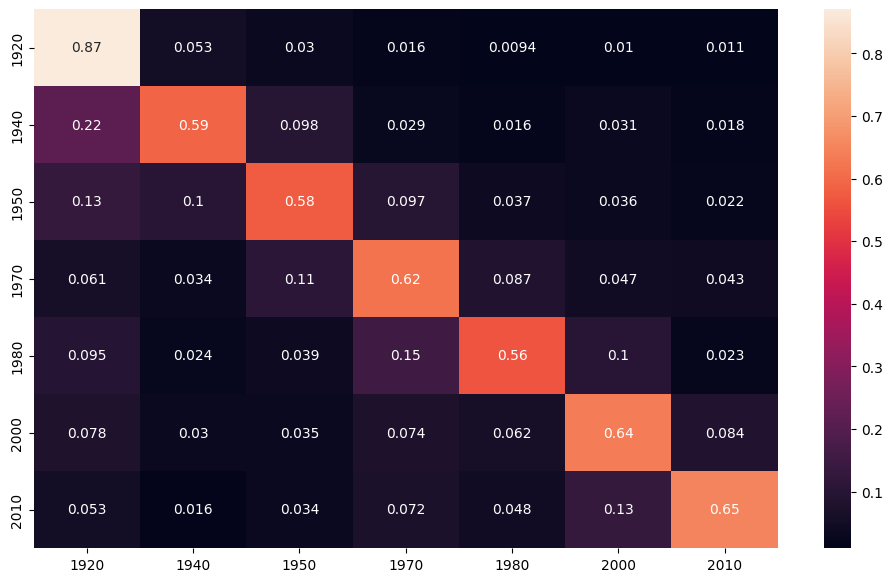

In [24]:
# Testing
def test(model):                      
  print('Now testing')                                  
  model.eval()                        
  running_loss = 0.0  
  running_correct = 0
  with torch.no_grad():
      #for idx, batch in enumerate(tqdm(valid_dataloader)): 
      for idx, batch in enumerate(tqdm(test_loader2)): 
      #for idx, batch in enumerate(tqdm(test_loader3)): 
          pixel_values, pixel_values2, pixel_values3 = batch[0].to(device, dtype=torch.float32), batch[1].to(device, dtype=torch.float32), batch[2].to(device, dtype=torch.float32)
          pixel_values = pixel_values.permute(0, 3, 1, 2)         
          pixel_values2 = pixel_values2.permute(0, 3, 1, 2)   
          pixel_values3 = pixel_values3.permute(0, 3, 1, 2)

          outputs = model(pixel_values, pixel_values2, pixel_values3) 
          #_, preds = torch.max(outputs.data, 1) 
          _, preds = torch.max(outputs, 1)
          #print(outputs.shape) 
          #print(outputs.data.shape)

          # use: http://github.com/ESA-PhiLab/AI4EO-Challenge-Building-Sustainability 
          
          #loss = criterion(outputs, target)             
          #running_loss += loss.item()
          #running_correct += (preds == target).sum().item() 
      #loss = running_loss / len(dataloaders['val'].dataset)
      #accuracy = 100. * running_correct / len(dataloaders['val'].dataset)   
      #print(f'Val Loss: {loss:.4f}, Val Acc: {accuracy:.2f}') 
      #print(f'Test Acc: {accuracy:.2f}')
      #return loss, accuracy     
      #return accuracy
      return

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import more libraries   
# libraries for the testing phase  
# # load libraries 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
import seaborn as sn

def validatemodel(model):        
  print('Now evaluating')                         
  model.eval()        
  y_pred = [] 
  y_true = []
  running_loss = 0.0  
  running_correct = 0
  with torch.no_grad():
      #for idx, batch in enumerate(tqdm(valid_dataloader)):
      for idx, batch in enumerate(tqdm(valid_dataloader2)): 
      #for _, data in valid_dataloader
          pixel_values, pixel_values2, pixel_values3, labels = batch[0].to(device, dtype=torch.float32), batch[1].to(device, dtype=torch.float32), batch[2].to(device, dtype=torch.float32), batch[3].to(device)
          pixel_values = pixel_values.permute(0, 3, 1, 2)         
          pixel_values2 = pixel_values2.permute(0, 3, 1, 2)   
          pixel_values3 = pixel_values3.permute(0, 3, 1, 2)

          outputs = model(pixel_values, pixel_values2, pixel_values3)
          #_, preds = torch.max(outputs.data, 1) 
          _, preds = torch.max(outputs, 1)
          #print(outputs.shape)   
          #print(outputs.data.shape)
          #print(preds.shape)

          #loss = criterion(outputs, target)          
          #running_loss += loss.item()
          #_, preds = torch.max(outputs.data, 1)   
          #running_correct += (preds == target).sum().item() 
          running_correct += (preds == labels).sum().item() 
          y_true.append(labels.cpu()) 
          y_pred.append(preds.cpu())  
      #loss = running_loss / len(dataloaders['val'].dataset)        
      #accuracy = 100. * running_correct / len(dataloaders['val'].dataset)    
      accuracy = 100. * running_correct / len(valid_dataloader.dataset)
      #print(f'Val Loss: {loss:.4f}, Val Acc: {accuracy:.2f}') 
      print(f'Val Acc: {accuracy:.2f}') 
      y_true = np.concatenate(y_true) 
      y_pred = np.concatenate(y_pred)
      print(f'Pr: {100.*precision_score(y_true, y_pred, average="weighted"):.2f}, Re: {100.*recall_score(y_true, y_pred, average="weighted"):.2f}, F1: {100.*f1_score(y_true, y_pred, average="weighted"):.2f}')
      classes = ('1920', '1940', '1950', '1970', '1980', '2000', '2010')          
      cf_matrix = confusion_matrix(y_true, y_pred)   
      df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes], columns = [i for i in classes])
      plt.figure(figsize = (12,7)) 
      sn.heatmap(df_cm, annot=True)   
      plt.savefig('ConfusionMatrix.png')
      sumdiagonals = 0.
      for i in range(len(cf_matrix)):
        sumdiagonals += (cf_matrix / np.sum(cf_matrix, axis=1)[:, None])[i,i]
      sumdiagonals /= len(cf_matrix) 
      print(f'Mean of diagonals of Confusion Matrix: {100.*sumdiagonals:.2f}')
      #return loss, accuracy        
      return accuracy     

validatemodel(model)   

#test(model)  
